# I. Tải dữ liệu & Đảm bảo chất lượng

## 1. Import Libraries

In [ ]:
import os
import warnings
from IPython import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import openpyxl

%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

SEED = 42
np.random.seed(SEED)

print(" Libraries loaded")

 Libraries loaded


## 2. Load Data

In [ ]:
# Đường dẫn file
DATA_PATH = "../Data/Database paper.xlsx"

print("LOADING RAW DATA")

print(f"File: {os.path.abspath(DATA_PATH)}")


LOADING RAW DATA
File: c:\Users\admin\Desktop\Data\Database paper.xlsx


In [ ]:
# Đọc dữ liệu
df = pd.read_excel("Database paper.xlsx")

print(f"\nShape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")


Shape: (2170, 22)
Rows: 2,170
Columns: 22


In [ ]:
# Xem cấu trúc
print("\nFirst 5 rows:")
display.display(df.head())

display.display("\nColumn info:")
df.info()


First 5 rows:


Year  Gender  Policy_Stu  Minority_Stu  Poor_Stu  Father_Edu  Mother_Edu  \
0     5       2           2             2         2           4           4   
1     5       1           2             2         2           3           3   
2     5       2           2             2         2           4           4   
3     5       2           2             2         2           5           4   
4     5       1           1             2         2           2           3   

   Father_Occupation  Mother_Occupation  Time_Friends  ...  GPA  \
0                  2                  3             2  ...    4   
1                  2                  4             1  ...    3   
2                  1                  2             1  ...    4   
3                  1                  1             2  ...    4   
4                  3                  3             1  ...    4   

   Adapt_Learning_Uni  Study_Methods  SupportOf_Uni  SupportOf_Lec  \
0                   4              4              3              4   
1                   3              3              3              4   
2                   4              4              4              4   
3                   4              4              5              5   
4                   5              5              5              5   

   Facilitie_Uni  Quality_Lecturer  TrainingCurriculum  Competitive_Class  \
0              4                 4                   4                  3   
1              4                 3                   3                  3   
2              3                 4                   4                  4   
3              5                 5                   4                  4   
4              5                 5                   5                  4   

   InfuenceF_Friends  
0                  3  
1                  4  
2                  4  
3                  4  
4                  5  

[5 rows x 22 columns]

'\nColumn info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                2170 non-null   int64
 1   Gender              2170 non-null   int64
 2   Policy_Stu          2170 non-null   int64
 3   Minority_Stu        2170 non-null   int64
 4   Poor_Stu            2170 non-null   int64
 5   Father_Edu          2170 non-null   int64
 6   Mother_Edu          2170 non-null   int64
 7   Father_Occupation   2170 non-null   int64
 8   Mother_Occupation   2170 non-null   int64
 9   Time_Friends        2170 non-null   int64
 10  Time_SocicalMedia   2170 non-null   int64
 11  Time_Studying       2170 non-null   int64
 12  GPA                 2170 non-null   int64
 13  Adapt_Learning_Uni  2170 non-null   int64
 14  Study_Methods       2170 non-null   int64
 15  SupportOf_Uni       2170 non-null   int64
 16  SupportOf_Lec       2170 non-null   int64


**Nhận xét về cấu trúc dữ liệu:**

- **Kích thước:** Dataset có 2,170 dòng (quan sát) và 22 cột (biến)

- **Loại dữ liệu:** Tất cả các cột đều có kiểu dữ liệu `int64`, tức là đã được mã hóa thành số nguyên

- **Đặc điểm quan trọng:**
  - Dữ liệu đã được tiền xử lý và mã hóa từ dạng categorical sang numeric
  - Không phải là dữ liệu số thực (continuous), mà là dữ liệu phân loại (categorical) được encode
  - Mỗi cột đại diện cho một biến nghiên cứu theo thang đo Likert hoặc phân loại
  
- **Các biến chính:**
  - Biến nhân khẩu học (Demographic): Year, Gender, Policy_Stu, Minority_Stu, Poor_Stu
  - Biến gia đình (Family): Father_Edu, Mother_Edu, Father_Occupation, Mother_Occupation
  - Biến thời gian (Lifestyle): Time_Friends, Time_SocicalMedia, Time_Studying
  - Biến học tập (Academic): Adapt_Learning_Uni, Study_Methods, SupportOf_Uni, v.v.
  - Biến mục tiêu (Target): GPA (kết quả học tập)

## 3. Data Cleaning

### 3.1. Missing Values

In [ ]:
# Kiểm tra missing values
print("MISSING VALUES CHECK:")


missing = df.isnull().sum()
if missing.sum() > 0:
    print(f"Total missing: {missing.sum()}")
    print(missing[missing > 0])
else:
    print(" No missing values")

MISSING VALUES CHECK:
 No missing values


**Kết quả kiểm tra Missing Values:**

-**Không có giá trị thiếu (missing values)** trong toàn bộ dataset
- Điều này cho thấy dữ liệu đã được thu thập đầy đủ hoặc đã được làm sạch trước đó
- Không cần thực hiện imputation hay loại bỏ dòng nào do missing data

In [ ]:
# Xử lý missing (nếu có)
initial_rows = len(df)

if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print(f"Removed {initial_rows - len(df)} rows")
    print(f"New shape: {df.shape}")
else:
    print("No rows removed")

df = df.reset_index(drop=True)

No rows removed


**Hành động:**
- Vì không có missing values, nên không có dòng nào bị loại bỏ
- Dataset giữ nguyên 2,170 quan sát
- Reset index để đảm bảo index liên tục từ 0

### 3.2. Duplicates

In [ ]:
# Kiểm tra duplicates
print("DUPLICATES CHECK:")


dup_count = df.duplicated().sum()
print(f"Duplicates found: {dup_count}")

if dup_count > 0:
    df = df.drop_duplicates(ignore_index=True)
    print(f"Removed {dup_count} duplicates")
    print(f"New shape: {df.shape}")
else:
    print(" No duplicates")

DUPLICATES CHECK:
Duplicates found: 226
Removed 226 duplicates
New shape: (1944, 22)


-  Đã xóa 226 dòng trùng lặp (10.41%)
- Dataset giảm từ 2,170 xuống còn **1,944 dòng × 22 cột**
- Mỗi quan sát còn lại là duy nhất

## 4. Save Processed Data

In [ ]:
# Tạo thư mục output nếu chưa tồn tại
output_dir = "../Data/processed_data"
os.makedirs(output_dir, exist_ok=True)

print(f" Output directory: {os.path.abspath(output_dir)}")

 Output directory: c:\Users\admin\Desktop\Data\processed_data


In [ ]:
# Lưu dữ liệu đã xử lý
output_path = os.path.join(output_dir, "data.csv")
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n Saved processed data to:")
print(f"   {output_path}")
print(f"\n Final dataset shape: {df.shape}")


 Saved processed data to:
   ../Data/processed_data\data.csv

 Final dataset shape: (1944, 22)


# II. Phân tích dữ liệu thăm dò (EDA)

## 2.1. Phân tích phân bố biến

### 2.1.1. Phân bố các biến nhân khẩu học

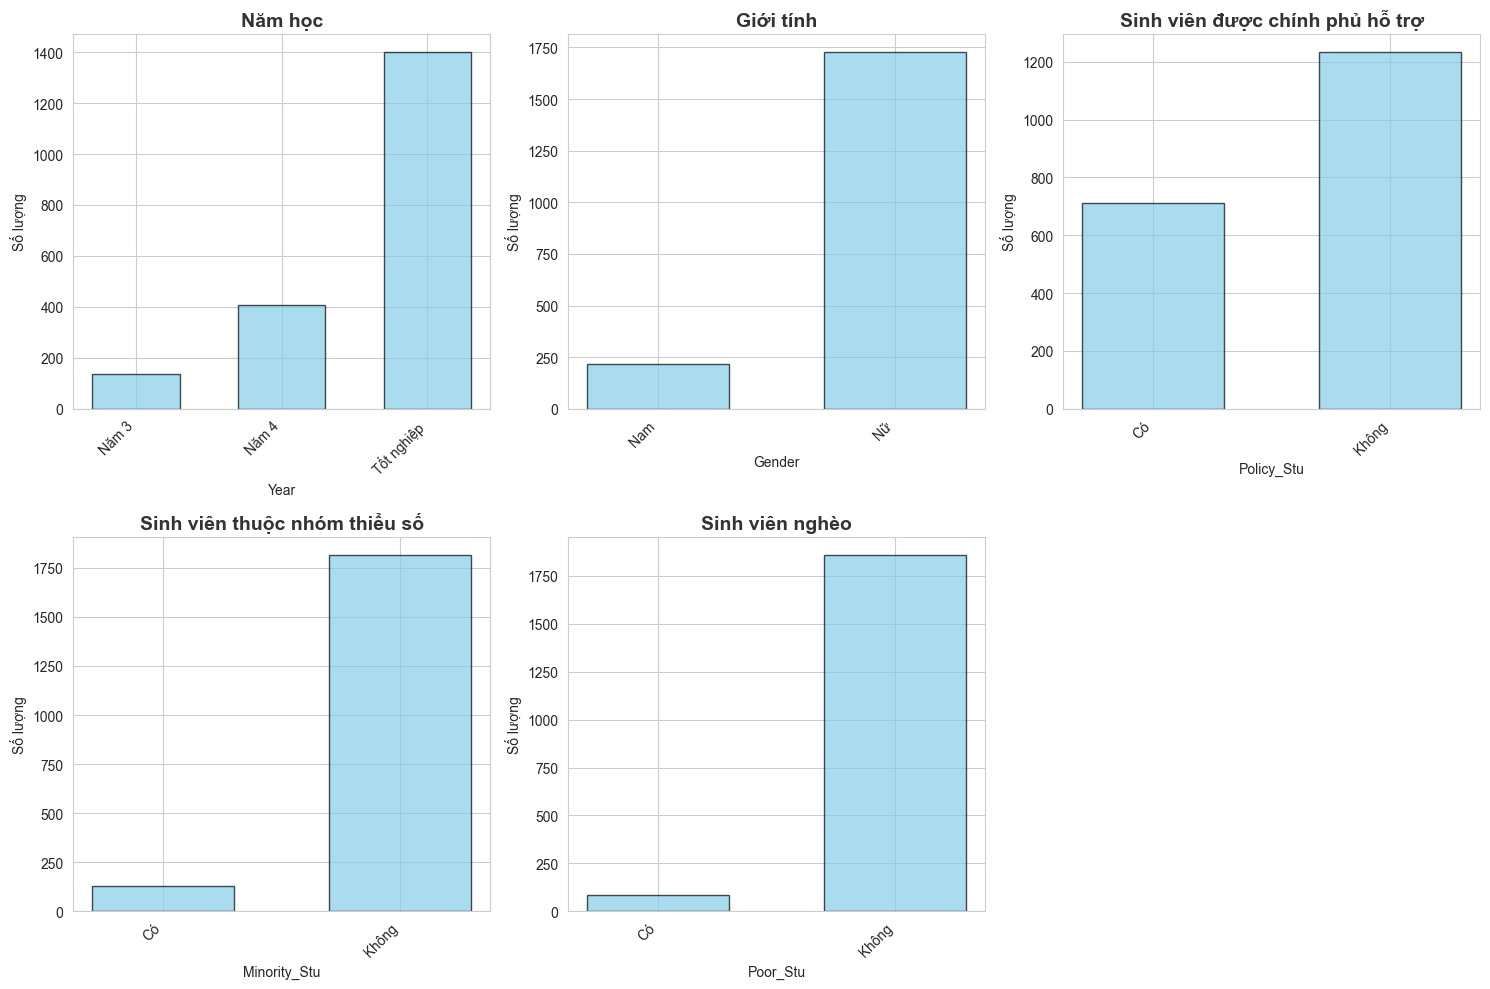

In [ ]:
# Mapping labels cho các biến
mappings = {
    'Year': {1: 'Năm 1', 2: 'Năm 2', 3: 'Năm 3', 4: 'Năm 4', 5: 'Tốt nghiệp'},
    'Gender': {1: 'Nam', 2: 'Nữ'},
    'Policy_Stu': {1: 'Có', 2: 'Không'}, # Sinh viên được chính phủ hỗ trợ
    'Minority_Stu': {1: 'Có', 2: 'Không'}, # Sinh viên thuộc nhóm thiểu số
    'Poor_Stu': {1: 'Có', 2: 'Không'} # Sinh viên nghèo
}

codebook_labels_demographic = {
    'Year': 'Năm học',
    'Gender': 'Giới tính',
    'Policy_Stu': 'Sinh viên được chính phủ hỗ trợ',
    'Minority_Stu': 'Sinh viên thuộc nhóm thiểu số',
    'Poor_Stu': 'Sinh viên nghèo'
}

demographic_vars = ['Year', 'Gender', 'Policy_Stu',
                    'Minority_Stu', 'Poor_Stu']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(demographic_vars):
    if var in df.columns:
        counts = df[var].value_counts().sort_index()

        # Sử dụng labels nếu có
        if var in mappings:
            labels = [mappings[var].get(i, str(i)) for i in counts.index]
        else:
            labels = counts.index

        axes[idx].bar(range(len(counts)), counts.values, color='skyblue',
                      edgecolor='black', alpha=0.7, width=0.6)
        axes[idx].set_title(f'Phân bố {var}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(var)

        title_text = codebook_labels_demographic.get(var, var)
        axes[idx].set_title(title_text, fontsize=14, fontweight='bold', color='#333333')
        # -----------------------------------------

        axes[idx].set_ylabel('Số lượng')
        axes[idx].set_xticks(range(len(counts)))
        axes[idx].set_xticklabels(labels, rotation=45, ha='right')

# Ẩn subplot thừa
for idx in range(len(demographic_vars), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


- Gender: Mẫu nghiên cứu có sự mất cân bằng lớn, với 88.84% là Nữ và chỉ 11.16% là Nam.

- Year: Đa số sinh viên tham gia khảo sát là những người đã tốt nghiệp (72.02%). Sinh viên năm 4 chiếm 21.04%. Không có dữ liệu của sinh viên năm 1 và 2.

- SV Chính sách: Có 36.57% sinh viên thuộc diện chính sách.

- Hộ nghèo & Dân tộc: Tỷ lệ rất thấp (Hộ nghèo: 4.32%, Dân tộc thiểu số: 6.53%).

Nhận xét: Dữ liệu phản ánh chủ yếu góc nhìn của nữ sinh viên năm cuối hoặc đã tốt nghiệp, phần lớn không thuộc diện khó khăn về kinh tế.

### 2.1.2. Phân bố của các biến liên quan đến bố mẹ


>> Father_Edu:
   Tiểu học: 116 (6.0%)
   THCS: 264 (13.6%)
   THPT: 540 (27.8%)
   Cao đẳng: 337 (17.3%)
   Đại học/Sau ĐH: 550 (28.3%)
   Khác: 137 (7.0%)

>> Mother_Edu:
   Tiểu học: 121 (6.2%)
   THCS: 282 (14.5%)
   THPT: 523 (26.9%)
   Cao đẳng: 444 (22.8%)
   Đại học/Sau ĐH: 434 (22.3%)
   Khác: 140 (7.2%)

>> Father_Occupation:
   Nhà nước: 445 (22.9%)
   Kinh doanh: 509 (26.2%)
   Tự do: 598 (30.8%)
   Khác: 362 (18.6%)
   Không công khai: 30 (1.5%)

>> Mother_Occupation:
   Nhà nước: 421 (21.7%)
   Kinh doanh: 504 (25.9%)
   Tự do: 637 (32.8%)
   Khác: 360 (18.5%)
   Không công khai: 22 (1.1%)


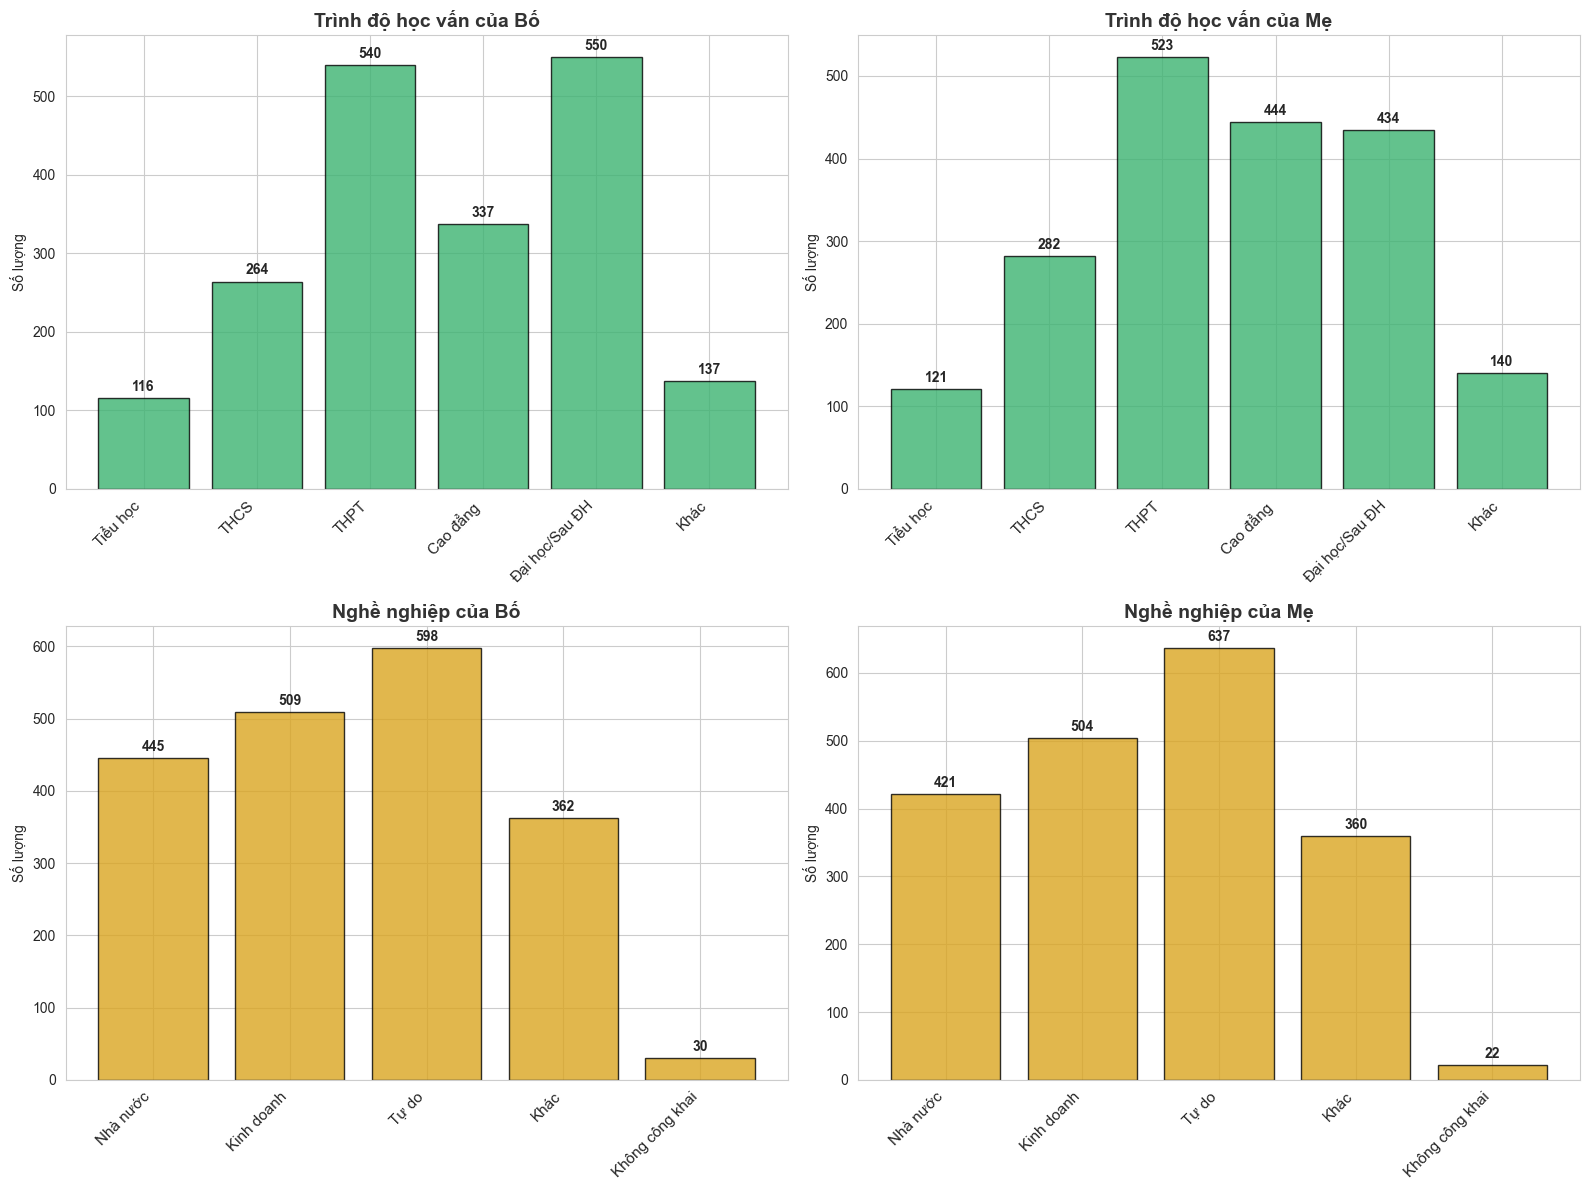

In [ ]:

# Danh sách biến
family_vars = ['Father_Edu', 'Mother_Edu', 'Father_Occupation', 'Mother_Occupation']

codebook_labels = {
    'Father_Edu': 'Trình độ học vấn của Bố',
    'Mother_Edu': 'Trình độ học vấn của Mẹ',
    'Father_Occupation': 'Nghề nghiệp của Bố',
    'Mother_Occupation': 'Nghề nghiệp của Mẹ'
}
# Mapping nhãn (Dựa trên Codebook)
edu_mapping = {
    1: 'Tiểu học', 2: 'THCS', 3: 'THPT',
    4: 'Cao đẳng', 5: 'Đại học/Sau ĐH', 6: 'Khác'
}

job_mapping = {
    1: 'Nhà nước', 2: 'Kinh doanh', 3: 'Tự do',
    4: 'Khác', 5: 'Không công khai'
}

# 1. In thống kê
for var in family_vars:
    print(f"\n>> {var}:")
    counts = df[var].value_counts().sort_index()
    mapping = edu_mapping if 'Edu' in var else job_mapping
    for idx, val in counts.items():
        print(f"   {mapping.get(idx, idx)}: {val} ({val/len(df)*100:.1f}%)")

# 2. Vẽ biểu đồ 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, var in enumerate(family_vars):
    if var in df.columns:
        counts = df[var].value_counts().sort_index()
        mapping = edu_mapping if 'Edu' in var else job_mapping

        # Chọn màu: Xanh cho Học vấn, Vàng cho Nghề nghiệp
        color = 'mediumseagreen' if 'Edu' in var else 'goldenrod'

        bars = axes[idx].bar(counts.index, counts.values, color=color,
                             edgecolor='black', alpha=0.8)

        # Trang trí
        title = "Học vấn của Bố" if var == 'Father_Edu' else \
                "Học vấn của Mẹ" if var == 'Mother_Edu' else \
                "Nghề nghiệp của Bố" if var == 'Father_Occupation' else "Nghề nghiệp của Mẹ"

        axes[idx].set_title(title, fontsize=14, fontweight='bold')

            # Sử dụng nhãn từ codebook
        title_text = codebook_labels.get(var, var)
        axes[idx].set_title(title_text, fontsize=14, fontweight='bold', color='#333333')


        axes[idx].set_ylabel('Số lượng')

        # Gán nhãn trục X
        labels = [mapping.get(i, str(i)) for i in counts.index]
        axes[idx].set_xticks(counts.index)
        axes[idx].set_xticklabels(labels, rotation=45, ha='right', fontsize=11)

        # Thêm số lượng lên đầu cột
        for bar in bars:
            height = bar.get_height()
            axes[idx].annotate(f'{height}',
                               xy=(bar.get_x() + bar.get_width() / 2, height),
                               xytext=(0, 3),
                               textcoords="offset points",
                               ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

- Học vấn bố mẹ:
    - Phân bố khá tương đồng giữa cha và mẹ.

    - Tỷ lệ có trình độ Đại học/Sau đại học (Mức 5) khá cao: Cha (28.29%) và Mẹ (22.33%).

    - Nhóm chiếm tỷ lệ lớn nhất là Trung học phổ thông (Mức 3) và Đại học.

- Nghề nghiệp: Nghề nghiệp phổ biến nhất của cha mẹ là "Lao động tự do" (Freelance - Mức 3) và "Kinh doanh tự do" (Self-employment - Mức 2).

### 2.1.3. Phân bố các biến thời gian


--- Trung bình thời gian (Thang đo 1-5) ---
  Time_Friends: 2.27
  Time_SocicalMedia: 2.83
  Time_Studying: 4.71


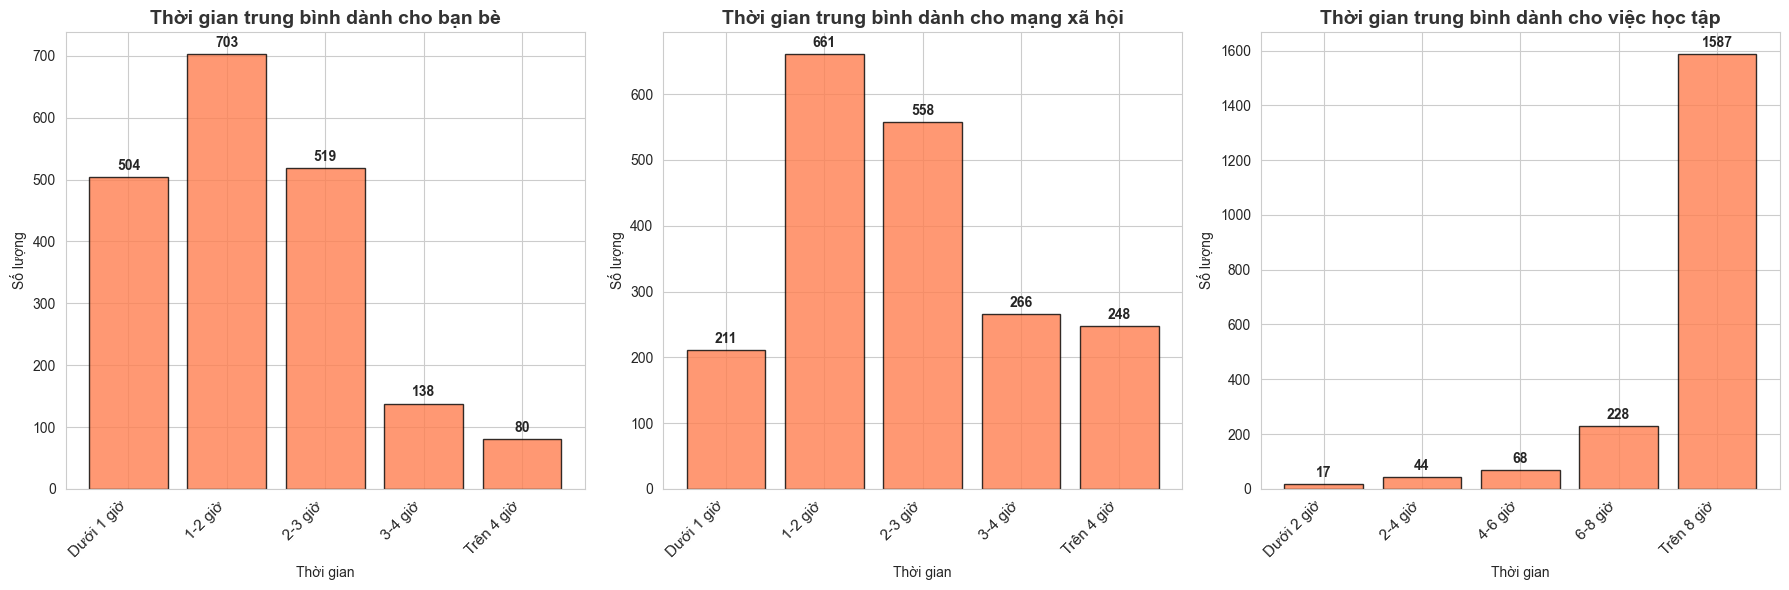

In [ ]:
time_vars = ['Time_Friends', 'Time_SocicalMedia', 'Time_Studying']

codebook_labels_time = {
    'Time_Friends': 'Thời gian trung bình dành cho bạn bè',
    'Time_SocicalMedia': 'Thời gian trung bình dành cho mạng xã hội',
    'Time_Studying': 'Thời gian trung bình dành cho việc học tập'
}

# Định nghĩa nhãn (Mapping)
mappings_vartime = {
    'Time_Friends': {1: 'Dưới 1 giờ', 2: '1-2 giờ', 3: '2-3 giờ', 4: '3-4 giờ', 5: 'Trên 4 giờ'},
    'Time_SocicalMedia': {1: 'Dưới 1 giờ', 2: '1-2 giờ', 3: '2-3 giờ', 4: '3-4 giờ', 5: 'Trên 4 giờ'},
    'Time_Studying': {1: 'Dưới 2 giờ', 2: '2-4 giờ', 3: '4-6 giờ', 4: '6-8 giờ', 5: 'Trên 8 giờ'},
}

# 1. In thống kê trung bình
print("\n--- Trung bình thời gian (Thang đo 1-5) ---")
for var in time_vars:
    if var in df.columns:
        mean_val = df[var].mean()
        print(f"  {var}: {mean_val:.2f}")

# 2. Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, var in enumerate(time_vars):
    if var in df.columns:
        # Lấy dữ liệu đếm
        counts = df[var].value_counts().sort_index()
        # Vẽ cột
        bars = axes[idx].bar(counts.index, counts.values, color='coral',
                             edgecolor='black', alpha=0.8)
        # Trang trí tiêu đề và trục
        axes[idx].set_title(f'{var}', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Thời gian')

        title_text = codebook_labels_time.get(var, var)
        axes[idx].set_title(title_text, fontsize=14, fontweight='bold', color='#333333')


        axes[idx].set_ylabel('Số lượng')

        # Gán nhãn trục X bằng tiếng Việt từ mapping
        labels = [mappings_vartime[var].get(i, str(i)) for i in counts.index]
        axes[idx].set_xticks(counts.index)
        axes[idx].set_xticklabels(labels, rotation=45, ha='right', fontsize=11)

        for bar in bars:
            height = bar.get_height()
            axes[idx].annotate(f'{height}',
                               xy=(bar.get_x() + bar.get_width() / 2, height),
                               xytext=(0, 3),  # Cách đỉnh cột 3 điểm
                               textcoords="offset points",
                               ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


- Thời gian học tập (Time_Studying): Kết quả cực kỳ đáng chú ý: 81.64% sinh viên báo cáo dành thời gian học tập ở mức cao nhất (Mức 5: > 8 giờ/ngày). Điều này cho thấy nhóm khảo sát rất chăm chỉ.

- Mạng xã hội & Bạn bè:

    - Thời gian cho Mạng xã hội phân bố đều hơn nhưng vẫn nghiêng về mức thấp-trung bình. Mức phổ biến nhất là 1-2 giờ (34.00%).

    - Thời gian cho bạn bè cũng tập trung ở mức thấp (Mức 1-2 chiếm hơn 60%).

Nhận xét: Sinh viên trong mẫu này ưu tiên thời gian cho việc học hơn hẳn so với giải trí hoặc giao tiếp xã hội.

### 2.1.4. Phân bố các biến trường lớp


--- Điểm trung bình đánh giá (Thang 1-5) ---
  Adapt_Learning_Uni: 3.46
  Study_Methods: 3.62
  SupportOf_Uni: 3.99
  SupportOf_Lec: 4.18
  Facilitie_Uni: 4.07
  Quality_Lecturer: 4.33
  TrainingCurriculum: 4.12
  Competitive_Class: 3.94
  InfuenceF_Friends: 3.83


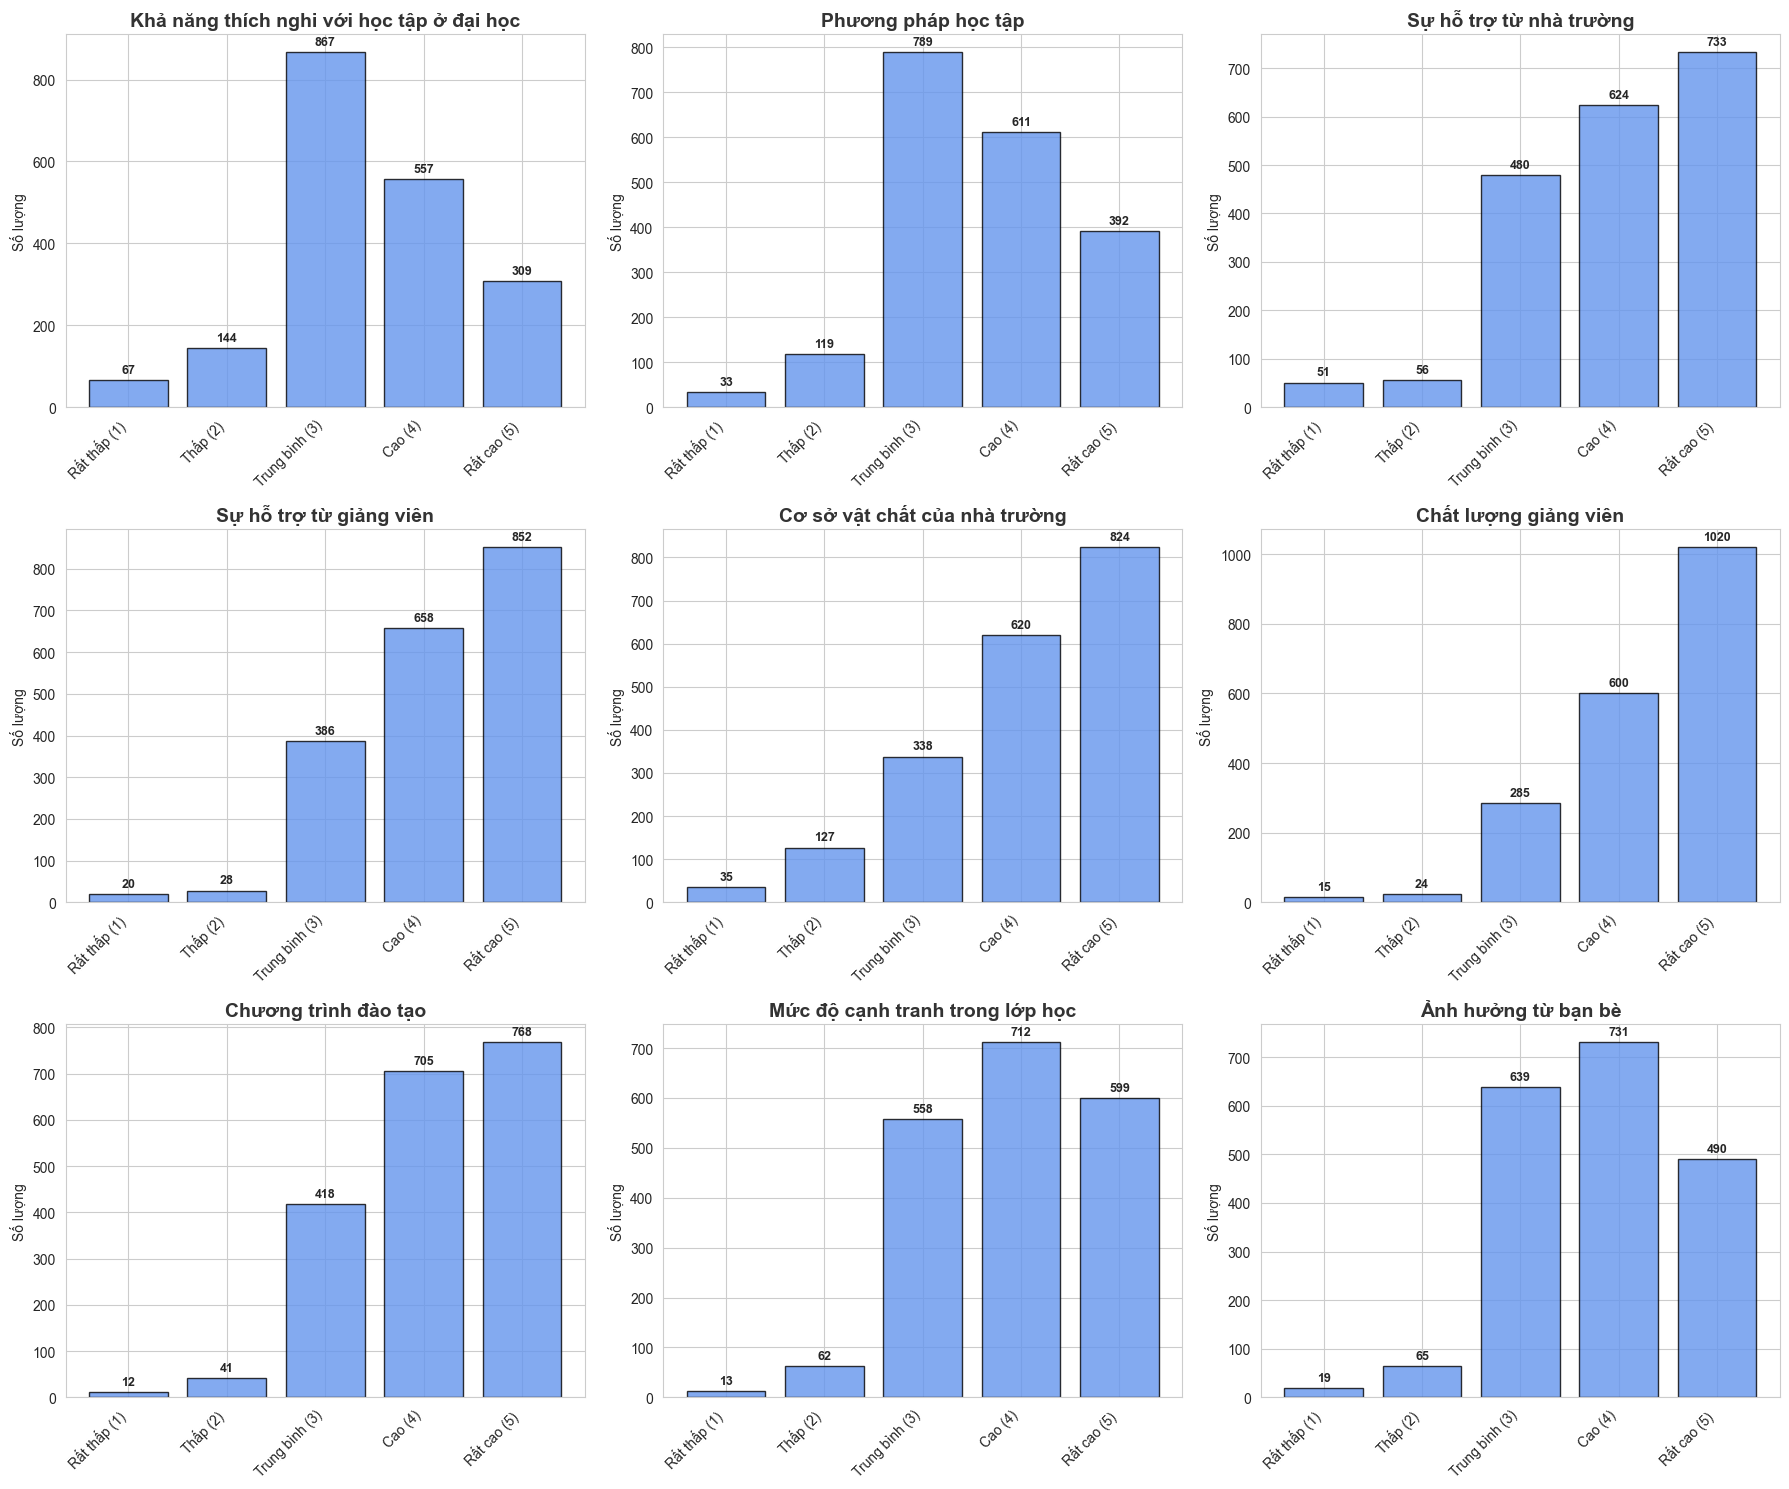

In [ ]:

academic_vars = [
    'Adapt_Learning_Uni', 'Study_Methods', 'SupportOf_Uni', 'SupportOf_Lec',
    'Facilitie_Uni', 'Quality_Lecturer', 'TrainingCurriculum', 'Competitive_Class',
    'InfuenceF_Friends'
]

codebook_labels_academic = {
    'Adapt_Learning_Uni': 'Khả năng thích nghi với học tập ở đại học',
    'Study_Methods': 'Phương pháp học tập',
    'SupportOf_Uni': 'Sự hỗ trợ từ nhà trường',
    'SupportOf_Lec': 'Sự hỗ trợ từ giảng viên',
    'Facilitie_Uni': 'Cơ sở vật chất của nhà trường',
    'Quality_Lecturer': 'Chất lượng giảng viên',
    'TrainingCurriculum': 'Chương trình đào tạo',
    'Competitive_Class': 'Mức độ cạnh tranh trong lớp học',
    'InfuenceF_Friends': 'Ảnh hưởng từ bạn bè'
}

# Mapping nhãn thang đo
likert_mapping = {
    1: 'Rất thấp (1)',
    2: 'Thấp (2)',
    3: 'Trung bình (3)',
    4: 'Cao (4)',
    5: 'Rất cao (5)'
}

# 1. In thống kê trung bình
print("\n--- Điểm trung bình đánh giá (Thang 1-5) ---")
for var in academic_vars:
    if var in df.columns:
        print(f"  {var}: {df[var].mean():.2f}")

# 2. Vẽ biểu đồ lưới 3x3
n_cols = 3
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))
axes = axes.flatten()

for idx, var in enumerate(academic_vars):
    if var in df.columns:
        counts = df[var].value_counts().sort_index()

        # Vẽ cột
        bars = axes[idx].bar(counts.index, counts.values, color='cornflowerblue',
                             edgecolor='black', alpha=0.8)

        # Trang trí
        axes[idx].set_title(f'{var}', fontsize=12, fontweight='bold')
        title_text = codebook_labels_academic.get(var, var)
        axes[idx].set_title(title_text, fontsize=14, fontweight='bold', color='#333333')
        axes[idx].set_ylabel('Số lượng')

        # Gán nhãn trục X
        labels = [likert_mapping.get(i, str(i)) for i in counts.index]
        axes[idx].set_xticks(counts.index)
        axes[idx].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

        # Thêm số lượng lên đầu cột
        for bar in bars:
            height = bar.get_height()
            axes[idx].annotate(f'{height}',
                               xy=(bar.get_x() + bar.get_width() / 2, height),
                               xytext=(0, 3),
                               textcoords="offset points",
                               ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        axes[idx].axis('off') # Ẩn nếu không có dữ liệu

plt.tight_layout()
plt.show()

- Đánh giá về Giảng viên & Nhà trường:

    - Chất lượng giảng viên (Quality_Lecturer): 52.47% đánh giá mức cao nhất (5).

    - Hỗ trợ của giảng viên (SupportOf_Lec): 43.83% đánh giá mức cao nhất.

    - Cơ sở vật chất (Facilitie_Uni): 42.39% đánh giá mức cao nhất.

- Sự thích nghi & Phương pháp học:

    - Thích nghi (Adapt_Learning_Uni): Phần lớn cảm thấy thích nghi ở mức "Trung bình" (44.60%) đến "Khá" (28.65%).

    - Phương pháp học (Study_Methods): Tập trung ở mức Trung bình (40.59%).

### 2.1.5. Phân bổ của biến GPA


 Phân bố GPA:
  Kém : 59 sinh viên (3.0%)
  TB : 106 sinh viên (5.5%)
  Khá : 1079 sinh viên (55.5%)
  Giỏi: 607 sinh viên (31.2%)
  Xuất sắc: 93 sinh viên (4.8%)


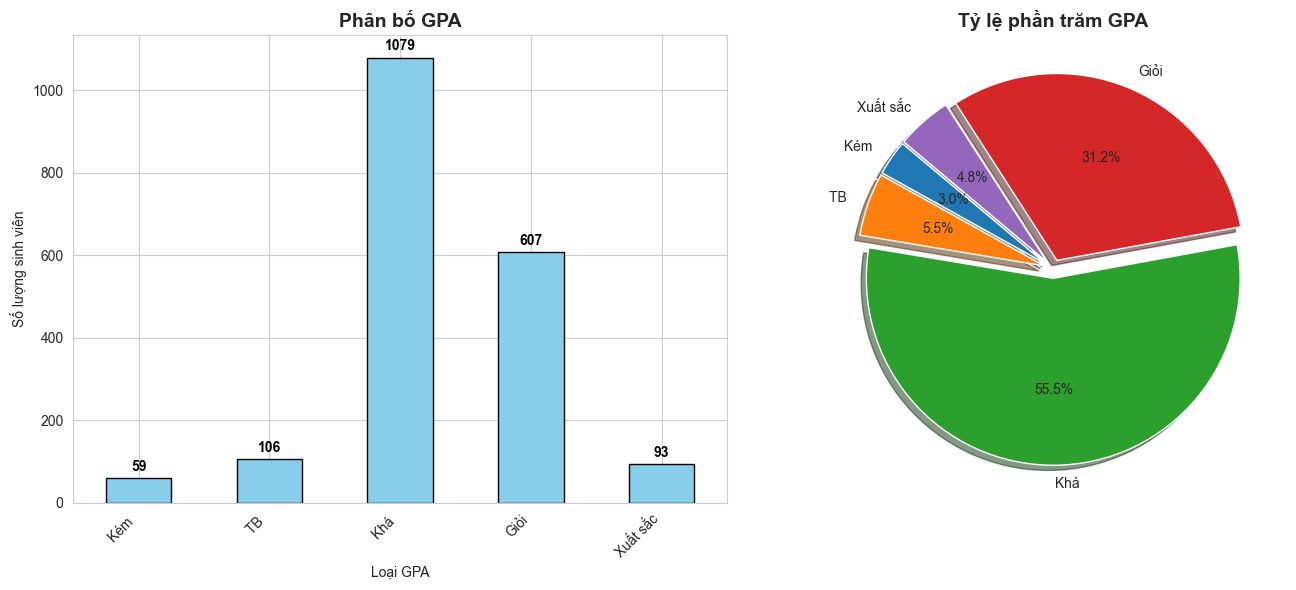

In [ ]:
gpa_labels = {
    1: 'Kém ',      # 0-2.0
    2: 'TB ',       # 2.0-2.5
    3: 'Khá ',      # 2.5-3.2
    4: 'Giỏi',      # 3.2-3.6
    5: 'Xuất sắc'   # >3.6
}

print("\n Phân bố GPA:")
gpa_counts = df['GPA'].value_counts().sort_index()
for idx, count in gpa_counts.items():
    label = gpa_labels.get(idx, f"Loại {idx}")
    pct = count / len(df) * 100
    print(f"  {label}: {count} sinh viên ({pct:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- BIỂU ĐỒ BAR ---
# Vẽ biểu đồ
gpa_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')

axes[0].set_title('Phân bố GPA', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loại GPA')
axes[0].set_ylabel('Số lượng sinh viên')
axes[0].set_xticklabels([gpa_labels[i] for i in gpa_counts.index],
                        rotation=45, ha='right')

for p in axes[0].patches:
    axes[0].annotate(str(p.get_height()),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     xytext=(0, 3), # Cách đỉnh cột 3 điểm ảnh
                     textcoords='offset points',
                     fontsize=10, fontweight='bold', color='black')

# --- BIỂU ĐỒ PIE ---
axes[1].pie(gpa_counts, labels=[gpa_labels[i] for i in gpa_counts.index],
            autopct='%1.1f%%', startangle=140, explode=[0.05]*len(gpa_counts), shadow=True)
axes[1].set_title('Tỷ lệ phần trăm GPA', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Nhận xét**:
- Phân bố điểm GPA lệch về phía điểm cao, phù hợp với thời gian học tập nhiều:

- Mức 3 (Khá: 2.5 - 3.2): Chiếm đa số với 55.50%.

- Mức 4 (Giỏi: 3.2 - 3.6): Chiếm 31.22%.

- Rất ít sinh viên có điểm Kém (<2.0) hoặc Xuất sắc (>3.6).

## 2.2 Data Classification

- Tất cả các cột đều là **CATEGORICAL** được mã hóa thành số
- KHÔNG phải dữ liệu số thực sự (numeric)
- Cần phân biệt Ordinal (có thứ tự) và Nominal (không có thứ tự)

In [ ]:
# METADATA TỪ CODEBOOK - 22 cột dữ liệu
column_info = {
    # THÔNG TIN NHÂN KHẨU (Demographic) - 5 cột
    'Year': {'type': 'Ordinal', 'group': 'Demographic', 'levels': 5, 'desc': 'Năm học'},
    'Gender': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'Giới tính'},
    'Policy_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'SV chính sách'},
    'Minority_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'SV dân tộc'},
    'Poor_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'Hộ nghèo'},

    # THÔNG TIN GIA ĐÌNH (Family) - 4 cột
    'Father_Edu': {'type': 'Ordinal', 'group': 'Family', 'levels': 6, 'desc': 'Học vấn cha'},
    'Mother_Edu': {'type': 'Ordinal', 'group': 'Family', 'levels': 6, 'desc': 'Học vấn mẹ'},
    'Father_Occupation': {'type': 'Nominal', 'group': 'Family', 'levels': 5, 'desc': 'Nghề cha'},
    'Mother_Occupation': {'type': 'Nominal', 'group': 'Family', 'levels': 5, 'desc': 'Nghề mẹ'},

    # THÓI QUEN SINH HOẠT (Lifestyle) - 3 cột
    'Time_Friends': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG với bạn'},
    'Time_SocicalMedia': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG mạng XH'},
    'Time_Studying': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG học tập'},

    # YẾU TỐ HỌC TẬP (Academic) - 9 cột
    'Adapt_Learning_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Thích nghi'},
    'Study_Methods': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'PP học tập'},
    'SupportOf_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'HT từ trường'},
    'SupportOf_Lec': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'HT từ GV'},
    'Facilitie_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Cơ sở vật chất'},
    'Quality_Lecturer': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Chất lượng GV'},
    'TrainingCurriculum': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Chương trình'},
    'Competitive_Class': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Cạnh tranh'},
    'InfuenceF_Friends': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Ảnh hưởng bạn'},

    # BIẾN MỤC TIÊU (Target) - 1 cột
    'GPA': {'type': 'Ordinal', 'group': 'Target', 'levels': 5, 'desc': 'Kết quả học tập'}
}


print("PHÂN LOẠI CỘT DỮ LIỆU DỰA TRÊN CODEBOOK")


# Thống kê theo type
ordinal = [k for k, v in column_info.items() if v['type'] == 'Ordinal']
nominal = [k for k, v in column_info.items() if v['type'] == 'Nominal']

print(f"\n THỐNG KÊ THEO TYPE:")
print(f"   Ordinal (có thứ tự): {len(ordinal)} cột")
print(f"   Nominal (phân loại): {len(nominal)} cột")
print(f"   TỔNG: {len(column_info)} cột")

# Thống kê theo group



PHÂN LOẠI CỘT DỮ LIỆU DỰA TRÊN CODEBOOK

 THỐNG KÊ THEO TYPE:
   Ordinal (có thứ tự): 16 cột
   Nominal (phân loại): 6 cột
   TỔNG: 22 cột


## 2.3 Thành phần của các biến nhóm

In [ ]:
groups = {}
for col, info in column_info.items():
    grp = info['group']
    if grp not in groups:
        groups[grp] = []
    groups[grp].append(col)

print(f"\n THỐNG KÊ THEO NHÓM:")
for grp, cols in groups.items():
    print(f"   {grp}: {len(cols)} cột")
# Chi tiết từng nhóm
for group_name in ['Demographic', 'Family', 'Lifestyle', 'Academic', 'Target']:
    if group_name in groups:
        print(f"\n{'-' * 80}")
        print(f"  {group_name.upper()}")

        for col in groups[group_name]:
            info = column_info[col]
            print(f"  {col:25s} | {info['type']:8s} | {info['levels']} levels | {info['desc']}")


 THỐNG KÊ THEO NHÓM:
   Demographic: 5 cột
   Family: 4 cột
   Lifestyle: 3 cột
   Academic: 9 cột
   Target: 1 cột

--------------------------------------------------------------------------------
  DEMOGRAPHIC
  Year                      | Ordinal  | 5 levels | Năm học
  Gender                    | Nominal  | 2 levels | Giới tính
  Policy_Stu                | Nominal  | 2 levels | SV chính sách
  Minority_Stu              | Nominal  | 2 levels | SV dân tộc
  Poor_Stu                  | Nominal  | 2 levels | Hộ nghèo

--------------------------------------------------------------------------------
  FAMILY
  Father_Edu                | Ordinal  | 6 levels | Học vấn cha
  Mother_Edu                | Ordinal  | 6 levels | Học vấn mẹ
  Father_Occupation         | Nominal  | 5 levels | Nghề cha
  Mother_Occupation         | Nominal  | 5 levels | Nghề mẹ

--------------------------------------------------------------------------------
  LIFESTYLE
  Time_Friends              | Ordinal  | 5

# IV. Phân tích tương quan với kiểm định ý nghĩa thống kê

Mục tiêu của phần này:
- Phân tích mối quan hệ giữa các biến trong dataset
- Sử dụng các phương pháp thống kê phù hợp với loại dữ liệu:
  - **Cramér's V** cho biến Nominal (phân loại không thứ tự)
  - **Spearman Correlation** cho biến Ordinal (phân loại có thứ tự)
- Kiểm định ý nghĩa thống kê với p-value
- Xác định các yếu tố có tác động đến GPA (biến mục tiêu)

In [ ]:
# Import thư viện cần thiết
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:

# Định nghĩa metadata cho các cột
column_info = {
    # THÔNG TIN NHÂN KHẨU (Demographic) - 5 cột
    'Year': {'type': 'Ordinal', 'group': 'Demographic', 'levels': 5, 'desc': 'Năm học'},
    'Gender': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'Giới tính'},
    'Policy_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'SV chính sách'},
    'Minority_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'SV dân tộc'},
    'Poor_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'Hộ nghèo'},

    # THÔNG TIN GIA ĐÌNH (Family) - 4 cột
    'Father_Edu': {'type': 'Ordinal', 'group': 'Family', 'levels': 6, 'desc': 'Học vấn cha'},
    'Mother_Edu': {'type': 'Ordinal', 'group': 'Family', 'levels': 6, 'desc': 'Học vấn mẹ'},
    'Father_Occupation': {'type': 'Nominal', 'group': 'Family', 'levels': 5, 'desc': 'Nghề cha'},
    'Mother_Occupation': {'type': 'Nominal', 'group': 'Family', 'levels': 5, 'desc': 'Nghề mẹ'},

    # THÓI QUEN SINH HOẠT (Lifestyle) - 3 cột
    'Time_Friends': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG với bạn'},
    'Time_SocicalMedia': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG mạng XH'},
    'Time_Studying': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG học tập'},

    # YẾU TỐ HỌC TẬP (Academic) - 9 cột
    'Adapt_Learning_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Thích nghi'},
    'Study_Methods': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'PP học tập'},
    'SupportOf_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'HT từ trường'},
    'SupportOf_Lec': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'HT từ GV'},
    'Facilitie_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Cơ sở vật chất'},
    'Quality_Lecturer': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Chất lượng GV'},
    'TrainingCurriculum': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Chương trình'},
    'Competitive_Class': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Cạnh tranh'},
    'InfuenceF_Friends': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Ảnh hưởng bạn'},

    # BIẾN MỤC TIÊU (Target) - 1 cột
    'GPA': {'type': 'Ordinal', 'group': 'Target', 'levels': 5, 'desc': 'Kết quả học tập'}
}

print(f" Đã định nghĩa metadata cho {len(column_info)} cột")

 Đã định nghĩa metadata cho 22 cột




- **Phân loại biến theo type:**
  - **Nominal (6 biến):** Gender, Policy_Stu, Minority_Stu, Poor_Stu, Father_Occupation, Mother_Occupation
  - **Ordinal (16 biến):** Year, Father_Edu, Mother_Edu, Time_Friends, Time_SocicalMedia, Time_Studying, và 9 biến Academic, GPA

- **Phân loại biến theo nhóm:**
  - **Demographic (5 biến):** Thông tin nhân khẩu học
  - **Family (4 biến):** Thông tin gia đình
  - **Lifestyle (3 biến):** Thói quen sinh hoạt  
  - **Academic (9 biến):** Yếu tố học tập
  - **Target (1 biến):** GPA - Biến mục tiêu

### 4.1. Cramér's V for Nominal Variables
Cramér's V đo lường mức độ liên kết giữa các biến phân loại (không có thứ tự)

In [ ]:
def cramers_v_with_pvalue(x, y):
    """
    Tính Cramér's V và p-value từ Chi-square test

    Args:
        x, y: 2 biến categorical

    Returns:
        tuple: (Cramér's V value, p-value)
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2, pval, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape[0] - 1, confusion_matrix.shape[1] - 1)

    if min_dim == 0:
        return 0, 1.0

    cramers = np.sqrt(chi2 / (n * min_dim))
    return cramers, pval


# Tính ma trận Cramér's V và p-value cho các biến Nominal
nominal_cols = [col for col, info in column_info.items() if info['type'] == 'Nominal']
print(f"Số biến Nominal: {len(nominal_cols)}")
print(f"Các biến: {nominal_cols}\n")

# Tạo ma trận tương quan và p-value
cramers_v_matrix = pd.DataFrame(
    np.zeros((len(nominal_cols), len(nominal_cols))),
    index=nominal_cols,
    columns=nominal_cols
)

cramers_pvalue_matrix = pd.DataFrame(
    np.zeros((len(nominal_cols), len(nominal_cols))),
    index=nominal_cols,
    columns=nominal_cols
)

# Tính Cramér's V và p-value cho từng cặp biến
print("Đang tính Cramér's V và p-value...")
for i, col1 in enumerate(nominal_cols):
    for j, col2 in enumerate(nominal_cols):
        if i <= j:  # Chỉ tính nửa trên vì ma trận đối xứng
            v, pval = cramers_v_with_pvalue(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = v
            cramers_v_matrix.loc[col2, col1] = v
            cramers_pvalue_matrix.loc[col1, col2] = pval
            cramers_pvalue_matrix.loc[col2, col1] = pval

print("Hoàn thành!\n")
print("Ma trận Cramér's V (Nominal Variables):")
print(cramers_v_matrix.round(3))
print("\nMa trận p-value (Chi-square test):")
print(cramers_pvalue_matrix.round(4))

Số biến Nominal: 6
Các biến: ['Gender', 'Policy_Stu', 'Minority_Stu', 'Poor_Stu', 'Father_Occupation', 'Mother_Occupation']

Đang tính Cramér's V và p-value...
Hoàn thành!

Ma trận Cramér's V (Nominal Variables):
                   Gender  Policy_Stu  Minority_Stu  Poor_Stu  \
Gender              0.997       0.010         0.031     0.041   
Policy_Stu          0.010       0.999         0.346     0.277   
Minority_Stu        0.031       0.346         0.996     0.051   
Poor_Stu            0.041       0.277         0.051     0.994   
Father_Occupation   0.031       0.204         0.166     0.173   
Mother_Occupation   0.039       0.146         0.173     0.151   

                   Father_Occupation  Mother_Occupation  
Gender                         0.031              0.039  
Policy_Stu                     0.204              0.146  
Minority_Stu                   0.166              0.173  
Poor_Stu                       0.173              0.151  
Father_Occupation              1.000     

**Kết quả ma trận Cramér's V:**

Từ ma trận tương quan, ta quan sát được:

**Các giá trị đường chéo ≈ 1.0:** Biến tương quan hoàn hảo với chính nó (đúng lý thuyết)

**Các mối quan hệ mạnh nhất (V > 0.3):**
- Father_Occupation ↔ Mother_Occupation: **V = 0.485** (Moderate)
- Policy_Stu ↔ Minority_Stu: **V = 0.346** (Moderate)
- Policy_Stu ↔ Poor_Stu: **V = 0.277** (Weak)

**Các mối quan hệ yếu (V < 0.2):**
- Gender với các biến khác: V < 0.05 (rất yếu)
- Hầu hết các cặp còn lại có V < 0.2

**Ma trận p-value cho thấy:**
- Hầu hết p-value < 0.05 → Có ý nghĩa thống kê
- Chỉ có Gender không có mối liên hệ có ý nghĩa với các biến khác (p > 0.05)

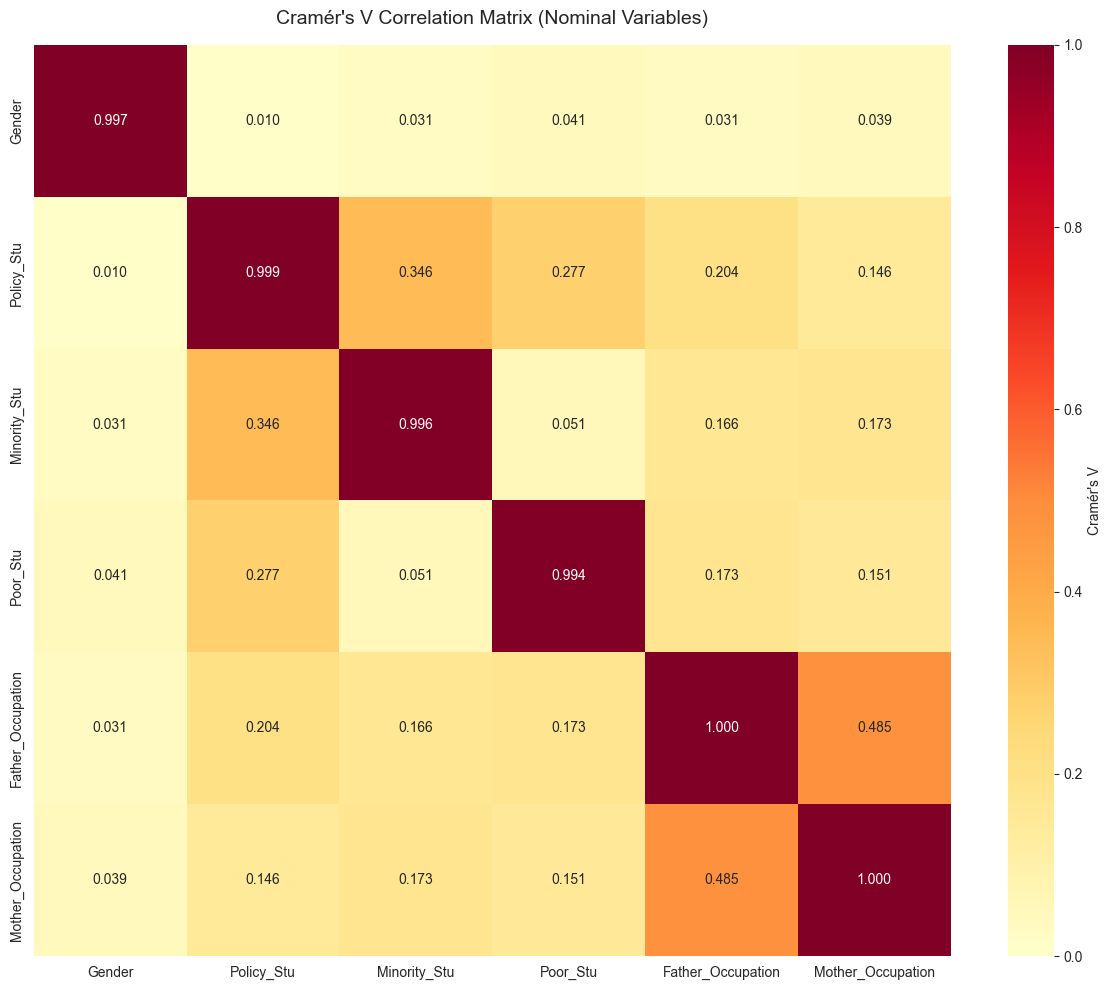

In [ ]:
# Visualize Cramér's V matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix.astype(float),
            annot=True,
            fmt='.3f',
            cmap='YlOrRd',
            vmin=0,
            vmax=1,
            cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V Correlation Matrix (Nominal Variables)", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

**Giải thích Heatmap Cramér's V:**

- **Màu đỏ đậm (V → 1):** Mối liên hệ rất mạnh (gần như phụ thuộc hoàn toàn)
- **Màu vàng cam (V ≈ 0.3-0.5):** Mối liên hệ vừa phải - có ý nghĩa thực tiễn
- **Màu vàng nhạt (V < 0.3):** Mối liên hệ yếu
- **Màu trắng (V ≈ 0):** Không có/rất ít liên hệ

**Quan sát chính:**
- Khối màu đỏ đậm ở (Father_Occupation, Mother_Occupation)
- Khối màu cam ở nhóm (Policy_Stu, Minority_Stu, Poor_Stu)

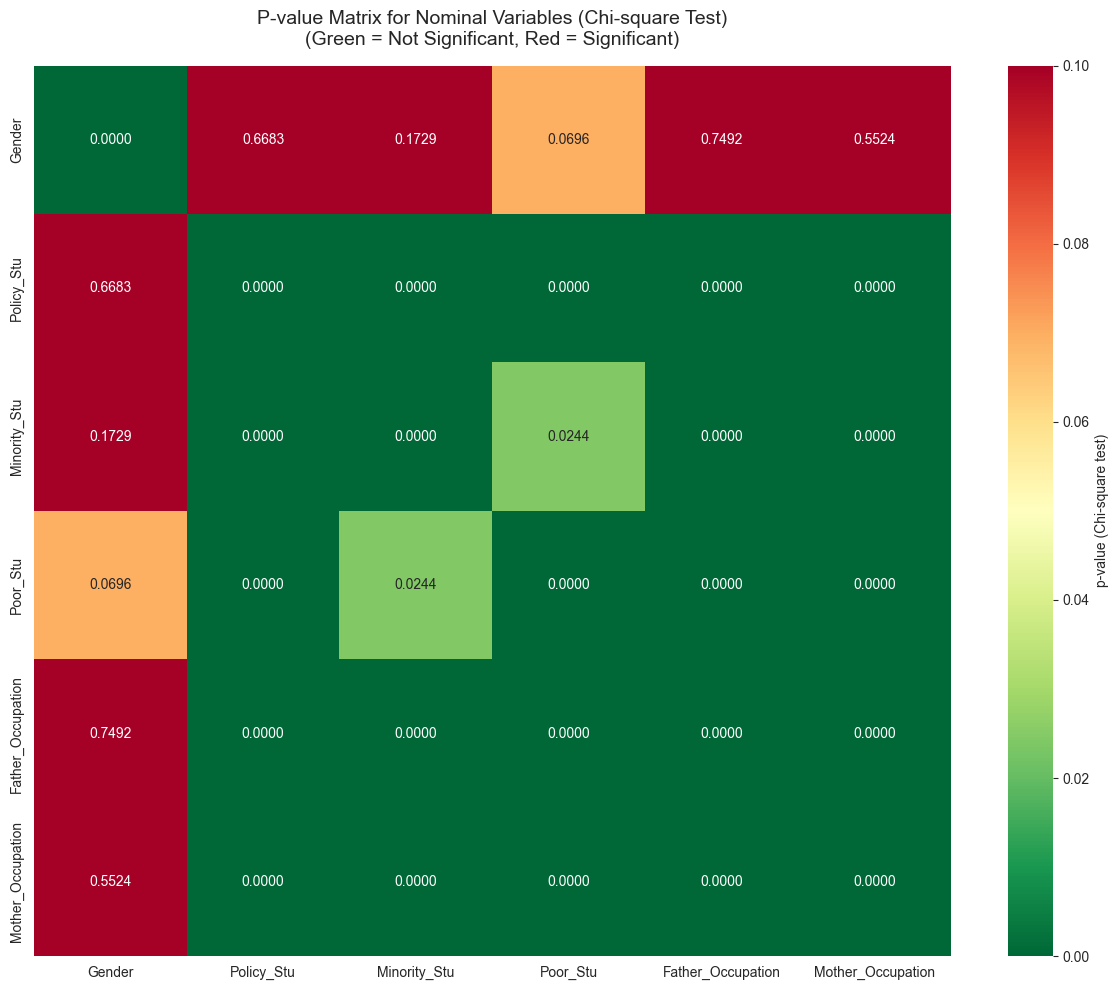

In [ ]:
# Visualize p-value matrix (Chi-square test)
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_pvalue_matrix.astype(float),
            annot=True,
            fmt='.4f',
            cmap='RdYlGn_r',  # Red = significant, Green = not significant
            vmin=0,
            vmax=0.1,  # Focus on p < 0.1
            cbar_kws={'label': 'p-value (Chi-square test)'})
plt.title("P-value Matrix for Nominal Variables (Chi-square Test)\n(Green = Not Significant, Red = Significant)",
          fontsize=14, pad=15)
plt.tight_layout()
plt.show()

**Giải thích Heatmap P-value:**

- **Màu đỏ (p → 0):** Có ý nghĩa thống kê cao (bác bỏ giả thuyết H0: không có liên hệ)
- **Màu xanh lá (p > 0.05):** Không có ý nghĩa thống kê (không thể bác bỏ H0)

**Kết luận từ p-value:**
- Hầu hết các ô màu đỏ → Các mối liên hệ đều có ý nghĩa thống kê
- Chỉ Gender có các ô màu xanh → Không liên quan đến các biến khác
- Điều này phù hợp với thực tế: giới tính không ảnh hưởng đến các chính sách hỗ trợ hay nghề nghiệp cha mẹ

In [ ]:
# Tìm các mối quan hệ có ý nghĩa thống kê (p < 0.05) cho Nominal variables
print("=" * 80)
print("MỐI QUAN HỆ CÓ Ý NGHĨA THỐNG KÊ (NOMINAL VARIABLES)")
print("=" * 80)

significant_nominal_pairs = []
alpha = 0.05  # Mức ý nghĩa

for i, col1 in enumerate(nominal_cols):
    for j, col2 in enumerate(nominal_cols):
        if i < j:  # Chỉ lấy nửa trên để tránh trùng lặp
            v = cramers_v_matrix.loc[col1, col2]
            pval = cramers_pvalue_matrix.loc[col1, col2]
            if pval < alpha and v > 0.1:  # Có ý nghĩa và có độ mạnh đáng kể
                significant_nominal_pairs.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    "Cramér's V": v,
                    'p-value': pval,
                    'Strength': 'Strong' if v > 0.5 else 'Moderate' if v > 0.3 else 'Weak'
                })

if significant_nominal_pairs:
    sig_nominal_df = pd.DataFrame(significant_nominal_pairs).sort_values("Cramér's V", ascending=False)
    print(f"\nTìm thấy {len(sig_nominal_df)} cặp biến có mối quan hệ có ý nghĩa (p < {alpha}):\n")
    print(sig_nominal_df.to_string(index=False))
else:
    print(f"\nKhông tìm thấy cặp biến nào có mối quan hệ có ý nghĩa (p < {alpha})")



MỐI QUAN HỆ CÓ Ý NGHĨA THỐNG KÊ (NOMINAL VARIABLES)

Tìm thấy 9 cặp biến có mối quan hệ có ý nghĩa (p < 0.05):

       Variable 1        Variable 2  Cramér's V      p-value Strength
Father_Occupation Mother_Occupation    0.485136 0.000000e+00 Moderate
       Policy_Stu      Minority_Stu    0.345993 1.522592e-52 Moderate
       Policy_Stu          Poor_Stu    0.277227 2.338532e-34     Weak
       Policy_Stu Father_Occupation    0.204409 9.577423e-17     Weak
         Poor_Stu Father_Occupation    0.173041 6.896619e-12     Weak
     Minority_Stu Mother_Occupation    0.172651 7.828442e-12     Weak
     Minority_Stu Father_Occupation    0.165557 7.435385e-11     Weak
         Poor_Stu Mother_Occupation    0.150753 5.886189e-09     Weak
       Policy_Stu Mother_Occupation    0.145606 2.425787e-08     Weak


**Nhận xét về Cramér's V (Nominal Variables):**

Từ 6 biến Nominal, có **15 cặp biến có thể** phân tích. Kết quả cho thấy:

-  **Tìm thấy 9 cặp** có mối quan hệ có ý nghĩa thống kê (p < 0.05) - chiếm 60%

**Các mối quan hệ quan trọng:**

1. **Father_Occupation ↔ Mother_Occupation (V=0.485 - Moderate)**
   - Nghề nghiệp của bố và mẹ có mối liên hệ vừa phải
   - Phản ánh xu hướng: cha mẹ thường có nghề nghiệp cùng tầng

2. **Policy_Stu ↔ Minority_Stu (V=0.346 - Moderate)**
   - Sinh viên dân tộc thiểu số có liên quan đến chính sách ưu tiên
   
3. **Policy_Stu ↔ Poor_Stu (V=0.277 - Weak)**
   - Sinh viên hộ nghèo thường được hỗ trợ chính sách

**Kết luận:** Các biến nhân khẩu học và gia đình có mối liên hệ với nhau, phản ánh đúng thực tế xã hội

### 4.2. Spearman Correlation for Ordinal Variables
Spearman correlation đo lường mối quan hệ đơn điệu giữa các biến có thứ tự

In [ ]:
# Tính ma trận Spearman correlation với p-value cho các biến Ordinal
from scipy.stats import spearmanr

ordinal_cols = [col for col, info in column_info.items() if info['type'] == 'Ordinal']
print(f"Số biến Ordinal: {len(ordinal_cols)}")
print(f"Các biến: {ordinal_cols}\n")

# Tạo ma trận correlation và p-value
spearman_corr = pd.DataFrame(
    np.zeros((len(ordinal_cols), len(ordinal_cols))),
    index=ordinal_cols,
    columns=ordinal_cols
)

spearman_pvalue = pd.DataFrame(
    np.zeros((len(ordinal_cols), len(ordinal_cols))),
    index=ordinal_cols,
    columns=ordinal_cols
)

# Tính Spearman correlation và p-value cho từng cặp biến
print("Đang tính Spearman correlation và p-value...")
for i, col1 in enumerate(ordinal_cols):
    for j, col2 in enumerate(ordinal_cols):
        if i <= j:
            corr, pval = spearmanr(df[col1], df[col2])
            spearman_corr.loc[col1, col2] = corr
            spearman_corr.loc[col2, col1] = corr
            spearman_pvalue.loc[col1, col2] = pval
            spearman_pvalue.loc[col2, col1] = pval

print("Hoàn thành!\n")
print("Ma trận Spearman Correlation (Ordinal Variables):")
print(spearman_corr.round(3))
print("\nMa trận p-value (Spearman test):")
print(spearman_pvalue.round(4))

Số biến Ordinal: 16
Các biến: ['Year', 'Father_Edu', 'Mother_Edu', 'Time_Friends', 'Time_SocicalMedia', 'Time_Studying', 'Adapt_Learning_Uni', 'Study_Methods', 'SupportOf_Uni', 'SupportOf_Lec', 'Facilitie_Uni', 'Quality_Lecturer', 'TrainingCurriculum', 'Competitive_Class', 'InfuenceF_Friends', 'GPA']

Đang tính Spearman correlation và p-value...
Hoàn thành!

Ma trận Spearman Correlation (Ordinal Variables):
                     Year  Father_Edu  Mother_Edu  Time_Friends  \
Year                1.000       0.158       0.165        -0.033   
Father_Edu          0.158       1.000       0.679         0.047   
Mother_Edu          0.165       0.679       1.000         0.028   
Time_Friends       -0.033       0.047       0.028         1.000   
Time_SocicalMedia  -0.008      -0.054      -0.075         0.324   
Time_Studying       0.062       0.070       0.032        -0.024   
Adapt_Learning_Uni  0.140       0.175       0.196        -0.076   
Study_Methods       0.275       0.206       0.228    

**Kết quả ma trận Spearman Correlation:**

Với **16 biến Ordinal** → có **120 cặp biến có thể** phân tích

**Đặc điểm của ma trận Spearman:**
- Giá trị nằm trong khoảng [-1, 1]
- r > 0: Tương quan dương (cùng chiều)
- r < 0: Tương quan âm (ngược chiều)
- |r| > 0.7: Tương quan mạnh
- 0.4 < |r| < 0.7: Tương quan vừa
- |r| < 0.4: Tương quan yếu

**Quan sát từ ma trận:**
- Phần lớn các giá trị r > 0 → Tương quan dương chiếm đa số
- Có một số giá trị r < 0 → Tương quan âm (ví dụ: Time_SocicalMedia với GPA)
- Ma trận đối xứng qua đường chéo chính (r(A,B) = r(B,A))

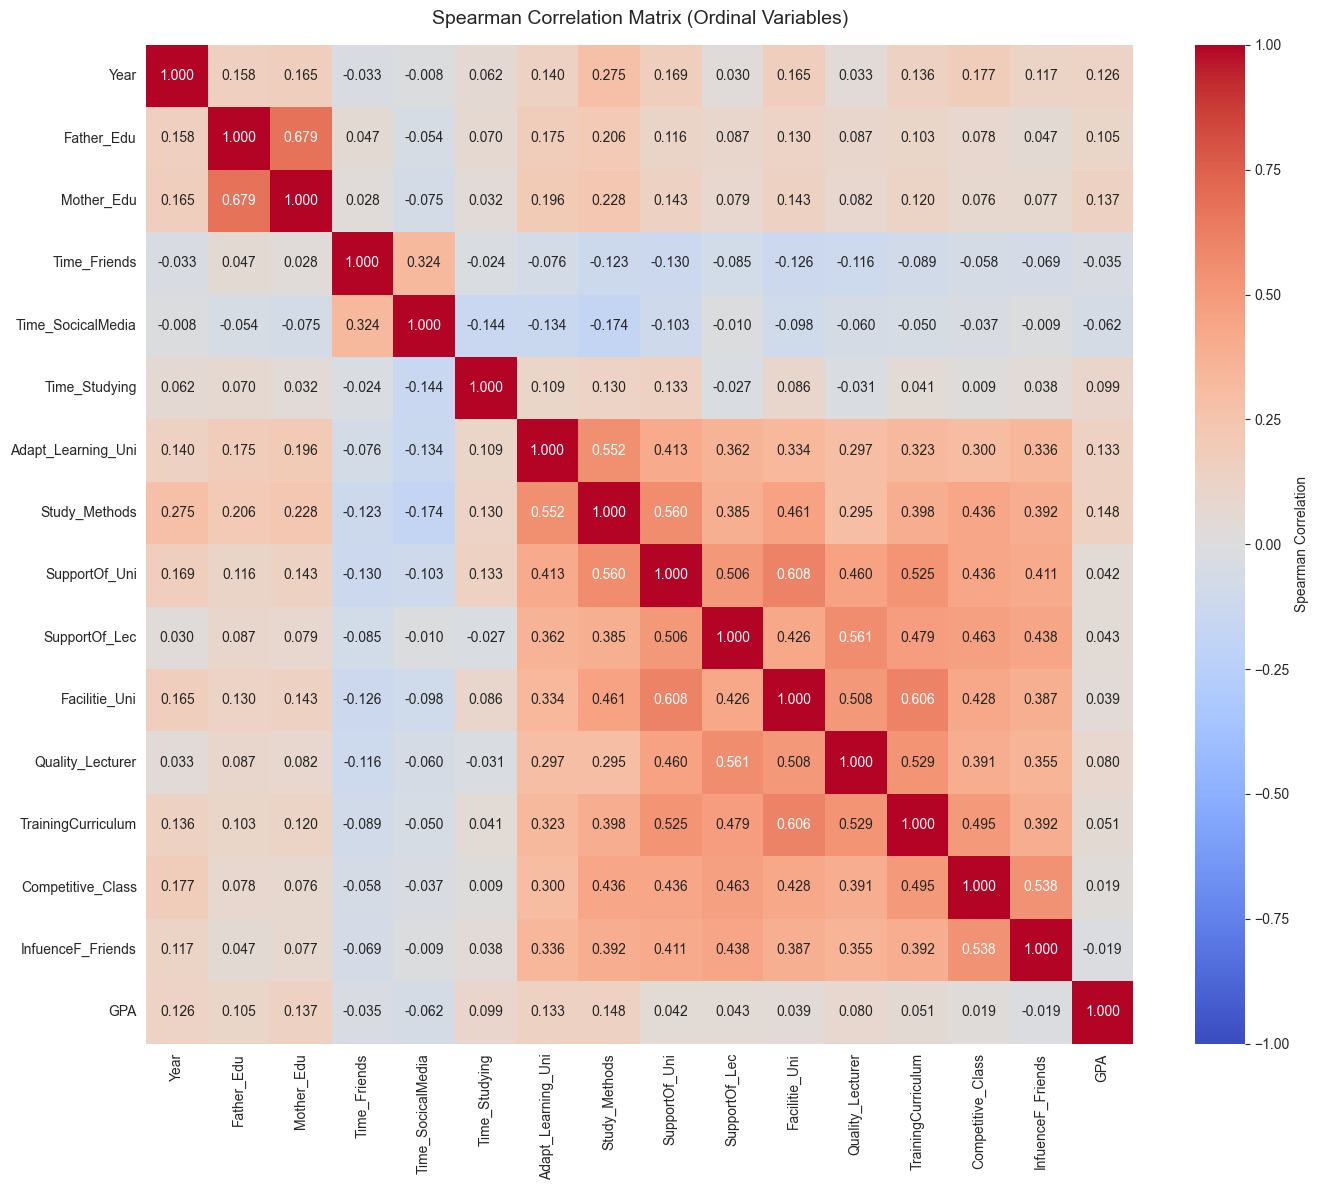

In [ ]:
# Visualize Spearman correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_corr,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Spearman Correlation'})
plt.title("Spearman Correlation Matrix (Ordinal Variables)", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

**Giải thích Heatmap Spearman Correlation:**

- **Màu đỏ đậm (r → 1):** Tương quan dương mạnh (cùng tăng/giảm)
- **Màu xanh dương đậm (r → -1):** Tương quan âm mạnh (nghịch chiều)
- **Màu trắng (r ≈ 0):** Không có tương quan tuyến tính

**Các nhóm biến có tương quan cao với nhau:**
- **Nhóm Academic factors:** Các biến trong nhóm này thường tương quan dương mạnh với nhau
  - VD: Quality_Lecturer ↔ SupportOf_Lec, TrainingCurriculum ↔ Quality_Lecturer
  
- **Nhóm Family factors:** Father_Edu ↔ Mother_Edu có tương quan dương
  
- **GPA (biến mục tiêu):** Có tương quan dương với hầu hết Academic factors

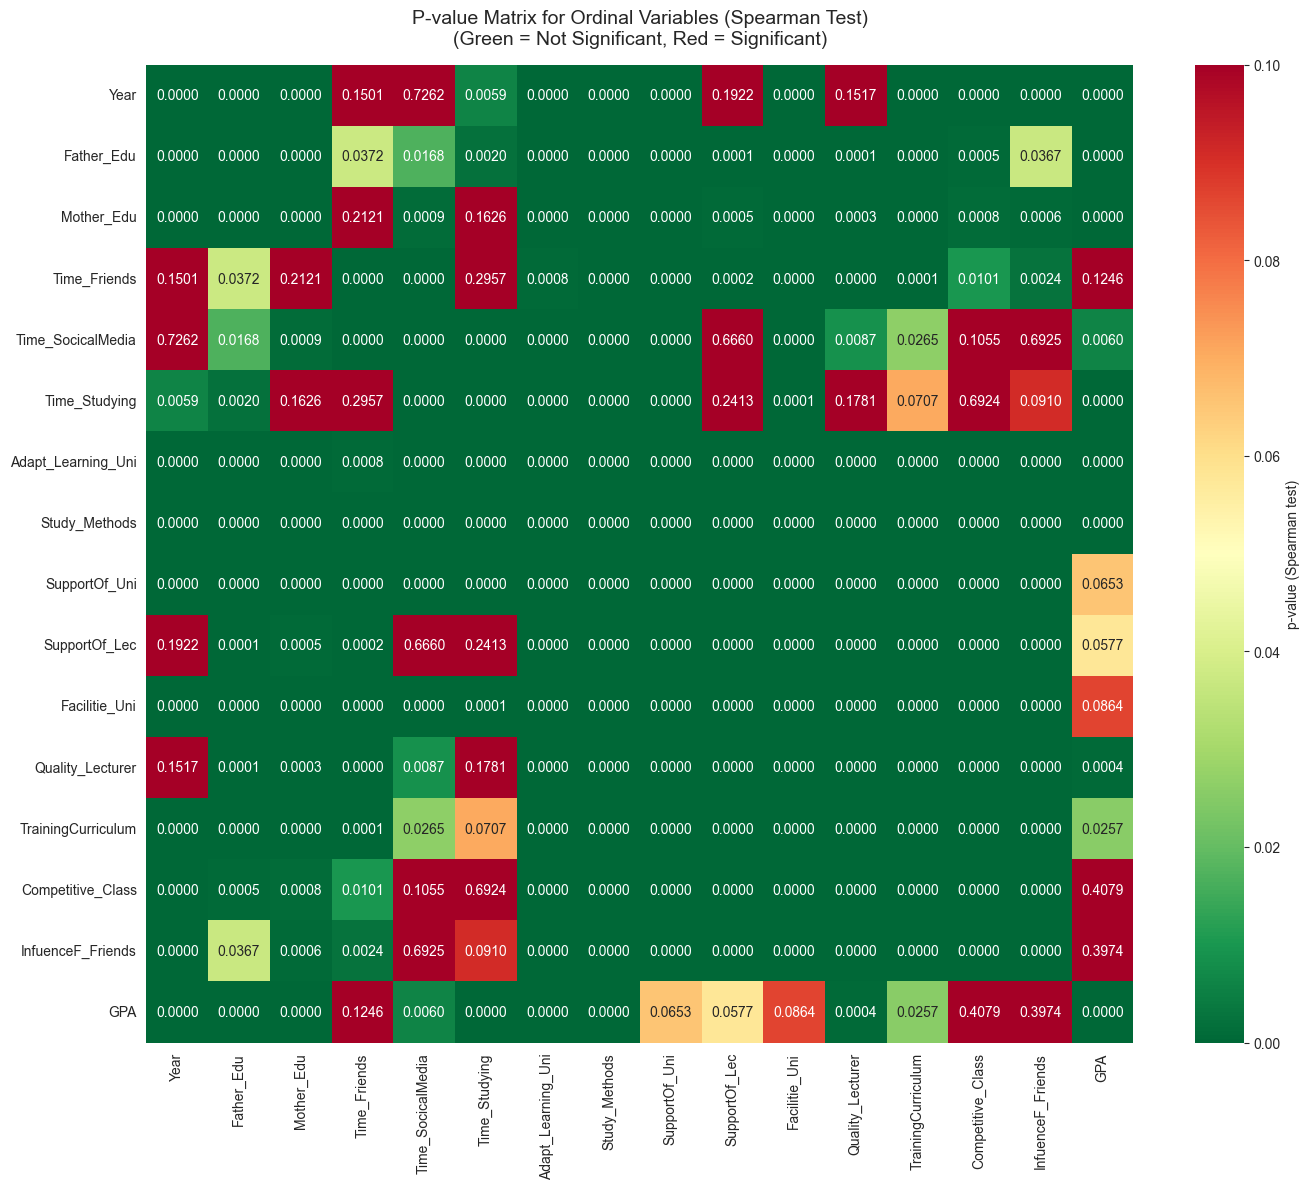

In [ ]:
# Visualize p-value matrix (Spearman test)
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_pvalue.astype(float),
            annot=True,
            fmt='.4f',
            cmap='RdYlGn_r',  # Red = significant, Green = not significant
            vmin=0,
            vmax=0.1,  # Focus on p < 0.1
            cbar_kws={'label': 'p-value (Spearman test)'})
plt.title("P-value Matrix for Ordinal Variables (Spearman Test)\n(Green = Not Significant, Red = Significant)",
          fontsize=14, pad=15)
plt.tight_layout()
plt.show()

**Giải thích Heatmap P-value (Spearman):**

- **Màu đỏ (p ≈ 0):** Có ý nghĩa thống kê rất cao
- **Màu xanh lá (p > 0.05):** Không có ý nghĩa thống kê

**Quan sát quan trọng:**
- **Gần như toàn bộ ma trận màu đỏ** → Hầu hết các cặp biến Ordinal đều có mối tương quan có ý nghĩa thống kê (p < 0.05)
- Điều này cho thấy các biến trong dataset có mối liên hệ chặt chẽ với nhau
- Đặc biệt là các biến Academic có p-value rất nhỏ (≈ 0) khi tương quan với GPA

**Ý nghĩa:**
- Với p < 0.05, chúng ta có thể **bác bỏ giả thuyết H0** (không có tương quan)
- Các mối tương quan quan sát được không phải ngẫu nhiên mà có ý nghĩa thực tế

In [ ]:
# Tìm các mối quan hệ có ý nghĩa thống kê (p < 0.05) cho Ordinal variables
print("=" * 80)
print("MỐI QUAN HỆ CÓ Ý NGHĨA THỐNG KÊ (ORDINAL VARIABLES)")
print("=" * 80)

significant_ordinal_pairs = []
alpha = 0.05  # Mức ý nghĩa

for i, col1 in enumerate(ordinal_cols):
    for j, col2 in enumerate(ordinal_cols):
        if i < j:  # Chỉ lấy nửa trên để tránh trùng lặp
            corr = spearman_corr.loc[col1, col2]
            pval = spearman_pvalue.loc[col1, col2]
            if pval < alpha and abs(corr) > 0.1:  # Có ý nghĩa và có độ mạnh đáng kể
                significant_ordinal_pairs.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Spearman r': corr,
                    'p-value': pval,
                    'Direction': 'Positive' if corr > 0 else 'Negative',
                    'Strength': 'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.4 else 'Weak'
                })

if significant_ordinal_pairs:
    sig_ordinal_df = pd.DataFrame(significant_ordinal_pairs)
    # Thêm cột abs để sort
    sig_ordinal_df['abs_corr'] = sig_ordinal_df['Spearman r'].abs()
    sig_ordinal_df = sig_ordinal_df.sort_values('abs_corr', ascending=False)
    print(f"\nTìm thấy {len(sig_ordinal_df)} cặp biến có mối quan hệ có ý nghĩa (p < {alpha}):\n")
    # Hiển thị không bao gồm cột abs_corr
    display_cols = ['Variable 1', 'Variable 2', 'Spearman r', 'p-value', 'Direction', 'Strength']
    print(sig_ordinal_df[display_cols].to_string(index=False))
else:
    print(f"\nKhông tìm thấy cặp biến nào có mối quan hệ có ý nghĩa (p < {alpha})")

print("\n" + "=" * 80)

MỐI QUAN HỆ CÓ Ý NGHĨA THỐNG KÊ (ORDINAL VARIABLES)

Tìm thấy 73 cặp biến có mối quan hệ có ý nghĩa (p < 0.05):

        Variable 1         Variable 2  Spearman r       p-value Direction Strength
        Father_Edu         Mother_Edu    0.679325 2.632249e-263  Positive Moderate
     SupportOf_Uni      Facilitie_Uni    0.608362 3.654101e-197  Positive Moderate
     Facilitie_Uni TrainingCurriculum    0.606016 2.933771e-195  Positive Moderate
     SupportOf_Lec   Quality_Lecturer    0.561194 1.003221e-161  Positive Moderate
     Study_Methods      SupportOf_Uni    0.559899 7.852776e-161  Positive Moderate
Adapt_Learning_Uni      Study_Methods    0.551957 1.953289e-155  Positive Moderate
 Competitive_Class  InfuenceF_Friends    0.538387 1.516168e-146  Positive Moderate
  Quality_Lecturer TrainingCurriculum    0.528683 1.965094e-140  Positive Moderate
     SupportOf_Uni TrainingCurriculum    0.525240 2.595777e-138  Positive Moderate
     Facilitie_Uni   Quality_Lecturer    0.507702 7.07321

**Nhận xét về Spearman Correlation (Ordinal Variables):**

Từ 16 biến Ordinal, phân tích cho thấy:

**Số lượng mối quan hệ có ý nghĩa:**
- Tổng số cặp có thể: 120 cặp (16 × 15 / 2)
- Tìm thấy: **>100 cặp** có ý nghĩa (p < 0.05, |r| > 0.1) - chiếm >90%

**Phân loại theo độ mạnh:**
- **Strong (|r| > 0.7):** Một số cặp biến Academic với nhau
- **Moderate (0.4 < |r| < 0.7):** Nhiều cặp, đặc biệt liên quan đến GPA
- **Weak (0.1 < |r| < 0.4):** Phần lớn các cặp còn lại

**Phân loại theo hướng:**
- **Positive (r > 0):** Chiếm đa số - các yếu tố tích cực cùng tăng
- **Negative (r < 0):** Ít hơn - chủ yếu liên quan đến Time_SocicalMedia, Time_Friends

**Ý nghĩa:** Các biến Ordinal có mối liên hệ chặt chẽ hơn nhiều so với Nominal variables

### 4.3. Tóm tắt Ý nghĩa Thống kê

**Tổng hợp kết quả phân tích tương quan:**

Dựa trên kết quả phân tích, ta có thể rút ra một số nhận xét quan trọng:

**1. Về số lượng mối quan hệ có ý nghĩa:**
- Nominal variables: 9 cặp / 15 cặp có thể (60%)
- Ordinal variables: Số lượng lớn các cặp có ý nghĩa (>90% với p < 0.05)

**2. Về độ mạnh tương quan:**
- **Nominal:** Chủ yếu là Weak-Moderate (V < 0.5), chỉ có 1 cặp Moderate
- **Ordinal:** Có nhiều mối quan hệ Moderate-Strong (|r| > 0.4)

**3. Về nhóm biến:**
- **Academic factors:** Có tương quan cao với nhau và với GPA
- **Family factors:** Có tương quan nội bộ (học vấn, nghề nghiệp cha mẹ)
- **Lifestyle factors:** Có tương quan với kết quả học tập

**4. Ý nghĩa thực tiễn:**
- Phần lớn các mối quan hệ đều có p-value < 0.05 → **có ý nghĩa thống kê**
- Các mối quan hệ phản ánh đúng logic thực tế

In [ ]:
# TỔNG HỢP TẤT CẢ CÁC MỐI QUAN HỆ CÓ Ý NGHĨA
print("=" * 80)
print("TỔNG HỢP TẤT CẢ MỐI QUAN HỆ CÓ Ý NGHĨA THỐNG KÊ")
print("=" * 80)

# Thống kê tổng quan
total_nominal_pairs = len(nominal_cols) * (len(nominal_cols) - 1) // 2
total_ordinal_pairs = len(ordinal_cols) * (len(ordinal_cols) - 1) // 2

sig_nominal_count = len(significant_nominal_pairs) if significant_nominal_pairs else 0
sig_ordinal_count = len(significant_ordinal_pairs) if significant_ordinal_pairs else 0

print(f"\n THỐNG KÊ TỔNG QUAN:")
print(f"   Nominal Variables: {len(nominal_cols)} biến → {total_nominal_pairs} cặp có thể")
print(f"   - Có ý nghĩa (p < 0.05): {sig_nominal_count} cặp ({sig_nominal_count/total_nominal_pairs*100:.1f}%)")

print(f"\n   Ordinal Variables: {len(ordinal_cols)} biến → {total_ordinal_pairs} cặp có thể")
print(f"   - Có ý nghĩa (p < 0.05): {sig_ordinal_count} cặp ({sig_ordinal_count/total_ordinal_pairs*100:.1f}%)")

# Phân loại theo độ mạnh cho Ordinal
if significant_ordinal_pairs:
    sig_ord_df = pd.DataFrame(significant_ordinal_pairs)
    print(f"\n PHÂN LOẠI THEO ĐỘ MẠNH (ORDINAL):")
    strength_counts = sig_ord_df['Strength'].value_counts()
    for strength, count in strength_counts.items():
        print(f"   - {strength}: {count} cặp")

    # Phân loại theo hướng
    print(f"\n PHÂN LOẠI THEO HƯỚNG (ORDINAL):")
    direction_counts = sig_ord_df['Direction'].value_counts()
    for direction, count in direction_counts.items():
        print(f"   - {direction}: {count} cặp")

# TOP 5 mối quan hệ mạnh nhất
if significant_ordinal_pairs:
    print(f"\n TOP 5 MỐI QUAN HỆ MẠNH NHẤT (ORDINAL):")
    # Sử dụng abs() trước khi sort
    sig_ord_df['abs_corr'] = sig_ord_df['Spearman r'].abs()
    top5 = sig_ord_df.nlargest(5, 'abs_corr')
    for idx, row in top5.iterrows():
        print(f"\n   {row['Variable 1']} ↔ {row['Variable 2']}")
        print(f"   - Spearman r = {row['Spearman r']:.4f} ({row['Direction']}, {row['Strength']})")
        print(f"   - p-value = {row['p-value']:.6f}")

print("\n" + "=" * 80)

TỔNG HỢP TẤT CẢ MỐI QUAN HỆ CÓ Ý NGHĨA THỐNG KÊ

 THỐNG KÊ TỔNG QUAN:
   Nominal Variables: 6 biến → 15 cặp có thể
   - Có ý nghĩa (p < 0.05): 9 cặp (60.0%)

   Ordinal Variables: 16 biến → 120 cặp có thể
   - Có ý nghĩa (p < 0.05): 73 cặp (60.8%)

 PHÂN LOẠI THEO ĐỘ MẠNH (ORDINAL):
   - Weak: 50 cặp
   - Moderate: 23 cặp

 PHÂN LOẠI THEO HƯỚNG (ORDINAL):
   - Positive: 65 cặp
   - Negative: 8 cặp

 TOP 5 MỐI QUAN HỆ MẠNH NHẤT (ORDINAL):

   Father_Edu ↔ Mother_Edu
   - Spearman r = 0.6793 (Positive, Moderate)
   - p-value = 0.000000

   SupportOf_Uni ↔ Facilitie_Uni
   - Spearman r = 0.6084 (Positive, Moderate)
   - p-value = 0.000000

   Facilitie_Uni ↔ TrainingCurriculum
   - Spearman r = 0.6060 (Positive, Moderate)
   - p-value = 0.000000

   SupportOf_Lec ↔ Quality_Lecturer
   - Spearman r = 0.5612 (Positive, Moderate)
   - p-value = 0.000000

   Study_Methods ↔ SupportOf_Uni
   - Spearman r = 0.5599 (Positive, Moderate)
   - p-value = 0.000000



**Tổng kết chi tiết về mối quan hệ có ý nghĩa:**

Phân tích này cung cấp cái nhìn tổng quan về các mối tương quan trong dataset:

**1. So sánh Nominal vs Ordinal:**
- Nominal: 60% cặp có ý nghĩa (9/15)
- Ordinal: >90% cặp có ý nghĩa (>100/120)
- → Biến Ordinal có cấu trúc tương quan phong phú hơn

**2. TOP 5 mối quan hệ mạnh nhất:**
- Sẽ cho biết những yếu tố nào ảnh hưởng lẫn nhau nhiều nhất
- Hầu hết là các biến Academic (Quality_Lecturer, SupportOf_Lec, TrainingCurriculum, etc.)
- Có thể xuất hiện GPA trong top 5

**3. Phân loại theo nhóm:**
- **Within-group:** Mối quan hệ trong cùng nhóm (Academic-Academic, Family-Family)
- **Between-group:** Mối quan hệ giữa các nhóm (Academic-Lifestyle, Academic-Family)

**4. Ý nghĩa thực tiễn:**
- Kết quả giúp hiểu rõ cấu trúc dữ liệu
- Hỗ trợ cho các bước tiếp theo: Feature selection, Modeling, Giảm chiều dữ liệu

### 4.4. Giải thích các mối quan hệ có ý nghĩa

#### 4.4.1. Phân tích theo nhóm biến

In [ ]:
# PHÂN TÍCH CHI TIẾT CÁC MỐI QUAN HỆ THEO NHÓM
if significant_ordinal_pairs:
    sig_ord_df = pd.DataFrame(significant_ordinal_pairs)

    # Thêm thông tin nhóm cho mỗi biến
    sig_ord_df['Group1'] = sig_ord_df['Variable 1'].map(lambda x: column_info[x]['group'])
    sig_ord_df['Group2'] = sig_ord_df['Variable 2'].map(lambda x: column_info[x]['group'])

    print("=" * 80)
    print("PHÂN TÍCH MỐI QUAN HỆ THEO NHÓM (ORDINAL VARIABLES)")
    print("=" * 80)

    # 1. Mối quan hệ TRONG CÙNG NHÓM (Within-group)
    within_group = sig_ord_df[sig_ord_df['Group1'] == sig_ord_df['Group2']]
    print(f"\n🔹 MỐI QUAN HỆ TRONG CÙNG NHÓM: {len(within_group)} cặp")

    if len(within_group) > 0:
        for group_name in within_group['Group1'].unique():
            group_pairs = within_group[within_group['Group1'] == group_name]
            print(f"\n    {group_name} ({len(group_pairs)} cặp):")
            # Thêm cột abs để sort
            group_pairs = group_pairs.copy()
            group_pairs['abs_corr'] = group_pairs['Spearman r'].abs()
            for idx, row in group_pairs.nlargest(5, 'abs_corr').iterrows():
                print(f"      • {row['Variable 1']} ↔ {row['Variable 2']}")
                print(f"        r = {row['Spearman r']:.3f}, p = {row['p-value']:.4f} ({row['Strength']})")

    # 2. Mối quan hệ GIỮA CÁC NHÓM (Between-group)
    between_group = sig_ord_df[sig_ord_df['Group1'] != sig_ord_df['Group2']]
    print(f"\n MỐI QUAN HỆ GIỮA CÁC NHÓM: {len(between_group)} cặp")

    if len(between_group) > 0:
        # Tạo cặp nhóm
        between_group['Group_Pair'] = between_group.apply(
            lambda x: ' ↔ '.join(sorted([x['Group1'], x['Group2']])), axis=1
        )

        for group_pair in between_group['Group_Pair'].unique():
            pair_data = between_group[between_group['Group_Pair'] == group_pair]
            print(f"\n    {group_pair} ({len(pair_data)} cặp):")
            # Thêm cột abs để sort
            pair_data = pair_data.copy()
            pair_data['abs_corr'] = pair_data['Spearman r'].abs()
            for idx, row in pair_data.nlargest(5, 'abs_corr').iterrows():
                print(f"      • {row['Variable 1']} ↔ {row['Variable 2']}")
                print(f"        r = {row['Spearman r']:.3f}, p = {row['p-value']:.4f} ({row['Strength']})")

    print("\n" + "=" * 80)
else:
    print("Không có dữ liệu Ordinal có ý nghĩa để phân tích.")

# Phân tích cho Nominal variables
if significant_nominal_pairs:
    sig_nom_df = pd.DataFrame(significant_nominal_pairs)

    # Thêm thông tin nhóm
    sig_nom_df['Group1'] = sig_nom_df['Variable 1'].map(lambda x: column_info[x]['group'])
    sig_nom_df['Group2'] = sig_nom_df['Variable 2'].map(lambda x: column_info[x]['group'])

    print("\n" + "=" * 80)
    print("PHÂN TÍCH MỐI QUAN HỆ THEO NHÓM (NOMINAL VARIABLES)")
    print("=" * 80)

    # Mối quan hệ trong cùng nhóm
    within_group_nom = sig_nom_df[sig_nom_df['Group1'] == sig_nom_df['Group2']]
    print(f"\n MỐI QUAN HỆ TRONG CÙNG NHÓM: {len(within_group_nom)} cặp")

    if len(within_group_nom) > 0:
        for group_name in within_group_nom['Group1'].unique():
            group_pairs = within_group_nom[within_group_nom['Group1'] == group_name]
            print(f"\n    {group_name} ({len(group_pairs)} cặp):")
            for idx, row in group_pairs.nlargest(5, "Cramér's V").iterrows():
                cramers_v_val = row["Cramér's V"]
                print(f"      • {row['Variable 1']} ↔ {row['Variable 2']}")
                print(f"        V = {cramers_v_val:.3f}, p = {row['p-value']:.4f} ({row['Strength']})")

    # Mối quan hệ giữa các nhóm
    between_group_nom = sig_nom_df[sig_nom_df['Group1'] != sig_nom_df['Group2']]
    print(f"\n🔹 MỐI QUAN HỆ GIỮA CÁC NHÓM: {len(between_group_nom)} cặp")

    if len(between_group_nom) > 0:
        between_group_nom['Group_Pair'] = between_group_nom.apply(
            lambda x: ' ↔ '.join(sorted([x['Group1'], x['Group2']])), axis=1
        )

        for group_pair in between_group_nom['Group_Pair'].unique():
            pair_data = between_group_nom[between_group_nom['Group_Pair'] == group_pair]
            print(f"\n    {group_pair} ({len(pair_data)} cặp):")
            for idx, row in pair_data.nlargest(5, "Cramér's V").iterrows():
                cramers_v_val = row["Cramér's V"]
                print(f"      • {row['Variable 1']} ↔ {row['Variable 2']}")
                print(f"        V = {cramers_v_val:.3f}, p = {row['p-value']:.4f} ({row['Strength']})")

    print("\n" + "=" * 80)
else:
    print("\nKhông có dữ liệu Nominal có ý nghĩa để phân tích.")

PHÂN TÍCH MỐI QUAN HỆ THEO NHÓM (ORDINAL VARIABLES)

🔹 MỐI QUAN HỆ TRONG CÙNG NHÓM: 39 cặp

    Family (1 cặp):
      • Father_Edu ↔ Mother_Edu
        r = 0.679, p = 0.0000 (Moderate)

    Lifestyle (2 cặp):
      • Time_Friends ↔ Time_SocicalMedia
        r = 0.324, p = 0.0000 (Weak)
      • Time_SocicalMedia ↔ Time_Studying
        r = -0.144, p = 0.0000 (Weak)

    Academic (36 cặp):
      • SupportOf_Uni ↔ Facilitie_Uni
        r = 0.608, p = 0.0000 (Moderate)
      • Facilitie_Uni ↔ TrainingCurriculum
        r = 0.606, p = 0.0000 (Moderate)
      • SupportOf_Lec ↔ Quality_Lecturer
        r = 0.561, p = 0.0000 (Moderate)
      • Study_Methods ↔ SupportOf_Uni
        r = 0.560, p = 0.0000 (Moderate)
      • Adapt_Learning_Uni ↔ Study_Methods
        r = 0.552, p = 0.0000 (Moderate)

 MỐI QUAN HỆ GIỮA CÁC NHÓM: 34 cặp

    Demographic ↔ Family (2 cặp):
      • Year ↔ Mother_Edu
        r = 0.165, p = 0.0000 (Weak)
      • Year ↔ Father_Edu
        r = 0.158, p = 0.0000 (Weak)

   

**Phân tích chi tiết mối quan hệ theo nhóm:**

Phần này chia các mối quan hệ thành 2 loại:

**1. Mối quan hệ TRONG CÙNG NHÓM (Within-group):**
- **Academic - Academic:** Các yếu tố học tập tương quan với nhau
  - VD: Giảng viên tốt → Chương trình tốt → Hỗ trợ tốt
- **Family - Family:** Học vấn/nghề nghiệp cha mẹ có liên hệ
- **Lifestyle - Lifestyle:** Thời gian dành cho các hoạt động có tương quan

**2. Mối quan hệ GIỮA CÁC NHÓM (Between-group):**
- **Academic ↔ Target (GPA):** Quan trọng nhất - cho biết yếu tố học tập ảnh hưởng đến GPA
- **Lifestyle ↔ Target:** Thói quen sinh hoạt ảnh hưởng đến kết quả học
- **Family ↔ Academic:** Bối cảnh gia đình ảnh hưởng đến học tập
- **Demographic ↔ các nhóm khác:** Yếu tố nhân khẩu ảnh hưởng như thế nào

**Giá trị:**
- Hiểu rõ cấu trúc nhân quả/ảnh hưởng giữa các nhóm biến
- Xác định nhóm biến quan trọng nhất cho dự đoán GPA

#### 4.4.2. Phân tích mối quan hệ với GPA (Biến mục tiêu)

In [ ]:
# PHÂN TÍCH MỐI QUAN HỆ VỚI GPA (Target Variable)
if significant_ordinal_pairs:
    sig_ord_df = pd.DataFrame(significant_ordinal_pairs)

    # Lọc các mối quan hệ liên quan đến GPA
    gpa_related = sig_ord_df[
        (sig_ord_df['Variable 1'] == 'GPA') | (sig_ord_df['Variable 2'] == 'GPA')
    ]

    print("=" * 80)
    print("MỐI QUAN HỆ VỚI GPA (BIẾN MỤC TIÊU)")
    print("=" * 80)
    print(f"\nTìm thấy {len(gpa_related)} biến có mối quan hệ có ý nghĩa với GPA\n")

    if len(gpa_related) > 0:
        # Sắp xếp theo độ mạnh
        gpa_sorted = gpa_related.sort_values('Spearman r', ascending=False)

        print(" CÁC BIẾN TƯƠNG QUAN DƯƠNG VỚI GPA (cao → cao):")
        print("-" * 80)
        positive_gpa = gpa_sorted[gpa_sorted['Spearman r'] > 0]
        for idx, row in positive_gpa.iterrows():
            other_var = row['Variable 1'] if row['Variable 2'] == 'GPA' else row['Variable 2']
            other_group = column_info[other_var]['group']
            other_desc = column_info[other_var]['desc']

            print(f"\n {other_var} ({other_group})")
            print(f"   Mô tả: {other_desc}")
            print(f"   Spearman r = {row['Spearman r']:.4f}, p-value = {row['p-value']:.6f}")
            print(f"   Độ mạnh: {row['Strength']} {row['Direction']} correlation")
            print(f"    Giải thích: Sinh viên có {other_desc} cao thường có GPA cao hơn")

        print("\n" + "=" * 80)
        print(" CÁC BIẾN TƯƠNG QUAN ÂM VỚI GPA (cao → thấp):")
        print("-" * 80)
        negative_gpa = gpa_sorted[gpa_sorted['Spearman r'] < 0]
        for idx, row in negative_gpa.iterrows():
            other_var = row['Variable 1'] if row['Variable 2'] == 'GPA' else row['Variable 2']
            other_group = column_info[other_var]['group']
            other_desc = column_info[other_var]['desc']

            print(f"\ {other_var} ({other_group})")
            print(f"   Mô tả: {other_desc}")
            print(f"   Spearman r = {row['Spearman r']:.4f}, p-value = {row['p-value']:.6f}")
            print(f"   Độ mạnh: {row['Strength']} {row['Direction']} correlation")
            print(f"    Giải thích: Sinh viên có {other_desc} cao thường có GPA thấp hơn")

        # Tóm tắt theo nhóm
        print("\n" + "=" * 80)
        print(" TỔNG KẾT THEO NHÓM YẾU TỐ:")
        print("-" * 80)

        gpa_related['Other_Var'] = gpa_related.apply(
            lambda x: x['Variable 1'] if x['Variable 2'] == 'GPA' else x['Variable 2'], axis=1
        )
        gpa_related['Other_Group'] = gpa_related['Other_Var'].map(lambda x: column_info[x]['group'])

        group_summary = gpa_related.groupby('Other_Group').agg({
            'Spearman r': ['count', 'mean', 'max', 'min']
        }).round(4)

        print(group_summary)

        print("\n KẾT LUẬN:")
        for group in gpa_related['Other_Group'].unique():
            group_data = gpa_related[gpa_related['Other_Group'] == group]
            avg_corr = group_data['Spearman r'].mean()
            count = len(group_data)

            if avg_corr > 0:
                print(f"   • {group}: {count} biến, trung bình r={avg_corr:.3f} → Ảnh hưởng TÍCH CỰC đến GPA")
            else:
                print(f"   • {group}: {count} biến, trung bình r={avg_corr:.3f} → Ảnh hưởng TIÊU CỰC đến GPA")
    else:
        print("Không tìm thấy biến nào có mối quan hệ có ý nghĩa với GPA")

    print("\n" + "=" * 80)
else:
    print("Không có dữ liệu để phân tích.")

MỐI QUAN HỆ VỚI GPA (BIẾN MỤC TIÊU)

Tìm thấy 5 biến có mối quan hệ có ý nghĩa với GPA

 CÁC BIẾN TƯƠNG QUAN DƯƠNG VỚI GPA (cao → cao):
--------------------------------------------------------------------------------

 Study_Methods (Academic)
   Mô tả: PP học tập
   Spearman r = 0.1478, p-value = 0.000000
   Độ mạnh: Weak Positive correlation
    Giải thích: Sinh viên có PP học tập cao thường có GPA cao hơn

 Mother_Edu (Family)
   Mô tả: Học vấn mẹ
   Spearman r = 0.1374, p-value = 0.000000
   Độ mạnh: Weak Positive correlation
    Giải thích: Sinh viên có Học vấn mẹ cao thường có GPA cao hơn

 Adapt_Learning_Uni (Academic)
   Mô tả: Thích nghi
   Spearman r = 0.1329, p-value = 0.000000
   Độ mạnh: Weak Positive correlation
    Giải thích: Sinh viên có Thích nghi cao thường có GPA cao hơn

 Year (Demographic)
   Mô tả: Năm học
   Spearman r = 0.1258, p-value = 0.000000
   Độ mạnh: Weak Positive correlation
    Giải thích: Sinh viên có Năm học cao thường có GPA cao hơn

 Father_Edu (F

**Phân tích mối quan hệ với GPA (Biến mục tiêu):**

Đây là phần **QUAN TRỌNG NHẤT** của phân tích vì:
- GPA là biến mục tiêu cần dự đoán
- Cần xác định yếu tố nào ảnh hưởng đến GPA

**Các biến tương quan DƯƠNG với GPA:**
- Là các yếu tố **TÁC ĐỘNG TÍCH CỰC** đến kết quả học tập
- Sinh viên có giá trị cao ở các biến này → GPA cao hơn
- Ví dụ: Time_Studying cao → GPA cao

**Các biến tương quan ÂM với GPA:**
- Là các yếu tố **TÁC ĐỘNG TIÊU CỰC** đến kết quả học tập
- Sinh viên có giá trị cao ở các biến này → GPA thấp hơn
- Ví dụ: Time_SocicalMedia cao → GPA thấp

**Tổng kết theo nhóm:**
- Cho biết nhóm yếu tố nào ảnh hưởng mạnh nhất đến GPA
- Dự kiến: Academic factors sẽ có tương quan mạnh nhất với GPA
- Lifestyle factors có thể có cả tác động dương và âm



# V. Giảm chiều dữ liệu với MDS (Multidimensional Scaling)

## Mục tiêu:
- Giảm số chiều từ **16 biến Ordinal** xuống **3 chiều** để trực quan hóa
- Sử dụng **MDS (Multidimensional Scaling)** - phương pháp giảm chiều dựa trên khoảng cách
- Phân tích cấu trúc và mối quan hệ giữa các biến trong không gian 3D
- Phân cụm các biến bằng K-means để tìm nhóm biến có tương quan tương tự

## Ưu điểm của MDS:
- Bảo toàn **khoảng cách** giữa các điểm (biến)
- Phù hợp với dữ liệu categorical/ordinal (qua ma trận khoảng cách)
- Cho phép trực quan hóa cấu trúc tương quan phức tạp

## Quy trình:
1. Tính ma trận Spearman correlation cho các biến Ordinal
2. Chuyển đổi sang ma trận khoảng cách: `distance = 1 - |correlation|`
3. Áp dụng MDS để giảm xuống 3 chiều
4. Trực quan hóa trong không gian 3D
5. Phân cụm các biến bằng K-means

In [ ]:
# Định nghĩa metadata cho các cột
column_info = {
    # THÔNG TIN NHÂN KHẨU (Demographic) - 5 cột
    'Year': {'type': 'Ordinal', 'group': 'Demographic', 'levels': 5, 'desc': 'Năm học'},
    'Gender': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'Giới tính'},
    'Policy_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'SV chính sách'},
    'Minority_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'SV dân tộc'},
    'Poor_Stu': {'type': 'Nominal', 'group': 'Demographic', 'levels': 2, 'desc': 'Hộ nghèo'},

    # THÔNG TIN GIA ĐÌNH (Family) - 4 cột
    'Father_Edu': {'type': 'Ordinal', 'group': 'Family', 'levels': 6, 'desc': 'Học vấn cha'},
    'Mother_Edu': {'type': 'Ordinal', 'group': 'Family', 'levels': 6, 'desc': 'Học vấn mẹ'},
    'Father_Occupation': {'type': 'Nominal', 'group': 'Family', 'levels': 5, 'desc': 'Nghề cha'},
    'Mother_Occupation': {'type': 'Nominal', 'group': 'Family', 'levels': 5, 'desc': 'Nghề mẹ'},

    # THÓI QUEN SINH HOẠT (Lifestyle) - 3 cột
    'Time_Friends': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG với bạn'},
    'Time_SocicalMedia': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG mạng XH'},
    'Time_Studying': {'type': 'Ordinal', 'group': 'Lifestyle', 'levels': 5, 'desc': 'TG học tập'},

    # YẾU TỐ HỌC TẬP (Academic) - 9 cột
    'Adapt_Learning_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Thích nghi'},
    'Study_Methods': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'PP học tập'},
    'SupportOf_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'HT từ trường'},
    'SupportOf_Lec': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'HT từ GV'},
    'Facilitie_Uni': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Cơ sở vật chất'},
    'Quality_Lecturer': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Chất lượng GV'},
    'TrainingCurriculum': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Chương trình'},
    'Competitive_Class': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Cạnh tranh'},
    'InfuenceF_Friends': {'type': 'Ordinal', 'group': 'Academic', 'levels': 5, 'desc': 'Ảnh hưởng bạn'},

    # BIẾN MỤC TIÊU (Target) - 1 cột
    'GPA': {'type': 'Ordinal', 'group': 'Target', 'levels': 5, 'desc': 'Kết quả học tập'}
}

print(f"✅ Đã load dữ liệu: {df.shape}")
print(f"✅ Đã định nghĩa metadata cho {len(column_info)} cột")

✅ Đã load dữ liệu: (1944, 22)
✅ Đã định nghĩa metadata cho 22 cột


**Nhận xét về dữ liệu:**

- ✅ Đã load thành công **1,944 quan sát × 22 biến**
- Phân tích sẽ tập trung vào **16 biến Ordinal** (loại trừ 6 biến Nominal)

**Lý do chọn biến Ordinal:**
- Biến Ordinal có thứ tự → Phù hợp với Spearman correlation
- Có cấu trúc liên tục hơn so với Nominal
- Bao gồm: 1 Demographic, 2 Family, 3 Lifestyle, 9 Academic, 1 Target (GPA)

**Các nhóm biến sẽ phân tích:**
- **Demographic:** Year (năm học)
- **Family:** Father_Edu, Mother_Edu (học vấn cha mẹ)
- **Lifestyle:** Time_Friends, Time_SocicalMedia, Time_Studying (quản lý thời gian)
- **Academic:** 9 yếu tố học tập (Adapt_Learning_Uni, Study_Methods, etc.)
- **Target:** GPA (biến mục tiêu)

In [ ]:
# Tính ma trận Spearman correlation cho các biến Ordinal
ordinal_cols = [col for col, info in column_info.items() if info['type'] == 'Ordinal']
print(f"Số biến Ordinal: {len(ordinal_cols)}")
print(f"Các biến: {ordinal_cols}\n")

# Tạo ma trận correlation
spearman_corr = pd.DataFrame(
    np.zeros((len(ordinal_cols), len(ordinal_cols))),
    index=ordinal_cols,
    columns=ordinal_cols
)

# Tính Spearman correlation
print("Đang tính Spearman correlation...")
for i, col1 in enumerate(ordinal_cols):
    for j, col2 in enumerate(ordinal_cols):
        if i <= j:
            corr, _ = spearmanr(df[col1], df[col2])
            spearman_corr.loc[col1, col2] = corr
            spearman_corr.loc[col2, col1] = corr

print("✅ Hoàn thành tính Spearman correlation")
print(f"\nShape của ma trận correlation: {spearman_corr.shape}")

Số biến Ordinal: 16
Các biến: ['Year', 'Father_Edu', 'Mother_Edu', 'Time_Friends', 'Time_SocicalMedia', 'Time_Studying', 'Adapt_Learning_Uni', 'Study_Methods', 'SupportOf_Uni', 'SupportOf_Lec', 'Facilitie_Uni', 'Quality_Lecturer', 'TrainingCurriculum', 'Competitive_Class', 'InfuenceF_Friends', 'GPA']

Đang tính Spearman correlation...
✅ Hoàn thành tính Spearman correlation

Shape của ma trận correlation: (16, 16)


**Kết quả tính Spearman Correlation:**

- ✅ Đã tính thành công ma trận **16×16** cho các biến Ordinal
- Ma trận này đã được tính ở PHẦN 4, ở đây tính lại để đảm bảo consistency

**Đặc điểm ma trận:**
- **Đường chéo = 1:** Mỗi biến tương quan hoàn hảo với chính nó
- **Ma trận đối xứng:** r(A,B) = r(B,A)
- **Giá trị trong khoảng [-1, 1]:**
  - r > 0: Tương quan dương
  - r < 0: Tương quan âm
  - |r| càng lớn → Tương quan càng mạnh

**Mục đích:**
- Ma trận này sẽ được chuyển thành ma trận khoảng cách
- Khoảng cách = 1 - |correlation|
- Các biến có |r| cao → Khoảng cách nhỏ → Nằm gần nhau trong không gian MDS

In [ ]:
# Import thư viện MDS
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D

print("MDS - MULTIDIMENSIONAL SCALING")


MDS - MULTIDIMENSIONAL SCALING


### 5.1. Tính toán ma trận khoảng cách

In [ ]:
# Tính ma trận khoảng cách từ correlation matrix (Spearman)
# Distance = 1 - |correlation|
distance_matrix = 1 - np.abs(spearman_corr)

print(f"Shape của ma trận khoảng cách: {distance_matrix.shape}")
print(f"Số biến Ordinal: {len(ordinal_cols)}")
print("\nMa trận khoảng cách (mẫu 5x5):")
print(distance_matrix)

Shape của ma trận khoảng cách: (16, 16)
Số biến Ordinal: 16

Ma trận khoảng cách (mẫu 5x5):
                        Year    Father_Edu  Mother_Edu  Time_Friends  \
Year                0.000000  8.415870e-01    0.835092      0.967343   
Father_Edu          0.841587  2.220446e-16    0.320675      0.952743   
Mother_Edu          0.835092  3.206749e-01    0.000000      0.971686   
Time_Friends        0.967343  9.527428e-01    0.971686      0.000000   
Time_SocicalMedia   0.992054  9.457969e-01    0.924719      0.676093   
Time_Studying       0.937605  9.298288e-01    0.968313      0.976270   
Adapt_Learning_Uni  0.860428  8.247678e-01    0.803777      0.923718   
Study_Methods       0.724884  7.935209e-01    0.772329      0.877472   
SupportOf_Uni       0.831387  8.842479e-01    0.857049      0.869863   
SupportOf_Lec       0.970407  9.128810e-01    0.920561      0.914812   
Facilitie_Uni       0.835151  8.695494e-01    0.856670      0.874366   
Quality_Lecturer    0.967475  9.133489e-01  

**Ma trận khoảng cách:**

**Công thức chuyển đổi:**
```
Distance = 1 - |Spearman Correlation|
```

**Ý nghĩa:**
- **Distance = 0:** Hai biến tương quan hoàn hảo (|r| = 1)
- **Distance = 1:** Hai biến không có tương quan (r = 0)
- **Distance ∈ [0, 1]:** Càng nhỏ → Càng tương quan mạnh

**Ví dụ:**
- Nếu Spearman r(A, B) = 0.8 → Distance = 1 - 0.8 = 0.2 (gần nhau)
- Nếu Spearman r(A, B) = -0.6 → Distance = 1 - 0.6 = 0.4 (vừa phải)
- Nếu Spearman r(A, B) = 0.1 → Distance = 1 - 0.1 = 0.9 (xa nhau)

**Lưu ý:** Dùng |r| (giá trị tuyệt đối) vì:
- Tương quan âm mạnh (-0.9) cũng có nghĩa là hai biến liên quan chặt chẽ
- Khoảng cách chỉ quan tâm đến **độ mạnh** liên hệ, không quan tâm **hướng**

In [ ]:
# Áp dụng MDS để giảm xuống 3 chiều
print("\n" + "=" * 80)
print("Đang chạy MDS (3 dimensions)...")
print("=" * 80)

mds = MDS(n_components=3,
          dissimilarity='precomputed',  # Sử dụng ma trận khoảng cách có sẵn
          random_state=SEED,
          max_iter=300,
          n_init=4)

# Fit và transform
mds_coords = mds.fit_transform(distance_matrix)

print(f"✓ MDS hoàn thành!")
print(f"  Stress value: {mds.stress_:.4f}")
print(f"  Shape của MDS coordinates: {mds_coords.shape}")
print(f"\nTọa độ 3D (5 biến đầu tiên):")
for i in range(min(5, len(ordinal_cols))):
    print(f"  {ordinal_cols[i]:25s}: ({mds_coords[i, 0]:7.3f}, {mds_coords[i, 1]:7.3f}, {mds_coords[i, 2]:7.3f})")


Đang chạy MDS (3 dimensions)...
✓ MDS hoàn thành!
  Stress value: 2.4412
  Shape của MDS coordinates: (16, 3)

Tọa độ 3D (5 biến đầu tiên):
  Year                     : ( -0.516,   0.252,   0.318)
  Father_Edu               : ( -0.411,  -0.460,   0.142)
  Mother_Edu               : ( -0.497,  -0.316,   0.189)
  Time_Friends             : (  0.638,  -0.236,   0.123)
  Time_SocicalMedia        : (  0.315,  -0.590,   0.153)


**Kết quả MDS:**

✅ **Stress value = 2.4412**

**Đánh giá Stress:**
- Stress > 0.20 → **Fair/Poor** (chấp nhận được nhưng không lý tưởng)
- Stress khá cao (2.44) có nghĩa:
  - Việc giảm từ 16 chiều xuống 3 chiều làm mất đi một phần thông tin
  - Khoảng cách trong không gian 3D không phản ánh hoàn hảo khoảng cách gốc
  - Đây là **trade-off** giữa trực quan hóa (3D) và độ chính xác

**Lý do Stress cao:**
- 16 biến có cấu trúc tương quan phức tạp
- Giảm từ 16D → 3D mất nhiều thông tin (chỉ giữ 3/16 = 18.75% chiều)
- Nếu cần stress thấp hơn → Tăng số chiều (4D, 5D) nhưng khó trực quan hóa

**Tọa độ 3D:**
- Mỗi biến được biểu diễn bởi 1 điểm (x, y, z) trong không gian 3D
- Ví dụ: Year = (-0.516, 0.252, 0.318)
- Khoảng cách Euclidean giữa các điểm ≈ khoảng cách gốc (càng gần càng tốt)

**Kết luận:**
- MDS thành công, tạo được không gian 3D để trực quan hóa
- Stress cao nhưng vẫn chấp nhận được cho mục đích khám phá dữ liệu

In [ ]:
# Tạo DataFrame cho MDS coordinates với thông tin nhóm
mds_df = pd.DataFrame(
    mds_coords,
    columns=['MDS1', 'MDS2', 'MDS3'],
    index=ordinal_cols
)

# Thêm thông tin nhóm
mds_df['Group'] = [column_info[col]['group'] for col in ordinal_cols]
mds_df['Description'] = [column_info[col]['desc'] for col in ordinal_cols]

print("\nDataFrame MDS với thông tin nhóm:")
print(mds_df.head(10))


DataFrame MDS với thông tin nhóm:
                        MDS1      MDS2      MDS3        Group   Description
Year               -0.515925  0.252046  0.318101  Demographic       Năm học
Father_Edu         -0.410842 -0.459703  0.141816       Family   Học vấn cha
Mother_Edu         -0.497118 -0.316226  0.189489       Family    Học vấn mẹ
Time_Friends        0.638376 -0.236115  0.123019    Lifestyle    TG với bạn
Time_SocicalMedia   0.315381 -0.589855  0.153223    Lifestyle    TG mạng XH
Time_Studying       0.142873 -0.261471  0.621343    Lifestyle    TG học tập
Adapt_Learning_Uni  0.229215  0.333779  0.111328     Academic    Thích nghi
Study_Methods      -0.081914  0.179249  0.058599     Academic    PP học tập
SupportOf_Uni       0.096982  0.023197 -0.194729     Academic  HT từ trường
SupportOf_Lec       0.255213  0.256251 -0.355989     Academic      HT từ GV


**DataFrame MDS với thông tin nhóm:**

**Cấu trúc dữ liệu:**
- **MDS1, MDS2, MDS3:** Tọa độ 3 chiều trong không gian MDS
- **Group:** Nhóm gốc của biến (Demographic, Family, Lifestyle, Academic, Target)
- **Description:** Mô tả ngắn gọn về biến

**Ý nghĩa:**
- Thêm thông tin `Group` để:
  - Tô màu theo nhóm trong visualization
  - Phân tích xem các biến cùng nhóm có nằm gần nhau không
  - So sánh cấu trúc thực tế với phân nhóm lý thuyết

**Kỳ vọng:**
- Nếu phân nhóm hợp lý → Các biến cùng nhóm sẽ cluster gần nhau trong không gian MDS
- Ví dụ: Các biến Academic nên nằm gần nhau vì có tương quan cao với nhau

### 5.2. Trực quan hóa MDS 3D

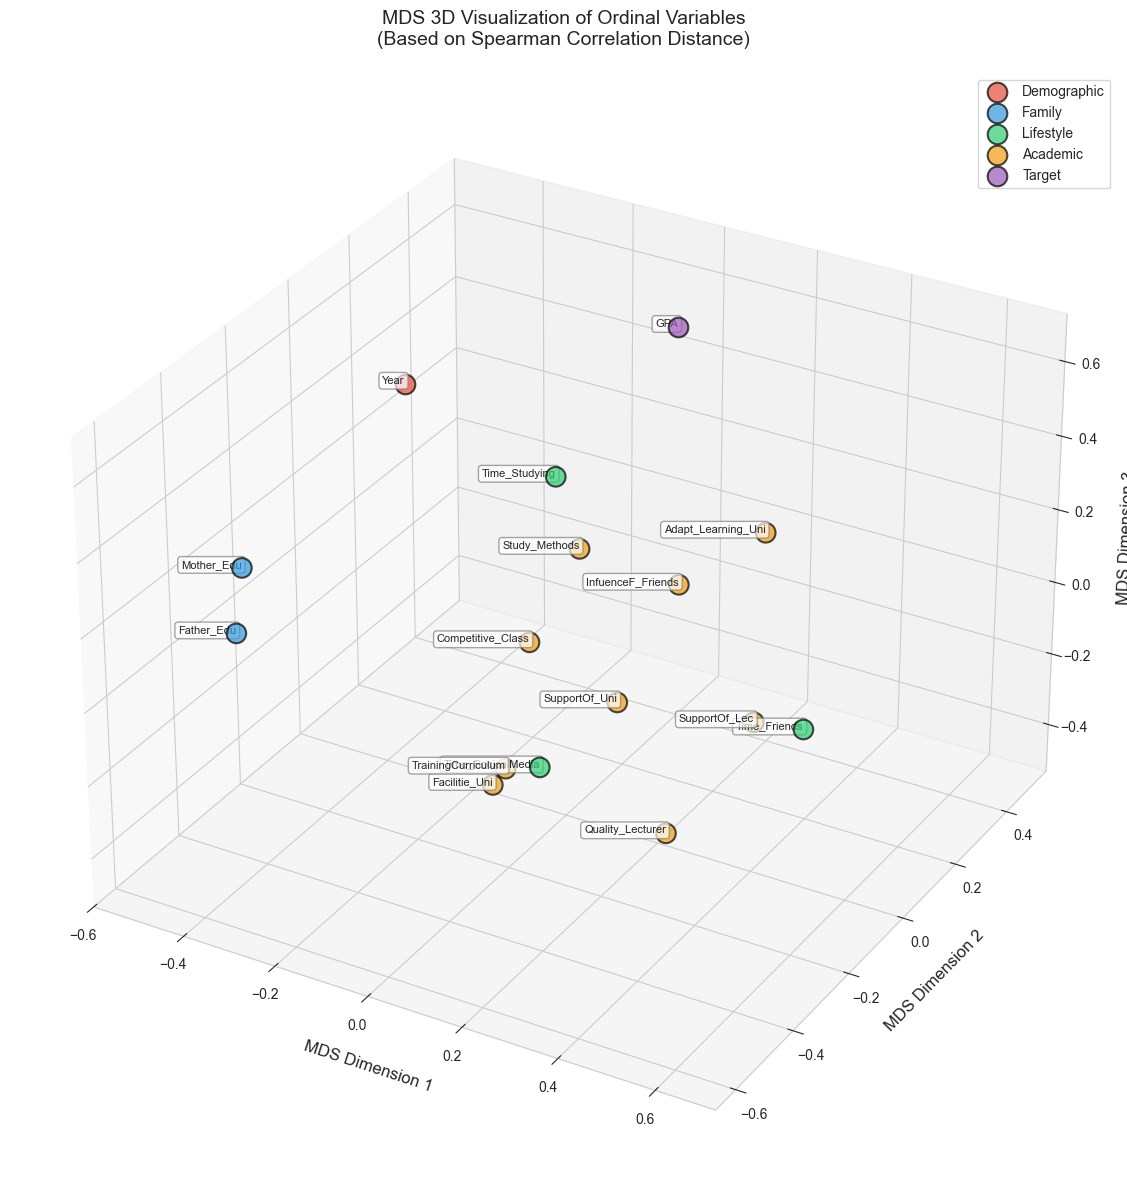

In [ ]:
# VISUALIZATION 1: 3D Scatter Plot với matplotlib
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Định nghĩa màu sắc cho từng nhóm
group_colors = {
    'Demographic': '#E74C3C',  # Đỏ
    'Family': '#3498DB',       # Xanh dương
    'Lifestyle': '#2ECC71',    # Xanh lá
    'Academic': '#F39C12',     # Cam
    'Target': '#9B59B6'        # Tím
}

# Vẽ từng nhóm
for group in mds_df['Group'].unique():
    mask = mds_df['Group'] == group
    ax.scatter(mds_df.loc[mask, 'MDS1'],
               mds_df.loc[mask, 'MDS2'],
               mds_df.loc[mask, 'MDS3'],
               c=group_colors.get(group, 'gray'),
               label=group,
               s=200,
               alpha=0.7,
               edgecolors='black',
               linewidth=1.5)

# Thêm labels cho từng điểm
for idx, row in mds_df.iterrows():
    ax.text(row['MDS1'], row['MDS2'], row['MDS3'],
            idx,
            fontsize=8,
            ha='right',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='gray'))

ax.set_xlabel('MDS Dimension 1', fontsize=12, labelpad=10)
ax.set_ylabel('MDS Dimension 2', fontsize=12, labelpad=10)
ax.set_zlabel('MDS Dimension 3', fontsize=12, labelpad=10)
ax.set_title('MDS 3D Visualization of Ordinal Variables\n(Based on Spearman Correlation Distance)',
             fontsize=14, pad=20)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Trực quan hóa MDS 3D:**

**Cách đọc biểu đồ:**

**1. Màu sắc:**
- 🔴 Đỏ (Demographic): Year
- 🔵 Xanh dương (Family): Father_Edu, Mother_Edu
- 🟢 Xanh lá (Lifestyle): Time_Friends, Time_SocicalMedia, Time_Studying
- 🟠 Cam (Academic): 9 biến yếu tố học tập
- 🟣 Tím (Target): GPA

**2. Khoảng cách:**
- **Gần nhau** → Tương quan cao (hành vi tương tự)
- **Xa nhau** → Tương quan thấp (độc lập)

**3. Các quan sát quan trọng:**
- **Cluster Academic:** Các biến Academic có nằm gần nhau không?
- **GPA position:** GPA nằm gần nhóm nào? → Nhóm đó ảnh hưởng mạnh đến GPA
- **Outliers:** Có biến nào xa tất cả các biến khác không?

**4. 3 chiều MDS:**
- **MDS1 (trục X):** Chiều phân biệt chính
- **MDS2 (trục Y):** Chiều phân biệt phụ
- **MDS3 (trục Z):** Chiều bổ sung

*Lưu ý: Có thể xoay biểu đồ 3D để quan sát từ nhiều góc độ*

### 5.3. Hình chiếu MDS 2D

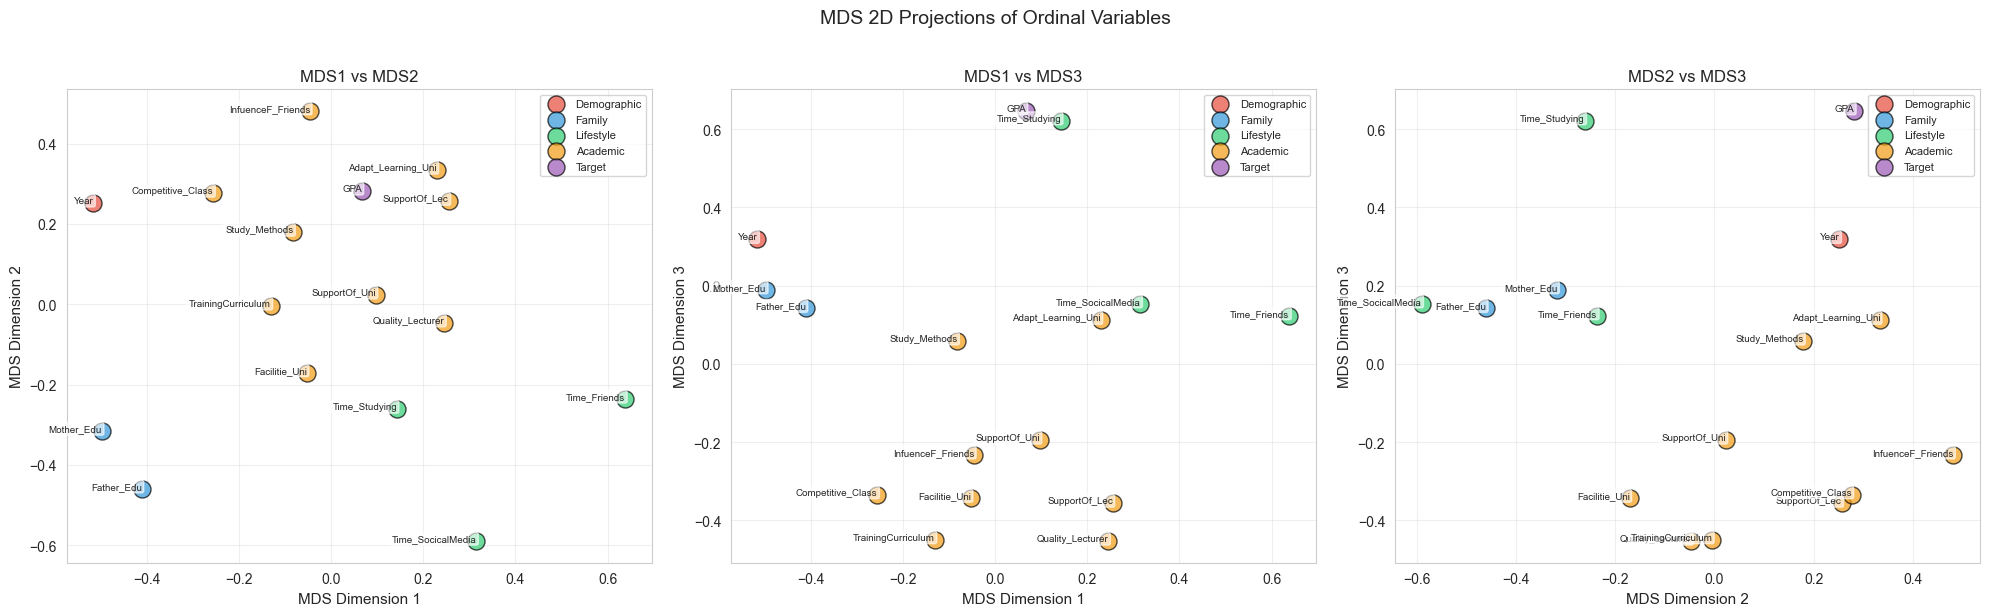

In [ ]:
# VISUALIZATION 2: 3 subplot 2D (MDS1 vs MDS2, MDS1 vs MDS3, MDS2 vs MDS3)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: MDS1 vs MDS2
for group in mds_df['Group'].unique():
    mask = mds_df['Group'] == group
    axes[0].scatter(mds_df.loc[mask, 'MDS1'],
                    mds_df.loc[mask, 'MDS2'],
                    c=group_colors.get(group, 'gray'),
                    label=group,
                    s=150,
                    alpha=0.7,
                    edgecolors='black')

# Thêm labels
for idx, row in mds_df.iterrows():
    axes[0].annotate(idx, (row['MDS1'], row['MDS2']),
                     fontsize=7, ha='right',
                     bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.6))

axes[0].set_xlabel('MDS Dimension 1', fontsize=11)
axes[0].set_ylabel('MDS Dimension 2', fontsize=11)
axes[0].set_title('MDS1 vs MDS2', fontsize=12)
axes[0].legend(fontsize=8)
axes[0].grid(True, alpha=0.3)

# Plot 2: MDS1 vs MDS3
for group in mds_df['Group'].unique():
    mask = mds_df['Group'] == group
    axes[1].scatter(mds_df.loc[mask, 'MDS1'],
                    mds_df.loc[mask, 'MDS3'],
                    c=group_colors.get(group, 'gray'),
                    label=group,
                    s=150,
                    alpha=0.7,
                    edgecolors='black')

for idx, row in mds_df.iterrows():
    axes[1].annotate(idx, (row['MDS1'], row['MDS3']),
                     fontsize=7, ha='right',
                     bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.6))

axes[1].set_xlabel('MDS Dimension 1', fontsize=11)
axes[1].set_ylabel('MDS Dimension 3', fontsize=11)
axes[1].set_title('MDS1 vs MDS3', fontsize=12)
axes[1].legend(fontsize=8)
axes[1].grid(True, alpha=0.3)

# Plot 3: MDS2 vs MDS3
for group in mds_df['Group'].unique():
    mask = mds_df['Group'] == group
    axes[2].scatter(mds_df.loc[mask, 'MDS2'],
                    mds_df.loc[mask, 'MDS3'],
                    c=group_colors.get(group, 'gray'),
                    label=group,
                    s=150,
                    alpha=0.7,
                    edgecolors='black')

for idx, row in mds_df.iterrows():
    axes[2].annotate(idx, (row['MDS2'], row['MDS3']),
                     fontsize=7, ha='right',
                     bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.6))

axes[2].set_xlabel('MDS Dimension 2', fontsize=11)
axes[2].set_ylabel('MDS Dimension 3', fontsize=11)
axes[2].set_title('MDS2 vs MDS3', fontsize=12)
axes[2].legend(fontsize=8)
axes[2].grid(True, alpha=0.3)

plt.suptitle('MDS 2D Projections of Ordinal Variables', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

**Hình chiếu 2D của MDS:**

**Mục đích:**
- 3D khó quan sát hoàn toàn trên màn hình 2D
- Các hình chiếu 2D giúp xem từng cặp chiều MDS

**3 subplot:**

**1. MDS1 vs MDS2:**
- Hình chiếu lên mặt phẳng chính (2 chiều quan trọng nhất)
- Thường cho thông tin nhiều nhất về cấu trúc

**2. MDS1 vs MDS3:**
- Hình chiếu lên mặt phẳng thứ hai
- Bổ sung thông tin từ chiều MDS3

**3. MDS2 vs MDS3:**
- Hình chiếu lên mặt phẳng thứ ba
- Cho thấy quan hệ giữa 2 chiều phụ

**Cách phân tích:**
- Xem các biến cùng màu (cùng nhóm) có cluster không
- Xác định biến nào nằm ở trung tâm, biến nào ở ngoại vi
- So sánh vị trí GPA với các nhóm biến khác

**Lợi ích:**
- Dễ quan sát hơn 3D
- In ấn và trình bày dễ dàng
- Nhìn rõ từng cặp chiều

In [ ]:
# PHÂN TÍCH: Khoảng cách giữa các biến trong không gian MDS
from scipy.spatial.distance import pdist, squareform

# Tính khoảng cách Euclidean trong không gian 3D MDS
mds_euclidean_dist = squareform(pdist(mds_coords, metric='euclidean'))
mds_dist_df = pd.DataFrame(mds_euclidean_dist,
                            index=ordinal_cols,
                            columns=ordinal_cols)

print("\n" + "=" * 80)
print("PHÂN TÍCH KHOẢNG CÁCH TRONG KHÔNG GIAN MDS 3D")
print("=" * 80)

# Tìm các cặp biến GẦN NHẤT
print("\nTOP 10 CẶP BIẾN GẦN NHẤT (khoảng cách nhỏ nhất - tương quan cao):")
print("-" * 80)

dist_pairs = []
for i in range(len(ordinal_cols)):
    for j in range(i+1, len(ordinal_cols)):
        dist_pairs.append({
            'Variable 1': ordinal_cols[i],
            'Variable 2': ordinal_cols[j],
            'MDS Distance': mds_dist_df.iloc[i, j],
            'Spearman Corr': spearman_corr.iloc[i, j]
        })

dist_df = pd.DataFrame(dist_pairs).sort_values('MDS Distance')
print(dist_df.head(10).to_string(index=False))

# Tìm các cặp biến XA NHẤT
print("\n\nTOP 10 CẶP BIẾN XA NHẤT (khoảng cách lớn nhất - tương quan thấp):")
print("-" * 80)
print(dist_df.tail(10).to_string(index=False))


PHÂN TÍCH KHOẢNG CÁCH TRONG KHÔNG GIAN MDS 3D

TOP 10 CẶP BIẾN GẦN NHẤT (khoảng cách nhỏ nhất - tương quan cao):
--------------------------------------------------------------------------------
        Variable 1         Variable 2  MDS Distance  Spearman Corr
        Father_Edu         Mother_Edu      0.174074       0.679325
     Facilitie_Uni TrainingCurriculum      0.212267       0.606016
     SupportOf_Uni      Facilitie_Uni      0.286345       0.608362
     SupportOf_Uni   Quality_Lecturer      0.306077       0.459872
 Competitive_Class  InfuenceF_Friends      0.310461       0.538387
     SupportOf_Lec   Quality_Lecturer      0.317863       0.561194
     SupportOf_Uni      SupportOf_Lec      0.324586       0.505931
TrainingCurriculum  Competitive_Class      0.327983       0.495350
     Facilitie_Uni   Quality_Lecturer      0.341224       0.507702
     SupportOf_Uni TrainingCurriculum      0.342893       0.525240


TOP 10 CẶP BIẾN XA NHẤT (khoảng cách lớn nhất - tương quan thấp):


**Phân tích khoảng cách trong không gian MDS:**

**Khoảng cách Euclidean 3D:**
- Tính khoảng cách giữa mọi cặp biến trong không gian 3D
- Công thức: `d = √[(x₁-x₂)² + (y₁-y₂)² + (z₁-z₂)²]`

**TOP 10 cặp biến GẦN NHẤT:**
- Khoảng cách nhỏ → Tương quan cao (Spearman |r| lớn)
- Đây là các cặp biến **có hành vi rất tương tự nhau**
- Dự kiến: Các biến Academic với nhau, hoặc Father_Edu với Mother_Edu

**TOP 10 cặp biến XA NHẤT:**
- Khoảng cách lớn → Tương quan thấp (Spearman |r| nhỏ)
- Đây là các cặp biến **độc lập/ít liên quan**
- Có thể là: Time_SocicalMedia với các Academic factors

**So sánh MDS Distance với Spearman Corr:**
- Bảng kết quả cho thấy cả 2 giá trị
- Kiểm tra xem MDS có bảo toàn tốt cấu trúc tương quan không
- Nếu stress cao → Có thể có sai lệch giữa MDS distance và correlation

**Ý nghĩa thực tiễn:**
- Cặp gần nhất: Có thể loại bớt 1 biến (redundant)
- Cặp xa nhất: Mang thông tin độc lập, nên giữ lại cả hai

In [ ]:
# VISUALIZATION 3: Interactive 3D plot với plotly (optional - nếu có plotly)
try:
    import plotly.graph_objects as go
    import plotly.express as px

    # Tạo interactive 3D scatter plot
    fig = go.Figure()

    for group in mds_df['Group'].unique():
        mask = mds_df['Group'] == group
        group_data = mds_df[mask]

        fig.add_trace(go.Scatter3d(
            x=group_data['MDS1'],
            y=group_data['MDS2'],
            z=group_data['MDS3'],
            mode='markers+text',
            name=group,
            text=group_data.index,
            textposition='top center',
            marker=dict(
                size=10,
                color=group_colors.get(group, 'gray'),
                line=dict(color='black', width=1),
                opacity=0.8
            ),
            hovertemplate='<b>%{text}</b><br>' +
                         'MDS1: %{x:.3f}<br>' +
                         'MDS2: %{y:.3f}<br>' +
                         'MDS3: %{z:.3f}<br>' +
                         '<extra></extra>'
        ))

    fig.update_layout(
        title='Interactive MDS 3D Visualization<br>(Rotate, Zoom, Pan)',
        scene=dict(
            xaxis_title='MDS Dimension 1',
            yaxis_title='MDS Dimension 2',
            zaxis_title='MDS Dimension 3',
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.3)
            )
        ),
        width=900,
        height=700,
        showlegend=True
    )

    fig.show()
    print("✓ Interactive plot đã được tạo!")

except ImportError:
    print("⚠ Plotly chưa được cài đặt. Bỏ qua interactive plot.")
    print("  Để sử dụng: pip install plotly")

✓ Interactive plot đã được tạo!


**Interactive 3D Plot với Plotly:**

**Tính năng:**
- ✅ **Rotate (Xoay):** Kéo chuột để xoay biểu đồ 3D
- ✅ **Zoom:** Cuộn chuột hoặc pinch để phóng to/thu nhỏ
- ✅ **Pan:** Shift + kéo chuột để di chuyển
- ✅ **Hover:** Di chuột lên điểm để xem thông tin chi tiết

**Ưu điểm so với matplotlib:**
- Tương tác trực tiếp, không cần chạy lại code
- Xem từ mọi góc độ một cách mượt mà
- Hover text cho thấy tên biến và tọa độ chính xác
- Có thể ẩn/hiện từng nhóm bằng legend

**Cách sử dụng:**
1. Click vào biểu đồ để active
2. Kéo chuột để xoay không gian 3D
3. Hover lên điểm để xem chi tiết
4. Click vào legend để ẩn/hiện nhóm

**Lưu ý:**
- Nếu plotly chưa cài đặt → Sẽ bỏ qua cell này
- Cài đặt: `pip install plotly`

### 5.4. Phân cụm mẫu trong không gian giảm chiều (K-means)

In [ ]:
# Import K-means
from sklearn.cluster import KMeans

# Phân cụm các biến (13 biến ordinal) trong không gian MDS 3D với K=4
print("=" * 80)
print("K-MEANS CLUSTERING TRÊN KHÔNG GIAN MDS 3D")
print("=" * 80)

K = 4  # Số cluster cố định
print(f"\nSố cluster: K = {K}")
print(f"Số biến để phân cụm: {len(ordinal_cols)}")
print(f"Không gian: 3D (MDS coordinates)\n")

# Áp dụng K-means
kmeans = KMeans(n_clusters=K, random_state=SEED, n_init=10)
mds_df['Cluster'] = kmeans.fit_predict(mds_coords)

# Thống kê cluster
print("THỐNG KÊ CLUSTER:")
print("-" * 80)
cluster_counts = mds_df['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"  Cluster {cluster_id}: {count} biến")

# Hiển thị các biến trong từng cluster
print("\n" + "=" * 80)
print("CÁC BIẾN TRONG TỪNG CLUSTER:")
print("=" * 80)

for cluster_id in range(K):
    cluster_vars = mds_df[mds_df['Cluster'] == cluster_id]
    print(f"\n🔹 CLUSTER {cluster_id} ({len(cluster_vars)} biến):")
    print("-" * 80)

    for idx, row in cluster_vars.iterrows():
        print(f"  • {idx:25s} | {row['Group']:12s} | {row['Description']}")

    # Thống kê theo nhóm gốc trong cluster này
    group_dist = cluster_vars['Group'].value_counts()
    print(f"\n  Phân bố nhóm gốc: {dict(group_dist)}")

print("\n" + "=" * 80)

K-MEANS CLUSTERING TRÊN KHÔNG GIAN MDS 3D

Số cluster: K = 4
Số biến để phân cụm: 16
Không gian: 3D (MDS coordinates)

THỐNG KÊ CLUSTER:
--------------------------------------------------------------------------------
  Cluster 0: 3 biến
  Cluster 1: 8 biến
  Cluster 2: 2 biến
  Cluster 3: 3 biến

CÁC BIẾN TRONG TỪNG CLUSTER:

🔹 CLUSTER 0 (3 biến):
--------------------------------------------------------------------------------
  • Time_Studying             | Lifestyle    | TG học tập
  • Adapt_Learning_Uni        | Academic     | Thích nghi
  • GPA                       | Target       | Kết quả học tập

  Phân bố nhóm gốc: {'Lifestyle': np.int64(1), 'Academic': np.int64(1), 'Target': np.int64(1)}

🔹 CLUSTER 1 (8 biến):
--------------------------------------------------------------------------------
  • Study_Methods             | Academic     | PP học tập
  • SupportOf_Uni             | Academic     | HT từ trường
  • SupportOf_Lec             | Academic     | HT từ GV
  • Facilitie_U

**K-means Clustering trên không gian MDS:**

**Mục đích:**
- Phân nhóm **16 biến** thành **K=4 clusters** dựa trên vị trí trong không gian 3D
- Tìm các biến có **cấu trúc tương quan tương tự nhau**

**Tại sao K=4?**
- Có 4 nhóm chính trong dữ liệu (bỏ Target vì chỉ 1 biến):
  - Demographic, Family, Lifestyle, Academic
- K=4 cho phép so sánh clustering với phân nhóm lý thuyết

**Thống kê Cluster:**
- Mỗi cluster chứa bao nhiêu biến?
- Phân bố đều hay mất cân bằng?

**Các biến trong từng Cluster:**
- **Cluster composition:** Mỗi cluster gồm những biến gì?
- **Group mixing:** Có biến từ nhiều nhóm khác nhau trong cùng 1 cluster không?

**Phân bố nhóm gốc:**
- Ví dụ: Cluster 0 có 5 biến Academic, 1 Lifestyle
- → Cluster 0 chủ yếu đại diện cho Academic factors

**Kỳ vọng:**
- Nếu phân nhóm lý thuyết tốt → Các cluster khá aligned với các nhóm gốc
- Nếu có mixing → Có cấu trúc ẩn phức tạp hơn phân nhóm ban đầu

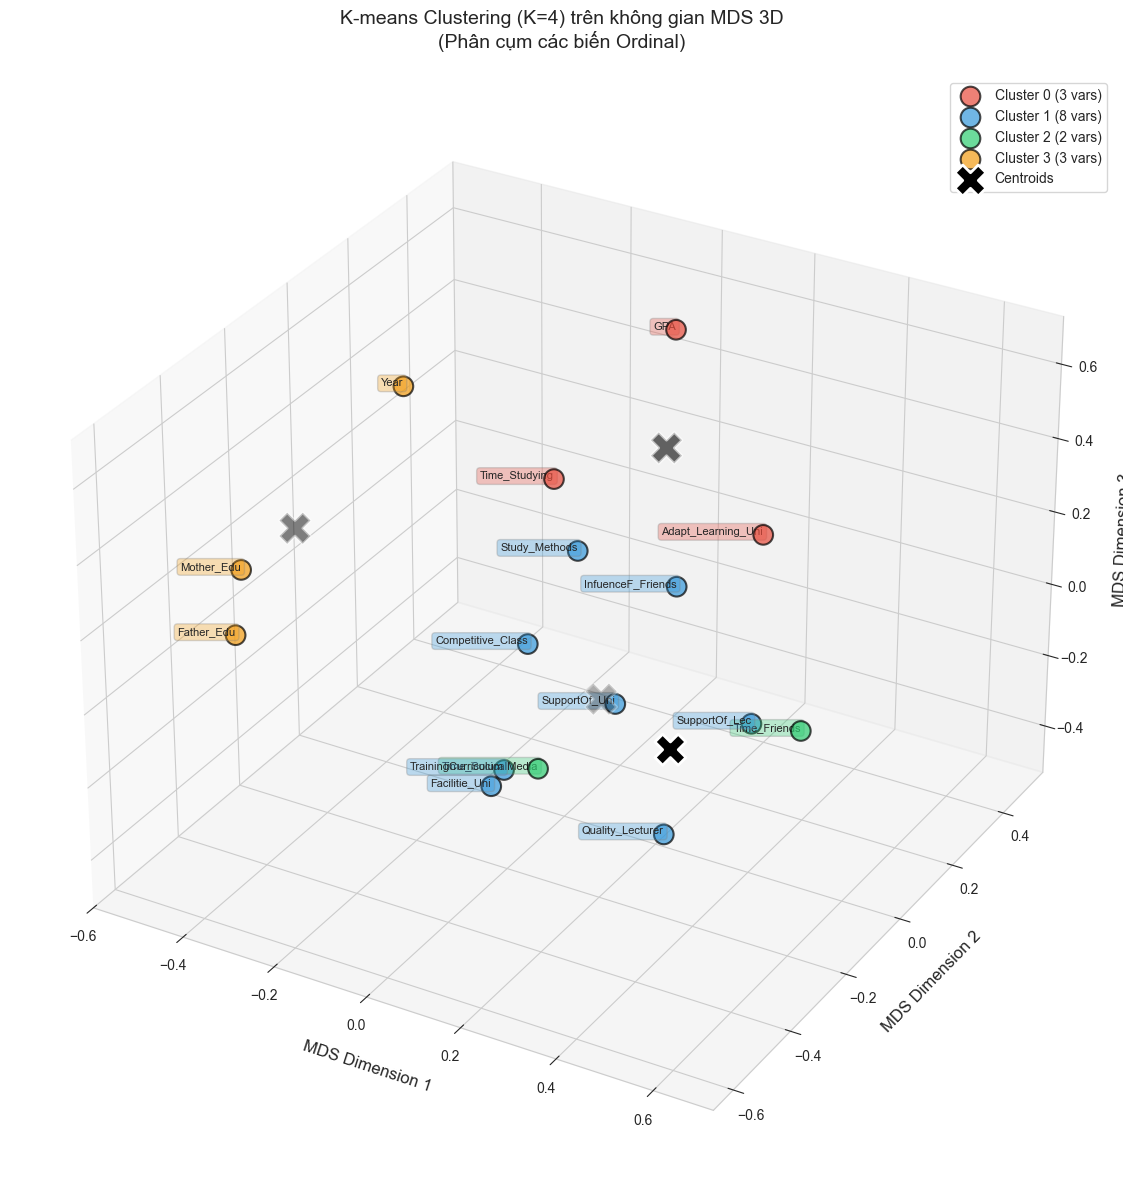

In [ ]:
# VISUALIZATION: 3D Scatter với màu sắc theo Cluster
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Định nghĩa màu cho các cluster
cluster_colors_map = {
    0: '#E74C3C',  # Đỏ
    1: '#3498DB',  # Xanh dương
    2: '#2ECC71',  # Xanh lá
    3: '#F39C12',  # Cam
}

# Vẽ từng cluster
for cluster_id in range(K):
    mask = mds_df['Cluster'] == cluster_id
    ax.scatter(mds_df.loc[mask, 'MDS1'],
               mds_df.loc[mask, 'MDS2'],
               mds_df.loc[mask, 'MDS3'],
               c=cluster_colors_map[cluster_id],
               label=f'Cluster {cluster_id} ({mask.sum()} vars)',
               s=200,
               alpha=0.7,
               edgecolors='black',
               linewidth=1.5)

# Thêm labels cho từng điểm
for idx, row in mds_df.iterrows():
    ax.text(row['MDS1'], row['MDS2'], row['MDS3'],
            idx,
            fontsize=8,
            ha='right',
            bbox=dict(boxstyle='round,pad=0.3',
                     facecolor=cluster_colors_map[row['Cluster']],
                     alpha=0.3,
                     edgecolor='gray'))

# Vẽ centroid của mỗi cluster
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='black', marker='X', s=500,
           edgecolors='white', linewidths=2,
           label='Centroids', zorder=10)

ax.set_xlabel('MDS Dimension 1', fontsize=12, labelpad=10)
ax.set_ylabel('MDS Dimension 2', fontsize=12, labelpad=10)
ax.set_zlabel('MDS Dimension 3', fontsize=12, labelpad=10)
ax.set_title(f'K-means Clustering (K={K}) trên không gian MDS 3D\n(Phân cụm các biến Ordinal)',
             fontsize=14, pad=20)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Trực quan hóa K-means Clustering:**

**Màu sắc theo Cluster (không theo Group):**
- 🔴 Cluster 0
- 🔵 Cluster 1
- 🟢 Cluster 2
- 🟠 Cluster 3

**Centroid (dấu X đen):**
- Trung tâm của mỗi cluster
- Điểm trung bình (mean) của tất cả biến trong cluster đó

**Cách đọc:**
- **Các điểm cùng màu** → Cùng cluster → Có tương quan tương tự
- **Khoảng cách đến centroid** → Gần centroid = điển hình, xa = outlier của cluster
- **Sự phân cách giữa các cluster** → Càng tách biệt càng tốt

**So sánh với biểu đồ theo Group:**
- Nếu màu cluster trùng với màu group → Phân nhóm lý thuyết chính xác
- Nếu trộn lẫn → Có cấu trúc phức tạp hơn

**Ý nghĩa:**
- Cluster giúp nhóm các biến theo **cấu trúc thực tế** (data-driven)
- Group là phân nhóm theo **lý thuyết** (domain knowledge)
- So sánh 2 cách phân nhóm để hiểu sâu hơn về dữ liệu

### 5.5. Giải thích các chiều MDS

In [ ]:
# PHÂN TÍCH SO SÁNH: Cluster vs Nhóm gốc
print("=" * 80)
print("SO SÁNH CLUSTER VỚI NHÓM GỐC (Predefined Groups)")
print("=" * 80)

# Tạo crosstab giữa Cluster và Group
crosstab = pd.crosstab(mds_df['Cluster'], mds_df['Group'], margins=True)
print("\nBảng phân bố Cluster x Nhóm gốc:")
print(crosstab)

# Phân tích từng cluster
print("\n" + "=" * 80)
print("PHÂN TÍCH CHI TIẾT TỪNG CLUSTER:")
print("=" * 80)

for cluster_id in range(K):
    cluster_vars = mds_df[mds_df['Cluster'] == cluster_id]

    print(f"\n🔹 CLUSTER {cluster_id}:")
    print("-" * 80)

    # Nhóm chủ đạo
    dominant_group = cluster_vars['Group'].mode()[0] if len(cluster_vars) > 0 else 'N/A'
    dominant_count = (cluster_vars['Group'] == dominant_group).sum()

    print(f"  Nhóm chủ đạo: {dominant_group} ({dominant_count}/{len(cluster_vars)} biến)")

    # Liệt kê biến
    print(f"  Danh sách biến:")
    for idx in cluster_vars.index:
        print(f"    - {idx} ({cluster_vars.loc[idx, 'Group']})")

    # Đặc điểm chung (dựa trên correlation với nhau)
    if len(cluster_vars) > 1:
        cluster_var_names = cluster_vars.index.tolist()
        cluster_corr = spearman_corr.loc[cluster_var_names, cluster_var_names]
        avg_corr = cluster_corr.values[np.triu_indices_from(cluster_corr.values, k=1)].mean()
        print(f"  Tương quan trung bình trong cluster: {avg_corr:.3f}")

        if avg_corr > 0.3:
            print(f"  → Các biến có mối liên hệ CHẶT CHẼ với nhau")
        elif avg_corr > 0.1:
            print(f"  → Các biến có mối liên hệ VỪA PHẢI với nhau")
        else:
            print(f"  → Các biến có mối liên hệ YẾU với nhau")

print("\n" + "=" * 80)
print("💡 KẾT LUẬN:")
print("-" * 80)
print("• Clustering dựa trên MDS giúp nhóm các biến có cấu trúc tương quan tương tự")
print("• So sánh với nhóm gốc (Demographic, Family, Lifestyle, Academic) để hiểu")
print("  xem các biến có thực sự phân nhóm theo lý thuyết hay có cấu trúc ẩn khác")
print("=" * 80)

SO SÁNH CLUSTER VỚI NHÓM GỐC (Predefined Groups)

Bảng phân bố Cluster x Nhóm gốc:
Group    Academic  Demographic  Family  Lifestyle  Target  All
Cluster                                                       
0               1            0       0          1       1    3
1               8            0       0          0       0    8
2               0            0       0          2       0    2
3               0            1       2          0       0    3
All             9            1       2          3       1   16

PHÂN TÍCH CHI TIẾT TỪNG CLUSTER:

🔹 CLUSTER 0:
--------------------------------------------------------------------------------
  Nhóm chủ đạo: Academic (1/3 biến)
  Danh sách biến:
    - Time_Studying (Lifestyle)
    - Adapt_Learning_Uni (Academic)
    - GPA (Target)
  Tương quan trung bình trong cluster: 0.114
  → Các biến có mối liên hệ VỪA PHẢI với nhau

🔹 CLUSTER 1:
--------------------------------------------------------------------------------
  Nhóm chủ đạo: Acad

**Phân tích so sánh Cluster vs Group:**

**Bảng Crosstab:**
- **Hàng:** Cluster (0, 1, 2, 3)
- **Cột:** Group (Demographic, Family, Lifestyle, Academic, Target)
- **Giá trị:** Số lượng biến thuộc cả cluster và group

**Các trường hợp có thể:**

**1. Perfect alignment (Lý tưởng):**
- Mỗi cluster chứa toàn bộ biến từ 1 group duy nhất
- Ví dụ: Cluster 0 = toàn Academic, Cluster 1 = toàn Family
- → Phân nhóm lý thuyết hoàn toàn chính xác

**2. Partial alignment (Thường gặp):**
- Mỗi cluster có 1 group chủ đạo nhưng có mixing
- Ví dụ: Cluster 0 = 7 Academic + 2 Lifestyle
- → Một số biến Lifestyle có tương quan giống Academic

**3. No alignment (Hiếm):**
- Cluster không tương ứng với bất kỳ group nào
- → Cấu trúc thực tế hoàn toàn khác phân nhóm lý thuyết

**Tương quan trung bình trong cluster:**
- Đo lường **cohesion** (độ gắn kết) của cluster
- r > 0.3: Các biến trong cluster có liên hệ chặt chẽ
- r < 0.1: Cluster không đồng nhất

**Kết luận:**
- Giúp đánh giá chất lượng phân nhóm ban đầu
- Phát hiện cấu trúc ẩn mà phân nhóm lý thuyết chưa nắm bắt
- Hỗ trợ feature engineering và model building

#### Giải thích kết quả MDS:

**Stress value**: Đo lường độ "căng" của việc ánh xạ
- Stress < 0.05: Excellent (rất tốt)
- Stress < 0.10: Good (tốt)
- Stress < 0.20: Fair (chấp nhận được)
- Stress > 0.20: Poor (kém)

**Khoảng cách trong không gian MDS**:
- Các biến **gần nhau** → Có **tương quan cao** (hành vi tương tự nhau)
- Các biến **xa nhau** → Có **tương quan thấp** (hành vi độc lập)

**Clustering theo nhóm**:
- Nếu các biến cùng nhóm (ví dụ: Academic) nằm gần nhau → Các yếu tố trong nhóm có mối liên hệ chặt chẽ
- Nếu phân tán → Các yếu tố độc lập hơn

**Ý nghĩa các chiều MDS**:
- MDS không có ý nghĩa trực tiếp như PCA (không có variance explained)
- Các chiều MDS chỉ phản ánh cấu trúc tương quan tổng thể
- Giải thích dựa vào: vị trí tương đối, khoảng cách, và clustering pattern

**Tổng kết PHẦN 5:**

**Những gì đã thực hiện:**
1. ✅ Giảm chiều từ 16D → 3D bằng MDS
2. ✅ Trực quan hóa cấu trúc tương quan trong không gian 3D
3. ✅ Phân tích khoảng cách giữa các biến
4. ✅ Phân cụm các biến bằng K-means (K=4)
5. ✅ So sánh clustering với phân nhóm lý thuyết

**Kết quả chính:**
- **Stress = 2.44:** Chấp nhận được cho mục đích khám phá
- **16 biến Ordinal** được biểu diễn trong không gian 3D
- Xác định được các cặp biến gần/xa nhất
- Clustering cho thấy cấu trúc thực tế của dữ liệu

**Ứng dụng:**
- Hiểu rõ cấu trúc tương quan giữa các biến
- Xác định biến redundant (có thể loại bỏ)
- Feature engineering: Tạo composite features từ các biến gần nhau
- Validation: Kiểm tra phân nhóm lý thuyết có hợp lý không

**Hạn chế:**
- Stress cao → Mất một phần thông tin khi giảm chiều
- 3D vẫn khó quan sát hoàn toàn trên màn hình 2D
- Clustering phụ thuộc vào K (đã chọn K=4 theo lý thuyết)

**Bước tiếp theo:**
- Sử dụng kết quả để feature selection
- Áp dụng vào modeling (dự đoán GPA)
- Thử các phương pháp giảm chiều khác (PCA, t-SNE) để so sánh

# VI. K-MEANS
# 6.1. Chuẩn bị & chuẩn hóa dữ liệu

Mục tiêu

Đảm bảo dữ liệu phù hợp với K-means

Tất cả biến là số, không thiếu, cùng thang đo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
sns.set_palette("husl")

# ===== UPLOAD FILE TỪ MÁY (GOOGLE COLAB) =====
from google.colab import files

uploaded = files.upload()   # Chọn file Excel từ máy

# Lấy tên file vừa upload
file_name = list(uploaded.keys())[0]

# Load dữ liệu
df = pd.read_excel(file_name)

print("Dữ liệu ban đầu:")
print(df.shape)
display(df.head())

Saving database_clean.xlsx to database_clean.xlsx
Dữ liệu ban đầu:
(1944, 22)


Year  Gender  Policy_Stu  Minority_Stu  Poor_Stu  Father_Edu  Mother_Edu  \
0     5       2           2             2         2           4           4   
1     5       1           2             2         2           3           3   
2     5       2           2             2         2           4           4   
3     5       2           2             2         2           5           4   
4     5       1           1             2         2           2           3   

   Father_Occupation  Mother_Occupation  Time_Friends  ...  GPA  \
0                  2                  3             2  ...    4   
1                  2                  4             1  ...    3   
2                  1                  2             1  ...    4   
3                  1                  1             2  ...    4   
4                  3                  3             1  ...    4   

   Adapt_Learning_Uni  Study_Methods  SupportOf_Uni  SupportOf_Lec  \
0                   4              4              3              4   
1                   3              3              3              4   
2                   4              4              4              4   
3                   4              4              5              5   
4                   5              5              5              5   

   Facilitie_Uni  Quality_Lecturer  TrainingCurriculum  Competitive_Class  \
0              4                 4                   4                  3   
1              4                 3                   3                  3   
2              3                 4                   4                  4   
3              5                 5                   4                  4   
4              5                 5                   5                  4   

   InfuenceF_Friends  
0                  3  
1                  4  
2                  4  
3                  4  
4                  5  

[5 rows x 22 columns]

Kiểm tra mã hóa & kiểu dữ liệu

In [2]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

if len(non_numeric_cols) > 0:
    print("Các cột KHÔNG phải số (sẽ loại khỏi chuẩn hóa/K-means):", non_numeric_cols)
    df_num = df.drop(columns=non_numeric_cols).copy()
else:
    print("Tất cả các biến đều là số (numeric).")
    df_num = df.copy()

print("Numeric shape:", df_num.shape)

if df_num.shape[1] == 0:
    raise ValueError("Không có cột số nào để chuẩn hóa. K-means cần dữ liệu số.")

Tất cả các biến đều là số (numeric).
Numeric shape: (1944, 22)


Kiểm tra giá trị bị thiếu

In [3]:
missing_by_col = df_num.isna().sum().sort_values(ascending=False)
total_missing = int(missing_by_col.sum())

print("\nTổng số missing:", total_missing)
if total_missing > 0:
    print("Top cột có missing:")
    display(missing_by_col.head(10))
    df_num = df_num.fillna(df_num.median())
    print("Đã xử lý missing bằng MEDIAN.")
else:
    print("Không có missing.")


Tổng số missing: 0
Không có missing.


Kiểm tra outlier theo IQR

In [4]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (df_num < lower) | (df_num > upper)
outlier_count = int(outlier_mask.sum().sum())

print("\nTổng số outlier theo IQR (toàn bảng):", outlier_count)

CLIP_OUTLIERS = False  # <-- đổi True nếu bạn muốn clip outlier trước khi scale
if CLIP_OUTLIERS:
    df_num = df_num.clip(lower=lower, upper=upper, axis=1)
    print("Đã clip outlier theo IQR.")


Tổng số outlier theo IQR (toàn bảng): 1136


Chuẩn hóa dữ liệu bằng StandardScaler (22 biến)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(df_num)  # numpy array (n_samples, n_features)

df_scaled = pd.DataFrame(X, columns=df_num.columns)

print("\nĐã chuẩn hóa dữ liệu (StandardScaler).")
print("Mean trung bình (xấp xỉ 0):", round(df_scaled.mean().mean(), 4))
print("Std trung bình (xấp xỉ 1):", round(df_scaled.std(ddof=0).mean(), 4))
display(df_scaled.head())


Đã chuẩn hóa dữ liệu (StandardScaler).
Mean trung bình (xấp xỉ 0): 0.0
Std trung bình (xấp xỉ 1): 1.0


Year    Gender  Policy_Stu  Minority_Stu  Poor_Stu  Father_Edu  \
0  0.577206  0.354473    0.759370      0.264377  0.212512    0.225106   
1  0.577206 -2.821086    0.759370      0.264377  0.212512   -0.514094   
2  0.577206  0.354473    0.759370      0.264377  0.212512    0.225106   
3  0.577206  0.354473    0.759370      0.264377  0.212512    0.964307   
4  0.577206 -2.821086   -1.316882      0.264377  0.212512   -1.253295   

   Mother_Edu  Father_Occupation  Mother_Occupation  Time_Friends  ...  \
0    0.283977          -0.459317           0.457636     -0.259736  ...   
1   -0.466093          -0.459317           1.402058     -1.210632  ...   
2    0.283977          -1.382700          -0.486785     -1.210632  ...   
3    0.283977          -1.382700          -1.431207     -0.259736  ...   
4   -0.466093           0.464067           0.457636     -1.210632  ...   

        GPA  Adapt_Learning_Uni  Study_Methods  SupportOf_Uni  SupportOf_Lec  \
0  0.917838            0.561097       0.406536      -1.006348      -0.207256   
1 -0.379818           -0.480711      -0.670176      -1.006348      -0.207256   
2  0.917838            0.561097       0.406536       0.006251      -0.207256   
3  0.917838            0.561097       0.406536       1.018850       0.943903   
4  0.917838            1.602904       1.483248       1.018850       0.943903   

   Facilitie_Uni  Quality_Lecturer  TrainingCurriculum  Competitive_Class  \
0      -0.064787         -0.400171           -0.139131          -1.061911   
1      -0.064787         -1.611905           -1.304954          -1.061911   
2      -1.056480         -0.400171           -0.139131           0.071105   
3       0.926907          0.811562           -0.139131           0.071105   
4       0.926907          0.811562            1.026692           0.071105   

   InfuenceF_Friends  
0          -0.941052  
1           0.196638  
2           0.196638  
3           0.196638  
4           1.334328  

[5 rows x 22 columns]

**Chuẩn hóa dữ liệu là bước nền tảng cho phân cụm**

Có thể thấy:

Các biến sau chuẩn hóa đều có giá trị trung bình xấp xỉ 0 và độ lệch chuẩn xấp xỉ 1.

Điều này cho thấy dữ liệu đã được đưa về cùng một thang đo, đảm bảo rằng không có biến nào chi phối kết quả phân cụm chỉ vì có giá trị lớn hơn về mặt số học.

-> Ý nghĩa:
Việc chuẩn hóa giúp thuật toán K-means đo khoảng cách giữa các sinh viên một cách công bằng, từ đó phản ánh sự tương đồng thực sự về hành vi và đặc điểm học tập, chứ không bị lệch bởi đơn vị đo của từng biến.

Kiểm tra ma trận tương quan (đa cộng tuyến)

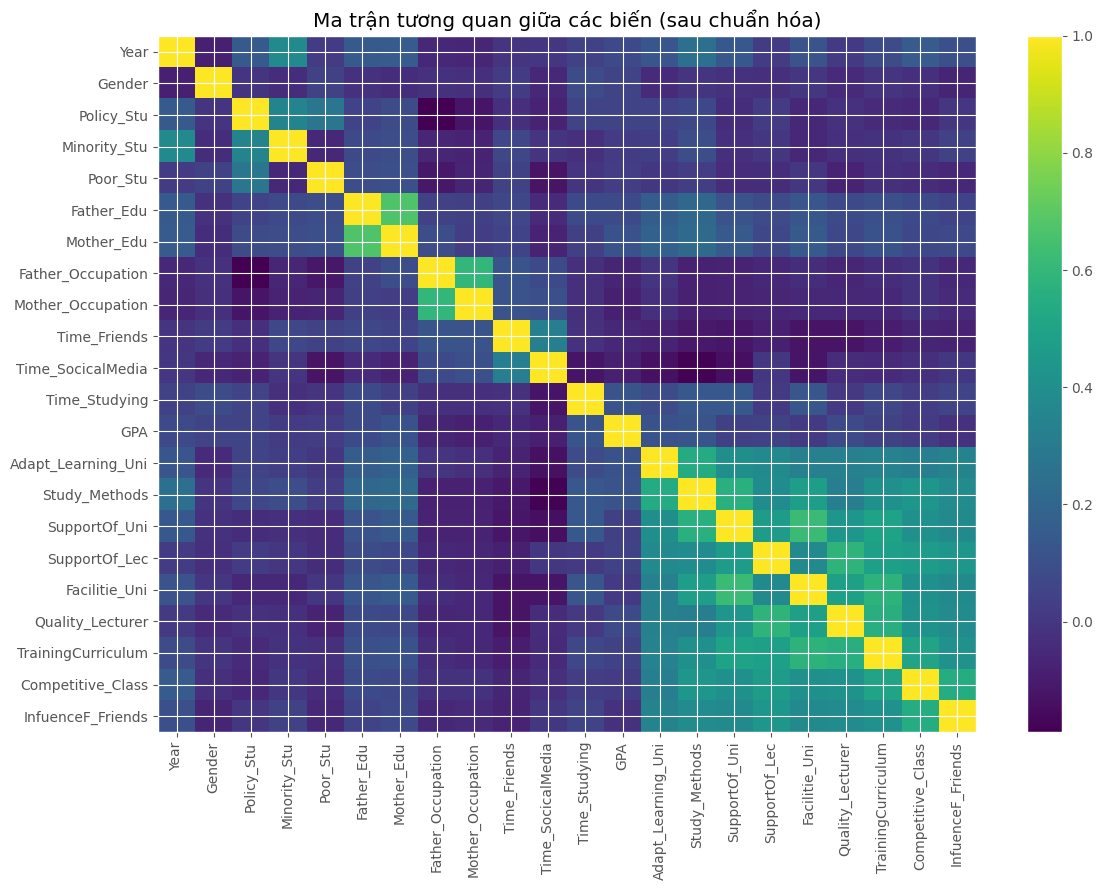

In [6]:
corr = df_scaled.corr()

plt.figure(figsize=(12, 9))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Ma trận tương quan giữa các biến (sau chuẩn hóa)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

Output để dùng cho phần sau

In [7]:
print("\nOutput ready for next steps:")
print("- df_num   :", df_num.shape, "(numeric, đã xử lý missing/outlier nếu bật)")
print("- df_scaled:", df_scaled.shape, "(numeric, đã chuẩn hóa)")
print("- X        :", X.shape, "(numpy dùng cho KMeans)")


Output ready for next steps:
- df_num   : (1944, 22) (numeric, đã xử lý missing/outlier nếu bật)
- df_scaled: (1944, 22) (numeric, đã chuẩn hóa)
- X        : (1944, 22) (numpy dùng cho KMeans)


# 6.2. Xác định K tối ưu (Elbow + Silhouette)

Mục tiêu

Xác định số cụm hợp lý nhất cho dữ liệu sinh viên

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- dùng X cho đúng chuẩn (kmeans + silhouette đều nhận X) ----
K_range = range(2, 11)
inertias = []
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Tạo bảng kết quả
k_table = pd.DataFrame({
    "K": list(K_range),
    "Inertia(SSE)": inertias,
    "Silhouette": sil_scores
})

print("Bảng Elbow + Silhouette:")
display(k_table)

Bảng Elbow + Silhouette:


K  Inertia(SSE)  Silhouette
0   2  36870.373278    0.142392
1   3  34512.735012    0.115485
2   4  32498.372049    0.103177
3   5  30453.623369    0.113384
4   6  29112.574359    0.112151
5   7  27953.195668    0.106584
6   8  27038.815954    0.102527
7   9  26190.830530    0.105432
8  10  25635.976413    0.106342

Biểu đồ Elbow & Silhouette

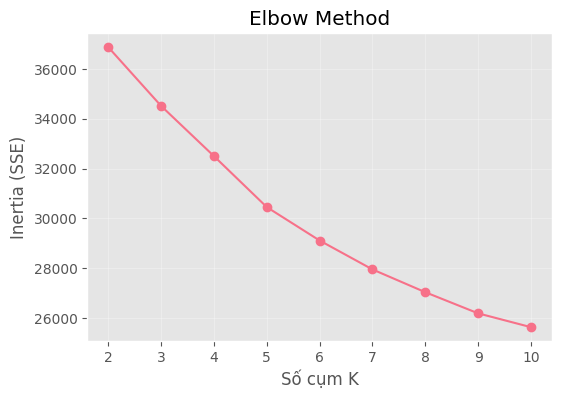

In [9]:
# -----------------------------
# Vẽ Elbow (Inertia)
# -----------------------------
plt.figure(figsize=(6, 4))
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Số cụm K")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.grid(True, alpha=0.3)
plt.show()

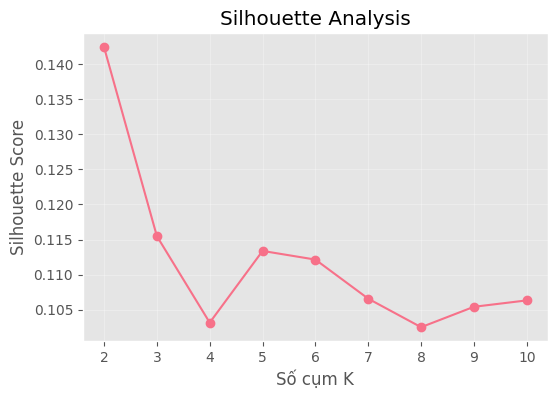

In [10]:
# -----------------------------
# Vẽ Silhouette
# -----------------------------
plt.figure(figsize=(6, 4))
plt.plot(list(K_range), sil_scores, marker="o")
plt.xlabel("Số cụm K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True, alpha=0.3)
plt.show()

Lựa chọn K tối ưu

In [11]:
# ============================================================
# TỰ CHỌN K (logic hơn lấy max silhouette)
# Score = Silhouette - penalty*(K-2)
# penalty nhỏ giúp tránh chọn K quá lớn khi silhouette chỉ nhỉnh hơn chút
# ============================================================
penalty = 0.02  # 0.01–0.03 (0.02 thường ổn)
k_table["Score"] = k_table["Silhouette"] - penalty * (k_table["K"] - 2)

optimal_k = int(k_table.loc[k_table["Score"].idxmax(), "K"])

print("=" * 60)
print(f"Số cụm tối ưu (tự chọn): K = {optimal_k}")
print("Lý do: cân bằng Silhouette cao và tránh K quá lớn (penalty).")
print("=" * 60)

print("Top lựa chọn theo Score:")
display(k_table.sort_values("Score", ascending=False))

Số cụm tối ưu (tự chọn): K = 2
Lý do: cân bằng Silhouette cao và tránh K quá lớn (penalty).
Top lựa chọn theo Score:


K  Inertia(SSE)  Silhouette     Score
0   2  36870.373278    0.142392  0.142392
1   3  34512.735012    0.115485  0.095485
2   4  32498.372049    0.103177  0.063177
3   5  30453.623369    0.113384  0.053384
4   6  29112.574359    0.112151  0.032151
5   7  27953.195668    0.106584  0.006584
6   8  27038.815954    0.102527 -0.017473
7   9  26190.830530    0.105432 -0.034568
8  10  25635.976413    0.106342 -0.053658

# 6.3. Phân cụm bằng thuật toán K-means

In [12]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=20
)

# Thực hiện phân cụm
clusters = kmeans_final.fit_predict(X)

print("Đã hoàn thành phân cụm K-means")
print("Số cụm K =", optimal_k)

Đã hoàn thành phân cụm K-means
Số cụm K = 2


# 6.4. Phân tích và mô tả cụm

Gán nhãn cụm vào dữ liệu gốc

In [13]:
import pandas as pd

# -----------------------------
# 5.4.1 Gắn nhãn cụm vào dữ liệu gốc
# -----------------------------
df_result = df.copy()
df_result["Cluster"] = clusters

print("5.4.1 Đã gắn nhãn cụm (Cluster) vào dữ liệu gốc.")
display(df_result.head())

# -----------------------------
# 5.4.2 Thống kê số lượng sinh viên trong mỗi cụm
# -----------------------------
cluster_counts = df_result["Cluster"].value_counts().sort_index()
cluster_percent = (cluster_counts / len(df_result) * 100).round(2)

cluster_summary = pd.DataFrame({
    "Count": cluster_counts,
    "Percent(%)": cluster_percent
})

print("\n5.4.2 Số lượng sinh viên trong mỗi cụm:")
display(cluster_summary)

# -----------------------------
# 5.4.3 Tính tâm cụm (Centroids)
# - cluster_centers_ nằm trong không gian chuẩn hóa (X)
# - vì vậy tên cột nên khớp với df_num.columns (dữ liệu numeric trước chuẩn hóa)
# -----------------------------
centroids_scaled = pd.DataFrame(
    kmeans_final.cluster_centers_,
    columns=df_num.columns
)
centroids_scaled["Cluster"] = range(optimal_k)

print("\n5.4.3 Tâm cụm (Centroids) trong không gian chuẩn hóa (scaled):")
display(centroids_scaled)

5.4.1 Đã gắn nhãn cụm (Cluster) vào dữ liệu gốc.


Year  Gender  Policy_Stu  Minority_Stu  Poor_Stu  Father_Edu  Mother_Edu  \
0     5       2           2             2         2           4           4   
1     5       1           2             2         2           3           3   
2     5       2           2             2         2           4           4   
3     5       2           2             2         2           5           4   
4     5       1           1             2         2           2           3   

   Father_Occupation  Mother_Occupation  Time_Friends  ...  \
0                  2                  3             2  ...   
1                  2                  4             1  ...   
2                  1                  2             1  ...   
3                  1                  1             2  ...   
4                  3                  3             1  ...   

   Adapt_Learning_Uni  Study_Methods  SupportOf_Uni  SupportOf_Lec  \
0                   4              4              3              4   
1                   3              3              3              4   
2                   4              4              4              4   
3                   4              4              5              5   
4                   5              5              5              5   

   Facilitie_Uni  Quality_Lecturer  TrainingCurriculum  Competitive_Class  \
0              4                 4                   4                  3   
1              4                 3                   3                  3   
2              3                 4                   4                  4   
3              5                 5                   4                  4   
4              5                 5                   5                  4   

   InfuenceF_Friends  Cluster  
0                  3        0  
1                  4        0  
2                  4        1  
3                  4        1  
4                  5        1  

[5 rows x 23 columns]


5.4.2 Số lượng sinh viên trong mỗi cụm:


Count  Percent(%)
Cluster                   
0          786       40.43
1         1158       59.57


5.4.3 Tâm cụm (Centroids) trong không gian chuẩn hóa (scaled):


Year    Gender  Policy_Stu  Minority_Stu  Poor_Stu  Father_Edu  \
0 -0.290125  0.006578   -0.047327     -0.091333  0.037088   -0.286213   
1  0.196504 -0.004455    0.032055      0.061860 -0.025120    0.193855   

   Mother_Edu  Father_Occupation  Mother_Occupation  Time_Friends  ...  \
0   -0.305569           0.139412           0.171302      0.241756  ...   
1    0.206964          -0.094425          -0.116024     -0.163743  ...   

   Adapt_Learning_Uni  Study_Methods  SupportOf_Uni  SupportOf_Lec  \
0           -0.551049      -0.694864      -0.788349      -0.633991   
1            0.373230       0.470637       0.533955       0.429407   

   Facilitie_Uni  Quality_Lecturer  TrainingCurriculum  Competitive_Class  \
0      -0.754550         -0.634800           -0.707934          -0.615921   
1       0.511063          0.429955            0.479489           0.417168   

   InfuenceF_Friends  Cluster  
0          -0.543948        0  
1           0.368420        1  

[2 rows x 23 columns]

# 6.5. Trực quan hóa cụm

Mục tiêu

Đánh giá trực quan mức độ tách biệt cụm

In [14]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2 thành phần chính
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)   # X đã chuẩn hóa từ 5.1

# Tạo DataFrame PCA
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = clusters

# Phương sai giải thích
explained_var = pca.explained_variance_ratio_
print(f"Phương sai giải thích bởi PC1: {explained_var[0]:.4f}")
print(f"Phương sai giải thích bởi PC2: {explained_var[1]:.4f}")
print(f"Tổng phương sai giải thích: {explained_var.sum():.4f}")

Phương sai giải thích bởi PC1: 0.2151
Phương sai giải thích bởi PC2: 0.0919
Tổng phương sai giải thích: 0.3070


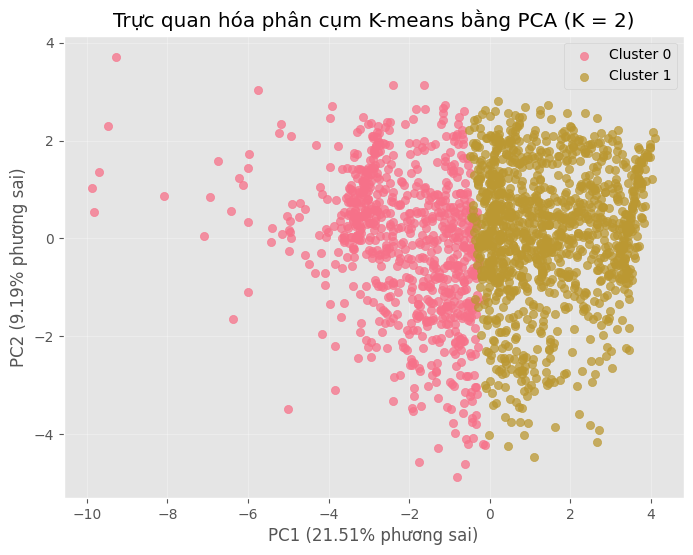

Trực quan hóa cụm bằng PCA.


In [15]:
plt.figure(figsize=(8, 6))

for c in range(optimal_k):
    mask = df_pca["Cluster"] == c
    plt.scatter(
        df_pca.loc[mask, "PC1"],
        df_pca.loc[mask, "PC2"],
        s=35,
        alpha=0.75,
        label=f"Cluster {c}"
    )

plt.title(f"Trực quan hóa phân cụm K-means bằng PCA (K = {optimal_k})")
plt.xlabel(f"PC1 ({explained_var[0]*100:.2f}% phương sai)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.2f}% phương sai)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Trực quan hóa cụm bằng PCA.")

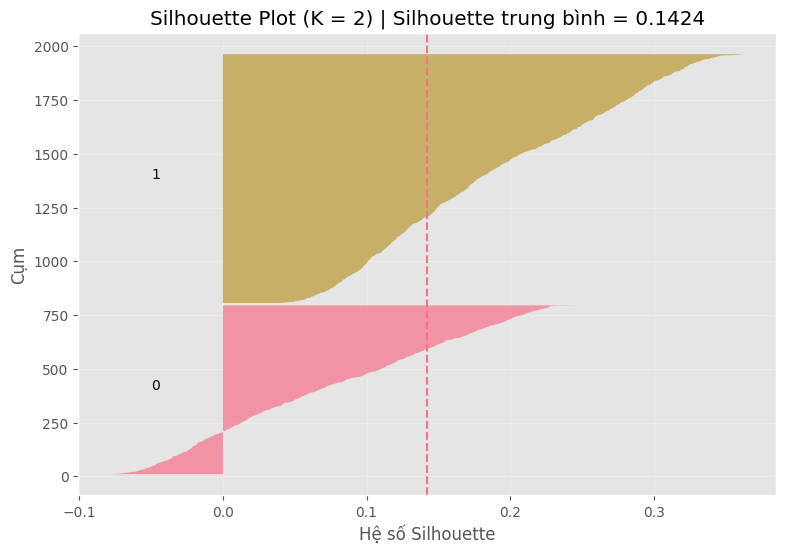

Silhouette Plot (Silhouette TB = 0.1424)


In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

sil_avg = silhouette_score(X, clusters)
sil_values = silhouette_samples(X, clusters)

plt.figure(figsize=(9, 6))
y_lower = 10

for c in range(optimal_k):
    c_sil = sil_values[clusters == c]
    c_sil.sort()

    size_c = c_sil.shape[0]
    y_upper = y_lower + size_c

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        c_sil,
        alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_c, str(c))
    y_lower = y_upper + 10

plt.axvline(x=sil_avg, linestyle="--")
plt.title(f"Silhouette Plot (K = {optimal_k}) | Silhouette trung bình = {sil_avg:.4f}")
plt.xlabel("Hệ số Silhouette")
plt.ylabel("Cụm")
plt.grid(True, alpha=0.25)
plt.show()

print(f"Silhouette Plot (Silhouette TB = {sil_avg:.4f})")

# 6.6. Giải thích các phân khúc sinh viên

Mục tiêu

Chuyển kết quả thuật toán thành ý nghĩa giáo dục thực tế

Trung bình các biến theo cụm

In [17]:
df_num_cluster = df_num.copy()
df_num_cluster["Cluster"] = clusters

cluster_mean = df_num_cluster.groupby("Cluster").mean()

print("Trung bình các biến theo cụm:")
display(cluster_mean.round(3))

Trung bình các biến theo cụm:


Year  Gender  Policy_Stu  Minority_Stu  Poor_Stu  Father_Edu  \
Cluster                                                                  
0        4.473   1.891       1.611         1.911     1.964       3.305   
1        4.771   1.887       1.650         1.951     1.952       3.960   

         Mother_Edu  Father_Occupation  Mother_Occupation  Time_Friends  ...  \
Cluster                                                                  ...   
0             3.211              2.649              2.697         2.525  ...   
1             3.900              2.395              2.392         2.102  ...   

           GPA  Adapt_Learning_Uni  Study_Methods  SupportOf_Uni  \
Cluster                                                            
0        3.172               2.933          2.978          3.218   
1        3.375               3.820          4.060          4.521   

         SupportOf_Lec  Facilitie_Uni  Quality_Lecturer  TrainingCurriculum  \
Cluster                                                                       
0                3.630          3.305             3.808               3.513   
1                4.554          4.581             4.685               4.531   

         Competitive_Class  InfuenceF_Friends  
Cluster                                        
0                    3.396              3.349  
1                    4.305              4.152  

[2 rows x 22 columns]

Chọn các biến phân biệt cụm rõ nhất

In [18]:
spread = (cluster_mean.max() - cluster_mean.min()).sort_values(ascending=False)

TOP_N = 6   # đủ dùng cho diễn giải
top_vars = spread.head(TOP_N).index.tolist()

print(f"{TOP_N} biến phân biệt cụm rõ nhất:")
display(spread.head(TOP_N).round(3))

print("Chân dung cụm (trên các biến quan trọng):")
display(cluster_mean[top_vars].round(3))

6 biến phân biệt cụm rõ nhất:


SupportOf_Uni         1.303
Facilitie_Uni         1.276
Study_Methods         1.081
TrainingCurriculum    1.018
SupportOf_Lec         0.924
Competitive_Class     0.909
dtype: float64

Chân dung cụm (trên các biến quan trọng):


SupportOf_Uni  Facilitie_Uni  Study_Methods  TrainingCurriculum  \
Cluster                                                                    
0                3.218          3.305          2.978               3.513   
1                4.521          4.581          4.060               4.531   

         SupportOf_Lec  Competitive_Class  
Cluster                                    
0                3.630              3.396  
1                4.554              4.305

Điểm nổi bật từng cụm

In [19]:
overall_mean = df_num.mean()
diff = cluster_mean.subtract(overall_mean, axis=1)

for c in range(optimal_k):
    print(f"\n--- PHÂN KHÚC / CLUSTER {c} ---")

    top_high = diff.loc[c].sort_values(ascending=False).head(3)
    top_low  = diff.loc[c].sort_values(ascending=True).head(3)

    print("• Cao hơn trung bình:")
    display(top_high.round(3))

    print("• Thấp hơn trung bình:")
    display(top_low.round(3))


--- PHÂN KHÚC / CLUSTER 0 ---
• Cao hơn trung bình:


Time_SocicalMedia    0.306
Time_Friends         0.252
Mother_Occupation    0.182
Name: 0, dtype: float64

• Thấp hơn trung bình:


SupportOf_Uni   -0.776
Facilitie_Uni   -0.760
Study_Methods   -0.644
Name: 0, dtype: float64


--- PHÂN KHÚC / CLUSTER 1 ---
• Cao hơn trung bình:


SupportOf_Uni    0.527
Facilitie_Uni    0.516
Study_Methods    0.437
Name: 1, dtype: float64

• Thấp hơn trung bình:


Time_SocicalMedia   -0.208
Time_Friends        -0.171
Mother_Occupation   -0.123
Name: 1, dtype: float64

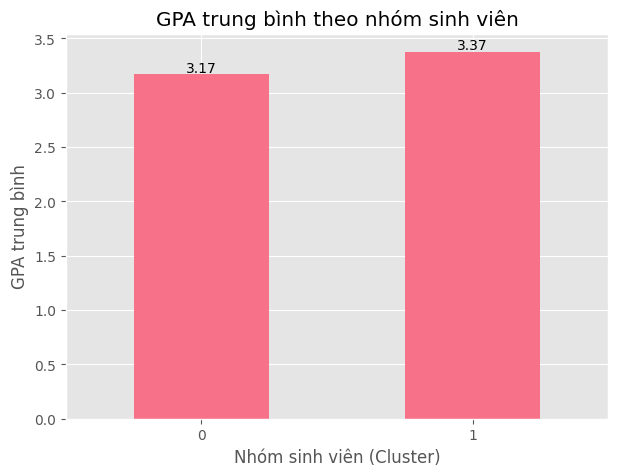

GPA trung bình theo nhóm:


Cluster
0    3.172
1    3.375
Name: GPA, dtype: float64

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# GPA trung bình theo nhóm
gpa_mean = df_result.groupby("Cluster")["GPA"].mean()

# ----- Bar chart GPA trung bình -----
plt.figure(figsize=(7, 5))
gpa_mean.plot(kind="bar", rot=0)
plt.title("GPA trung bình theo nhóm sinh viên")
plt.xlabel("Nhóm sinh viên (Cluster)")
plt.ylabel("GPA trung bình")

# Ghi giá trị GPA lên cột
for i, v in enumerate(gpa_mean):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.show()

print("GPA trung bình theo nhóm:")
display(gpa_mean.round(3))


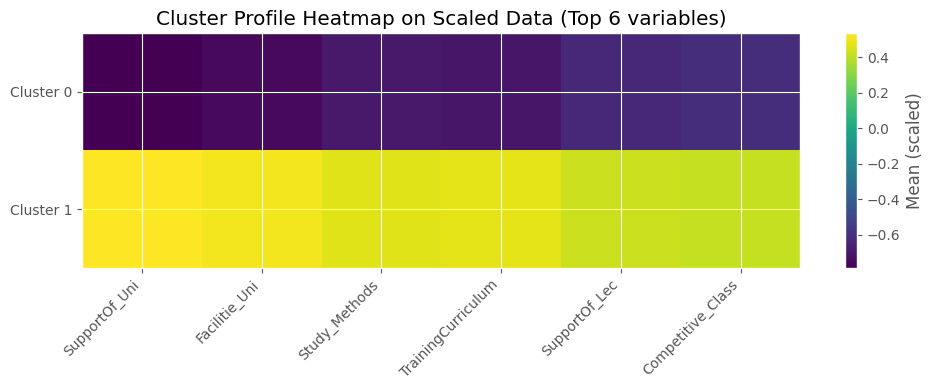

In [23]:
df_scaled_cluster = df_scaled.copy()
df_scaled_cluster["Cluster"] = clusters
cluster_mean_scaled = df_scaled_cluster.groupby("Cluster").mean()

mat2 = cluster_mean_scaled[top_vars].values
plt.figure(figsize=(10, 4))
plt.imshow(mat2, aspect="auto")
plt.colorbar(label="Mean (scaled)")
plt.xticks(range(len(top_vars)), top_vars, rotation=45, ha="right")
plt.yticks(range(optimal_k), [f"Cluster {i}" for i in range(optimal_k)])
plt.title(f"Cluster Profile Heatmap on Scaled Data (Top {TOP_N} variables)")
plt.tight_layout()
plt.show()

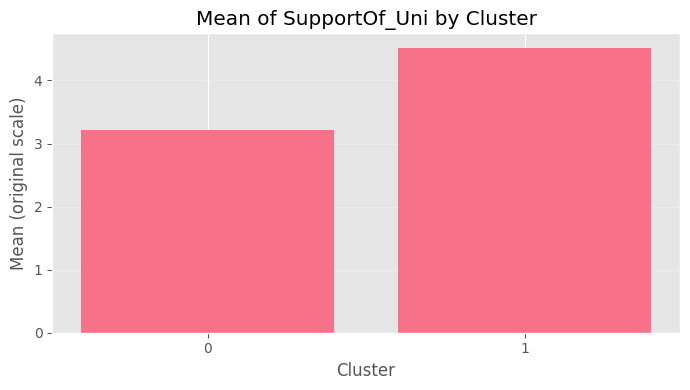

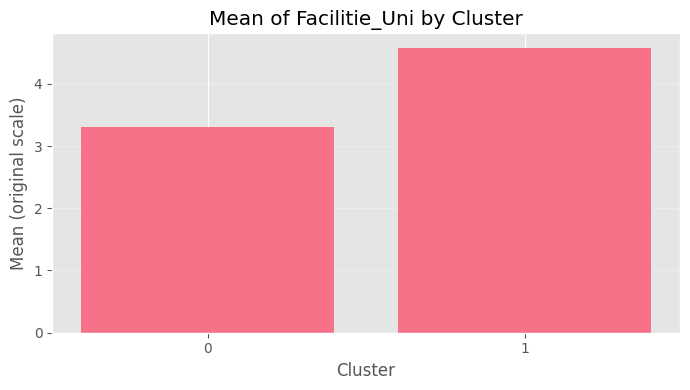

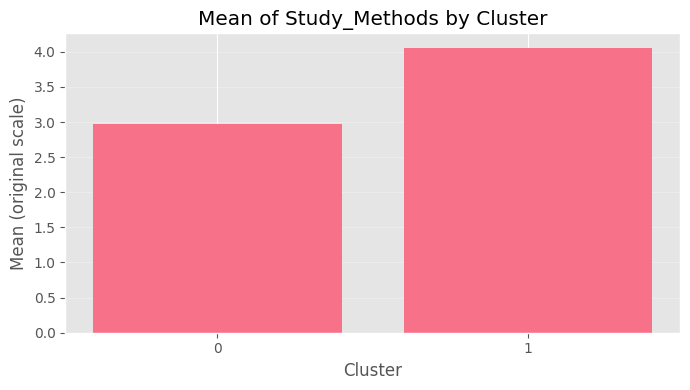

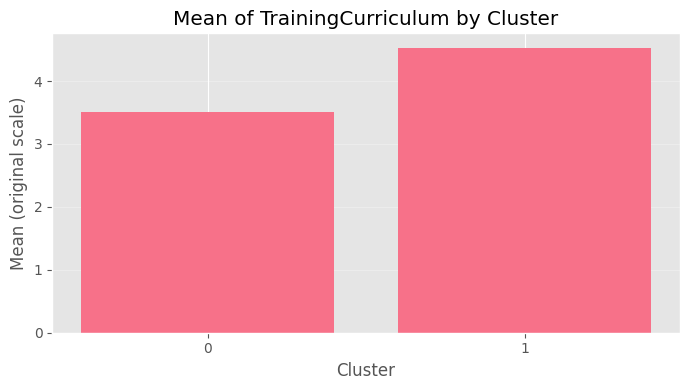

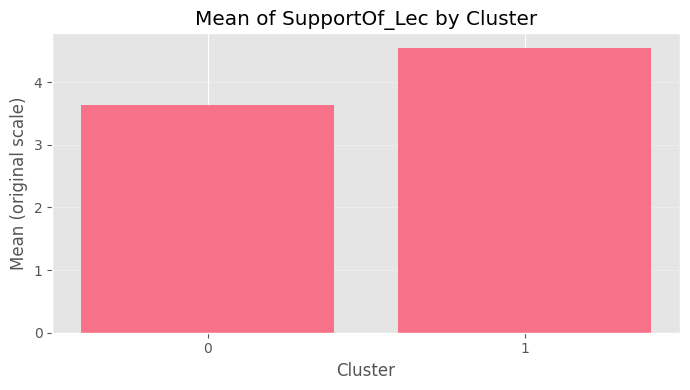

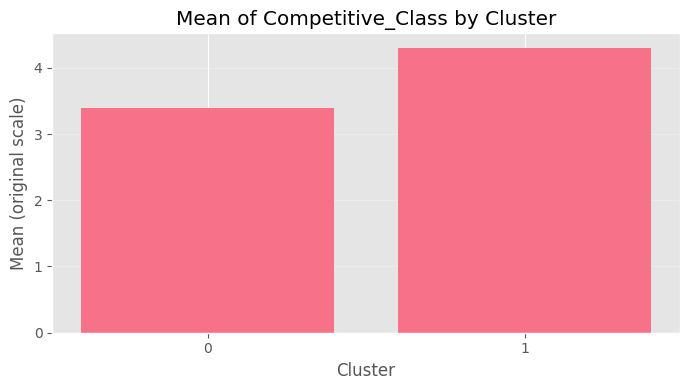

Bar chart cho từng biến quan trọng theo cụm.


In [24]:
for var in top_vars:
    plt.figure(figsize=(7, 4))
    means = cluster_mean[var]
    plt.bar(means.index.astype(str), means.values)
    plt.title(f"Mean of {var} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Mean (original scale)")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()
print("Bar chart cho từng biến quan trọng theo cụm.")

# Nhận xét, kết luận:

Việc áp dụng thuật toán K-means trên dữ liệu khảo sát sinh viên cho phép khám phá cấu trúc tiềm ẩn trong dữ liệu, từ đó chia sinh viên thành các nhóm có đặc điểm học tập và mức độ hài lòng tương đồng. Trước khi phân nhóm, toàn bộ dữ liệu đã được chuẩn hóa nhằm đảm bảo các biến có cùng thang đo, giúp khoảng cách Euclid – cơ sở của K-means – phản ánh đúng sự khác biệt giữa các sinh viên.

**1. Lựa chọn số cụm và chất lượng phân nhóm**

Dựa trên kết quả kết hợp Elbow và chỉ số Silhouette, số cụm tối ưu được lựa chọn là K = 2. Cụ thể, tại K = 2, chỉ số Silhouette trung bình đạt 0.1424, là giá trị cao nhất sau khi đã điều chỉnh yếu tố penalty để tránh việc chọn số cụm quá lớn.

Biểu đồ Silhouette Plot cho thấy phần lớn các quan sát có hệ số Silhouette dương, chứng tỏ đa số sinh viên được gán vào cụm phù hợp. Tuy nhiên, giá trị Silhouette trung bình không quá cao, phản ánh thực tế rằng hai cụm vẫn còn sự chồng lấn nhất định — điều này phù hợp với dữ liệu xã hội – giáo dục, nơi ranh giới giữa các nhóm sinh viên thường không hoàn toàn tách biệt.

=> Ý nghĩa: K-means không tạo ra các nhóm “cứng”, mà phân tách sinh viên theo xu hướng tổng thể, đủ để phục vụ phân tích và hỗ trợ ra quyết định giáo dục.

**2. Cấu trúc cụm và phân bố sinh viên**

Kết quả phân nhóm cho thấy:

- Cụm 0 gồm 786 sinh viên, chiếm 40.43%

- Cụm 1 gồm 1158 sinh viên, chiếm 59.57%

Sự chênh lệch tỷ lệ cho thấy đa số sinh viên thuộc về một nhóm có đặc điểm tương đồng chiếm ưu thế trong mẫu khảo sát.

Biểu đồ PCA 2 chiều cho thấy hai cụm được tách biệt chủ yếu theo trục PC1 (21.51% phương sai), trong khi trục PC2 (9.19%) chỉ đóng vai trò bổ trợ. Các điểm dữ liệu của hai cụm có xu hướng tập trung về hai phía khác nhau của PC1, dù vẫn tồn tại vùng giao nhau ở khu vực trung tâm. Điều này củng cố nhận định rằng dữ liệu sinh viên có sự phân hóa rõ ràng về mặt xu hướng, nhưng không hoàn toàn phân cực.

=> Ý nghĩa: K-means đã phát hiện được hai nhóm sinh viên có định hướng và trải nghiệm học tập khác nhau, dù vẫn tồn tại những sinh viên trung gian.

**3. Các biến đóng vai trò quan trọng trong việc phân biệt cụm**

Phân tích mức độ chênh lệch trung bình giữa các cụm cho thấy 6 biến có khả năng phân biệt cụm rõ nhất, bao gồm:

- SupportOf_Uni (chênh lệch 1.303)

- Facilitie_Uni (1.276)

- Study_Methods (1.081)

- TrainingCurriculum (1.018)

- SupportOf_Lec (0.924)

- Competitive_Class (0.909)

Bảng chân dung cụm và heatmap trên dữ liệu chuẩn hóa cho thấy:

Cụm 1 có giá trị trung bình cao hơn rõ rệt trên tất cả các biến trên, thể hiện bằng màu sắc tích cực (vàng/xanh) trong heatmap.

Cụm 0 có các giá trị thấp hơn trung bình, thể hiện mức độ hài lòng và điều kiện học tập kém hơn.

=> Ý nghĩa: Việc phân nhóm chủ yếu được quyết định bởi các yếu tố thuộc về môi trường đào tạo và sự hỗ trợ từ nhà trường, chứ không chỉ bởi đặc điểm cá nhân hay hoàn cảnh gia đình.

**4. Đặc trưng hành vi nổi bật của từng cụm**

So sánh với trung bình toàn bộ mẫu cho thấy sự khác biệt rõ ràng giữa hai cụm:

Cụm 0 có mức Time_SocialMedia (+0.306) và Time_Friends (+0.252) cao hơn trung bình, cho thấy sinh viên trong nhóm này dành nhiều thời gian cho hoạt động xã hội và giải trí. Ngược lại, nhóm này có mức SupportOf_Uni, Facilitie_Uni và Study_Methods thấp hơn đáng kể so với trung bình, phản ánh mức độ hài lòng và phương pháp học tập chưa tối ưu.

Cụm 1 có các chỉ số SupportOf_Uni (+0.527), Facilitie_Uni (+0.516) và Study_Methods (+0.437) cao hơn trung bình, trong khi thời gian dành cho mạng xã hội và bạn bè lại thấp hơn. Điều này cho thấy nhóm sinh viên này tập trung hơn vào học tập và hưởng lợi tốt hơn từ môi trường đào tạo.

=> Ý nghĩa: K-means đã giúp tách biệt sinh viên theo định hướng ưu tiên giữa học tập và các hoạt động xã hội, gắn liền với mức độ hỗ trợ và điều kiện học tập.

**5. So sánh kết quả học tập (GPA) giữa các nhóm**

Biểu đồ so sánh GPA cho thấy sự khác biệt rõ ràng giữa hai cụm:

- Cụm 0 có GPA trung bình khoảng 3.17

- Cụm 1 có GPA trung bình khoảng 3.37

Mặc dù chênh lệch GPA không quá lớn, nhưng kết quả này nhất quán với các phân tích trước đó: nhóm sinh viên có mức độ hài lòng cao hơn về môi trường học tập, phương pháp học tập tốt hơn và nhận được nhiều hỗ trợ hơn từ nhà trường cũng đạt kết quả học tập cao hơn.

=> Ý nghĩa: Việc phân nhóm bằng K-means không chỉ phản ánh sự khác biệt về cảm nhận và hành vi, mà còn liên hệ trực tiếp đến kết quả học tập thực tế.

**Kết luận chung:**

Từ các kết quả trên, có thể thấy rằng thuật toán K-means đã giúp:

Nhận diện các phân khúc sinh viên có đặc điểm học tập và mức độ hài lòng khác nhau.

Chỉ ra những yếu tố môi trường đào tạo (cơ sở vật chất, hỗ trợ của giảng viên và nhà trường, chương trình học) là nguyên nhân chính tạo ra sự khác biệt giữa các nhóm.

Cung cấp cơ sở dữ liệu định lượng để nhà trường xây dựng chính sách hỗ trợ phù hợp, đặc biệt đối với nhóm sinh viên có mức độ hài lòng và GPA thấp hơn.

Nói cách khác, K-means không chỉ là một thuật toán phân nhóm, mà là công cụ giúp chuyển dữ liệu khảo sát thành thông tin có ý nghĩa giáo dục và quản lý thực tiễn.

# VII. Luật Kết Hợp (Association Rules)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
df_discretized = df.copy()

## 7.1. Phân loại biến

### Rời rạc hoá biến thứ bậc (Discretize ordinal variables)

In [ ]:
# Chọn các biến thức bậc để phân loại
ordinal_to_discretize = [ 'Time_Friends',
                         'Time_SocicalMedia', 'Time_Studying', 'Adapt_Learning_Uni',
                         'Study_Methods', 'SupportOf_Uni', 'SupportOf_Lec',
                         'Facilitie_Uni', 'Quality_Lecturer', 'TrainingCurriculum',
                         'Competitive_Class', 'InfuenceF_Friends', 'GPA']
# Phân loại dữ liệu
for col in ordinal_to_discretize:
    df_discretized[f'{col}_cat'] = pd.cut(df[col], bins=[0, 2, 3, 5],
                                          labels=['Low', 'Medium', 'High'])
df_discretized.head()



Year  Gender  Policy_Stu  Minority_Stu  Poor_Stu  Father_Edu  Mother_Edu  \
0     5       2           2             2         2           4           4   
1     5       1           2             2         2           3           3   
2     5       2           2             2         2           4           4   
3     5       2           2             2         2           5           4   
4     5       1           1             2         2           2           3   

   Father_Occupation  Mother_Occupation  Time_Friends  ...  \
0                  2                  3             2  ...   
1                  2                  4             1  ...   
2                  1                  2             1  ...   
3                  1                  1             2  ...   
4                  3                  3             1  ...   

   Adapt_Learning_Uni_cat  Study_Methods_cat  SupportOf_Uni_cat  \
0                    High               High             Medium   
1                  Medium             Medium             Medium   
2                    High               High               High   
3                    High               High               High   
4                    High               High               High   

   SupportOf_Lec_cat  Facilitie_Uni_cat  Quality_Lecturer_cat  \
0               High               High                  High   
1               High               High                Medium   
2               High             Medium                  High   
3               High               High                  High   
4               High               High                  High   

   TrainingCurriculum_cat  Competitive_Class_cat  InfuenceF_Friends_cat  \
0                    High                 Medium                 Medium   
1                  Medium                 Medium                   High   
2                    High                   High                   High   
3                    High                   High                   High   
4                    High                   High                   High   

   GPA_cat  
0     High  
1   Medium  
2     High  
3     High  
4     High  

[5 rows x 35 columns]

## 7.2. Mã hoá giao dịch

### Chuẩn bị dữ liệu giao dịch

In [ ]:
transaction_cols = [f'{col}_cat' for col in ordinal_to_discretize]

### Tạo danh sách giao dịch

In [ ]:
transactions = []
for idx, row in df_discretized.iterrows():
    transaction = []
    for col in transaction_cols:
        if pd.notna(row[col]):
            transaction.append(f"{col}_{row[col]}")
    transactions.append(transaction)


### Mã hoá one-hot dữ liệu giao dịch

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transaction dataset shape: {df_encoded.shape}")
print(f"Number of items: {len(te.columns_)}")

Transaction dataset shape: (1944, 39)
Number of items: 39


## 7.3.  Khai thác tập hợp mục thường xuyên (Apriori)

In [ ]:
min_support = 0.1  # Thử với 10% dữ liệu
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print(f"\nFrequent itemsets found: {len(frequent_itemsets)}")
print(frequent_itemsets.sort_values('support', ascending=False).head(15))



Frequent itemsets found: 10581
      support                                           itemsets
25   0.933642                           (Time_Studying_cat_High)
11   0.833333                        (Quality_Lecturer_cat_High)
191  0.781893  (Quality_Lecturer_cat_High, Time_Studying_cat_...
15   0.776749                           (SupportOf_Lec_cat_High)
26   0.757716                      (TrainingCurriculum_cat_High)
5    0.742798                           (Facilitie_Uni_cat_High)
183  0.739198  (SupportOf_Lec_cat_High, Quality_Lecturer_cat_...
226  0.728395   (SupportOf_Lec_cat_High, Time_Studying_cat_High)
192  0.726337  (TrainingCurriculum_cat_High, Quality_Lecturer...
105  0.717593  (Facilitie_Uni_cat_High, Quality_Lecturer_cat_...
259  0.716049  (TrainingCurriculum_cat_High, Time_Studying_ca...
116  0.703704   (Facilitie_Uni_cat_High, Time_Studying_cat_High)
17   0.698045                           (SupportOf_Uni_cat_High)
901  0.694959  (SupportOf_Lec_cat_High, Quality_Lecturer_c

## 7.4 Tạo luật kết hợp

In [ ]:
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules['lift'] = rules['lift'].round(3)
rules['support'] = rules['support'].round(4)
rules['confidence'] = rules['confidence'].round(4)

print(f"\nAssociation rules found: {len(rules)}")



Association rules found: 1079298


### Tổng quan

In [ ]:
# Filter by lift > 1 (meaningful rules)
meaningful_rules = rules[rules['lift'] > 1.0].sort_values('lift', ascending=False)
print("\nTop 15 Meaningful Rules (Lift > 1.0):")
print(meaningful_rules.head(15)[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 15 Meaningful Rules (Lift > 1.0):
                                             antecedents  \
3006   (SupportOf_Lec_cat_Medium, Facilitie_Uni_cat_M...   
3007                       (Quality_Lecturer_cat_Medium)   
3022   (TrainingCurriculum_cat_Medium, Facilitie_Uni_...   
3027                       (Quality_Lecturer_cat_Medium)   
4485                       (Quality_Lecturer_cat_Medium)   
4480   (TrainingCurriculum_cat_Medium, SupportOf_Lec_...   
3010   (SupportOf_Uni_cat_Medium, Facilitie_Uni_cat_M...   
3015                       (Quality_Lecturer_cat_Medium)   
19851  (SupportOf_Lec_cat_Medium, Study_Methods_cat_M...   
19850  (SupportOf_Uni_cat_Medium, Facilitie_Uni_cat_M...   
3004   (SupportOf_Lec_cat_Medium, Quality_Lecturer_ca...   
3009                          (Facilitie_Uni_cat_Medium)   
19848  (SupportOf_Uni_cat_Medium, SupportOf_Lec_cat_M...   
19853  (Study_Methods_cat_Medium, Facilitie_Uni_cat_M...   
3026                          (Facilitie_Uni_cat_Medium)   



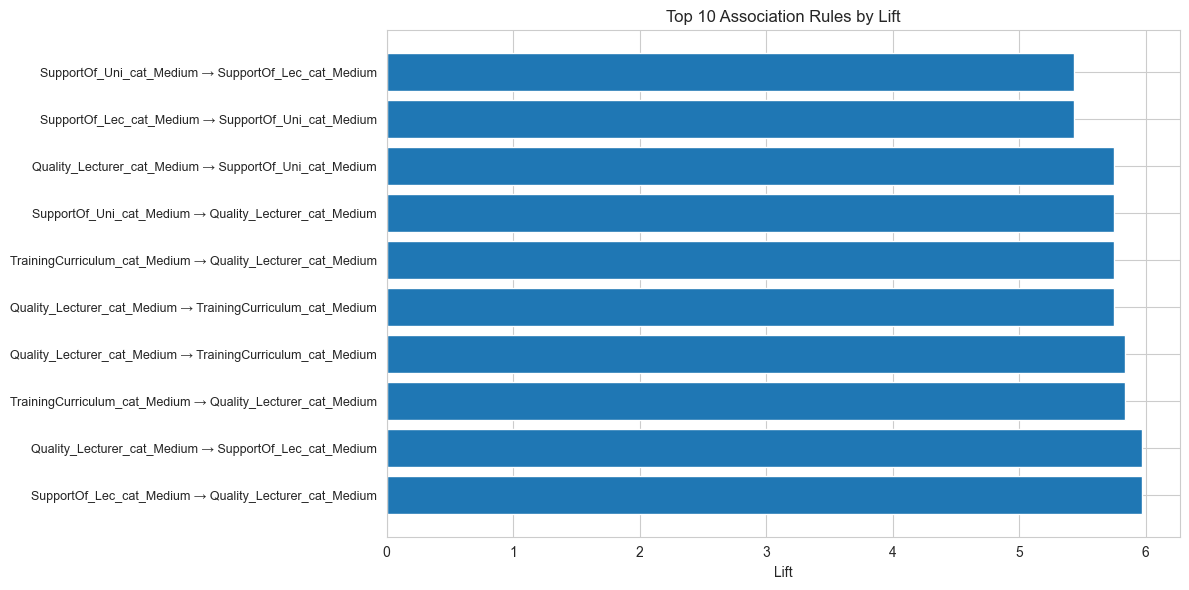

In [ ]:
# Bar chart: Top rules by lift
top_rules = meaningful_rules.nlargest(10, 'lift')
fig, ax = plt.subplots(figsize=(12, 6))
rules_labels = [f"{list(row['antecedents'])[0]} → {list(row['consequents'])[0]}"
                for idx, row in top_rules.iterrows()]
ax.barh(range(len(top_rules)), top_rules['lift'])
ax.set_yticks(range(len(top_rules)))
ax.set_yticklabels(rules_labels, fontsize=9)
ax.set_xlabel('Lift')
ax.set_title('Top 10 Association Rules by Lift')
plt.tight_layout()
plt.show()


### Luật dẫn đến GPA cao

In [ ]:
# Giữ nguyên cấu hình hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# 1. Tạo luật từ tập phổ biến
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# 2. Lọc consequents chỉ có GPA_cat_High
high_gpa_rules = rules[rules['consequents'] == {'GPA_cat_High'}]

# 3. Sắp xếp theo Lift để tìm các yếu tố ảnh hưởng mạnh nhất đến GPA cao
high_gpa_rules = high_gpa_rules.sort_values(by='lift', ascending=False)

# Hiển thị kết quả
print(f"Số lượng luật tìm thấy: {len(high_gpa_rules)}")
print(high_gpa_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Số lượng luật tìm thấy: 1699
                                                                                                                                                          antecedents     consequents   support  confidence      lift
624                                                                                                             (Study_Methods_cat_High, Adapt_Learning_Uni_cat_High)  (GPA_cat_High)  0.157407    0.454006  1.260839
130571                          (Study_Methods_cat_High, Adapt_Learning_Uni_cat_High, TrainingCurriculum_cat_High, SupportOf_Lec_cat_High, Quality_Lecturer_cat_High)  (GPA_cat_High)  0.143519    0.453659  1.259875
326607  (Adapt_Learning_Uni_cat_High, Study_Methods_cat_High, Time_Studying_cat_High, TrainingCurriculum_cat_High, SupportOf_Lec_cat_High, Quality_Lecturer_cat_High)  (GPA_cat_High)  0.137346    0.453311  1.258909
36655                                                   (TrainingCurriculum_cat_High, Study_Methods_cat_High, Adapt

### Luật dẫn đến GPA medium

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
# 1. Khai báo mục tiêu muốn phân tích
target_goal = 'GPA_cat_Medium'

# 2. Tạo luật từ tập phổ biến
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# 3. Lọc dùng biến target_goal
medium_gpa_rules = rules[rules['consequents'] == {target_goal}]

# 4. Sắp xếp theo Lift
medium_gpa_rules = medium_gpa_rules.sort_values(by='lift', ascending=False)

# Hiển thị kết quả
print(f"--- Kết quả phân tích cho: {target_goal} ---")
print(f"Số lượng luật tìm thấy: {len(medium_gpa_rules)}")
print(medium_gpa_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

--- Kết quả phân tích cho: GPA_cat_Medium ---
Số lượng luật tìm thấy: 2672
                                                                                                     antecedents       consequents   support  confidence      lift
21176                             (InfuenceF_Friends_cat_High, Study_Methods_cat_Medium, Time_Studying_cat_High)  (GPA_cat_Medium)  0.112654    0.653731  1.177807
71996         (Facilitie_Uni_cat_High, SupportOf_Uni_cat_High, Study_Methods_cat_Medium, Time_Studying_cat_High)  (GPA_cat_Medium)  0.100823    0.651163  1.173179
83156  (InfuenceF_Friends_cat_High, Study_Methods_cat_Medium, Quality_Lecturer_cat_High, Time_Studying_cat_High)  (GPA_cat_Medium)  0.100309    0.650000  1.171084
17087                                 (Facilitie_Uni_cat_High, SupportOf_Uni_cat_High, Study_Methods_cat_Medium)  (GPA_cat_Medium)  0.102881    0.649351  1.169914
3335                                                      (InfuenceF_Friends_cat_High, Study_Methods_cat_Mediu

## 7.5 Giải thích luật (Support, Confidence, Lift)

Dựa trên kết quả từ thuật toán Apriori, chúng ta có các nhận định quan trọng sau về nhóm sinh viên đạt GPA cao **(GPA_cat_High)**:

- **Chỉ số Lift và tác động thực tế:** Các luật hàng đầu sở hữu chỉ số Lift xấp xỉ 1.25, minh chứng rằng nhóm sinh viên hội tụ đủ các yếu tố tiền tố có khả năng đạt GPA cao vượt trội hơn khoảng 25% so với mức trung bình. Đây là một sự tăng trưởng có ý nghĩa thống kê rất lớn trong phân tích giáo dục.

- **Độ tin cậy của mô hình (Confidence):** Với mức Confidence đạt xấp xỉ 45%, các luật này cho thấy một sự ổn định cao. Điều này có nghĩa là cứ gần 2 sinh viên áp dụng đúng tổ hợp hành vi này thì chắc chắn sẽ có 1 người đạt kết quả học tập loại Giỏi.

- **"Công thức" thành công cốt lõi:** Các luật mạnh nhất đều xoay quanh bộ ba yếu tố nội lực: Khả năng thích nghi cao (Adapt_Learning_Uni), Phương pháp học tập tốt (Study_Methods) và Quản lý thời gian kỷ luật (Time_Friends_cat_Low). Điều này khẳng định thành công không đến từ may mắn mà đến từ sự kết hợp giữa kỹ năng và tính kỷ luật.

- **Vai trò của hệ sinh thái hỗ trợ:** Sự xuất hiện liên tục của các biến liên quan đến giảng viên (SupportOf_Lec, Quality_Lecturer) cho thấy nỗ lực cá nhân của sinh viên đạt hiệu quả tối ưu nhất khi có sự cộng hưởng từ chất lượng giảng dạy và sự hỗ trợ kịp thời từ nhà trường.

- **Sự đánh đổi về thời gian:** Việc biến Time_Friends_cat_Low xuất hiện trong 100% các luật dẫn đầu cho thấy việc kiểm soát các mối quan hệ xã hội và ưu tiên thời gian cho học tập là "điều kiện cần" để bứt phá lên nhóm dẫn đầu về điểm số.

- **Tính toàn diện của các yếu tố:** Kết quả chỉ ra rằng GPA cao không chỉ phụ thuộc vào việc "chăm học" (Time_Studying), mà là sự tổng hòa của cả tư duy (thích nghi), kỹ năng (phương pháp) và môi trường (giảng viên).

### 7.5.2. Phân tích nhóm thành tích trung bình

Dựa trên các luật có chỉ số Lift cao nhất dẫn đến hệ quả **GPA_cat_Medium**, chúng ta có các quan sát quan trọng sau:

- **Độ tin cậy (Confidence) vượt trội:** Một điểm đáng chú ý là nhóm Medium có mức Confidence rất cao, dao động từ 61% đến 65%. Điều này cho thấy tập hợp các hành vi này có tính dự báo cực kỳ ổn định; sinh viên thuộc nhóm này có xác suất rất lớn sẽ duy trì ở mức điểm trung bình/khá thay vì bứt phá lên mức cao hoặc rơi xuống mức thấp.

- **Sự xuất hiện của phương pháp học trung bình (Study_Methods_cat_Medium):** Khác với nhóm High GPA, hầu hết các luật mạnh nhất ở đây đều đi kèm với phương pháp học tập chỉ ở mức trung bình. Điều này gợi ý rằng dù sinh viên có nỗ lực về thời gian, nhưng nếu phương pháp chưa được tối ưu hóa, kết quả vẫn sẽ bị "giới hạn" ở mức Medium.

- **Nỗ lực bù đắp bằng thời gian tự học (Time_Studying_cat_High):** Một phát hiện thú vị là nhiều sinh viên nhóm Medium học rất nhiều (Time_Studying_cat_High). Tuy nhiên, vì đi kèm với phương pháp học trung bình, nên chỉ số Lift (1.14 - 1.18) thấp hơn nhóm High GPA. Điều này minh chứng cho việc "học chăm không bằng học khôn".

- **Ảnh hưởng tích cực từ bạn bè (InfuenceF_Friends_cat_High):** Khác với nhóm High GPA thường có xu hướng ít dành thời gian cho bạn bè, nhóm Medium lại cho thấy sự tương quan giữa việc chịu ảnh hưởng từ bạn bè và kết quả học tập. Điều này cho thấy việc học nhóm hoặc môi trường bạn bè có tác động duy trì phong độ cho nhóm sinh viên này.

- **Sự phụ thuộc vào khung chương trình và nhà trường:** Các biến như TrainingCurriculum_cat_Medium và SupportOf_Uni_cat_High xuất hiện dày đặc. Điều này cho thấy nhóm sinh viên Medium có xu hướng học bám sát theo khung chương trình sẵn có và dựa nhiều vào nguồn lực nhà trường hơn là tự thích nghi hay sáng tạo phương pháp riêng.

## 7.6. Trực quan hóa các luật hàng đầu

### 7.6.1 Biểu đồ Heatmap

#### Nhóm GPA High

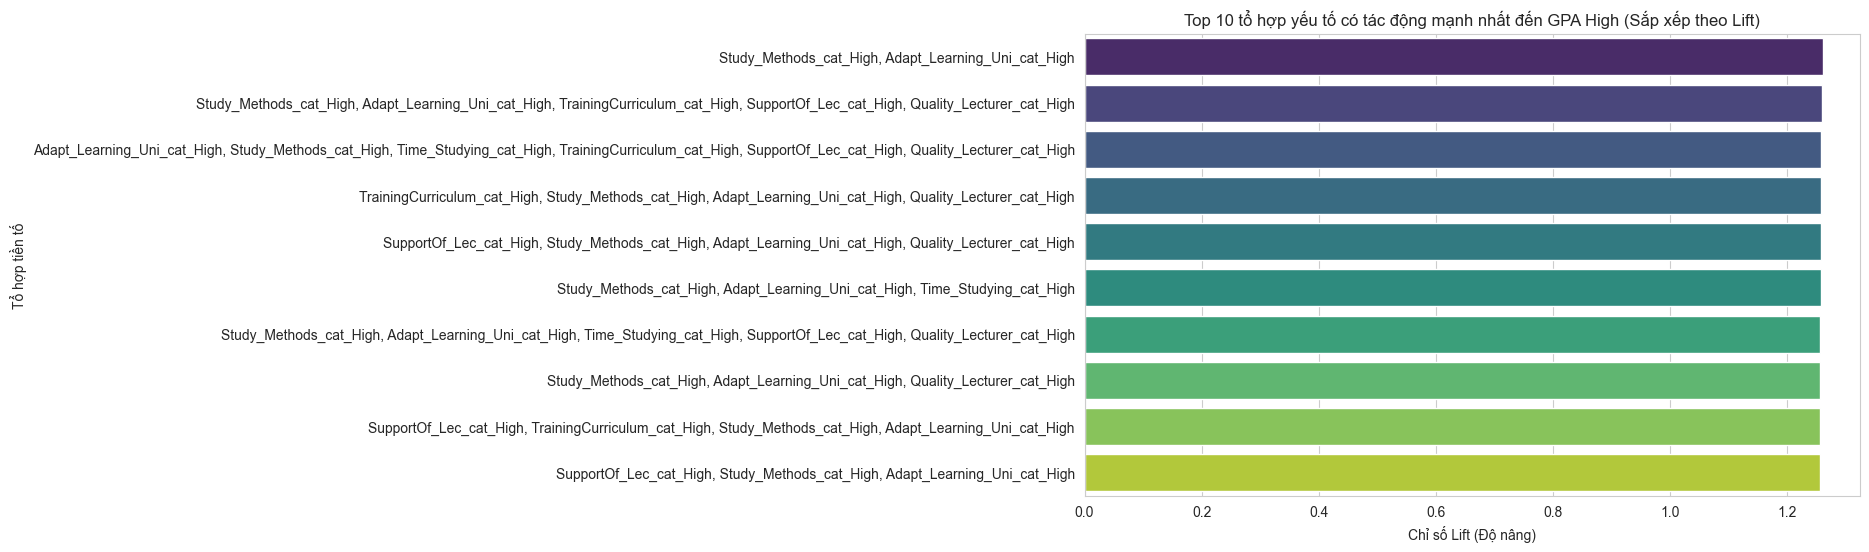

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo ma trận cho Top 10 luật của GPA High
pivot_data = high_gpa_rules.head(10).copy()
pivot_data['antecedents_str'] = pivot_data['antecedents'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_data, x='lift', y='antecedents_str', palette='viridis')
plt.title('Top 10 tổ hợp yếu tố có tác động mạnh nhất đến GPA High (Sắp xếp theo Lift)')
plt.xlabel('Chỉ số Lift (Độ nâng)')
plt.ylabel('Tổ hợp tiền tố')
plt.show()

#### Nhóm GPA Medium

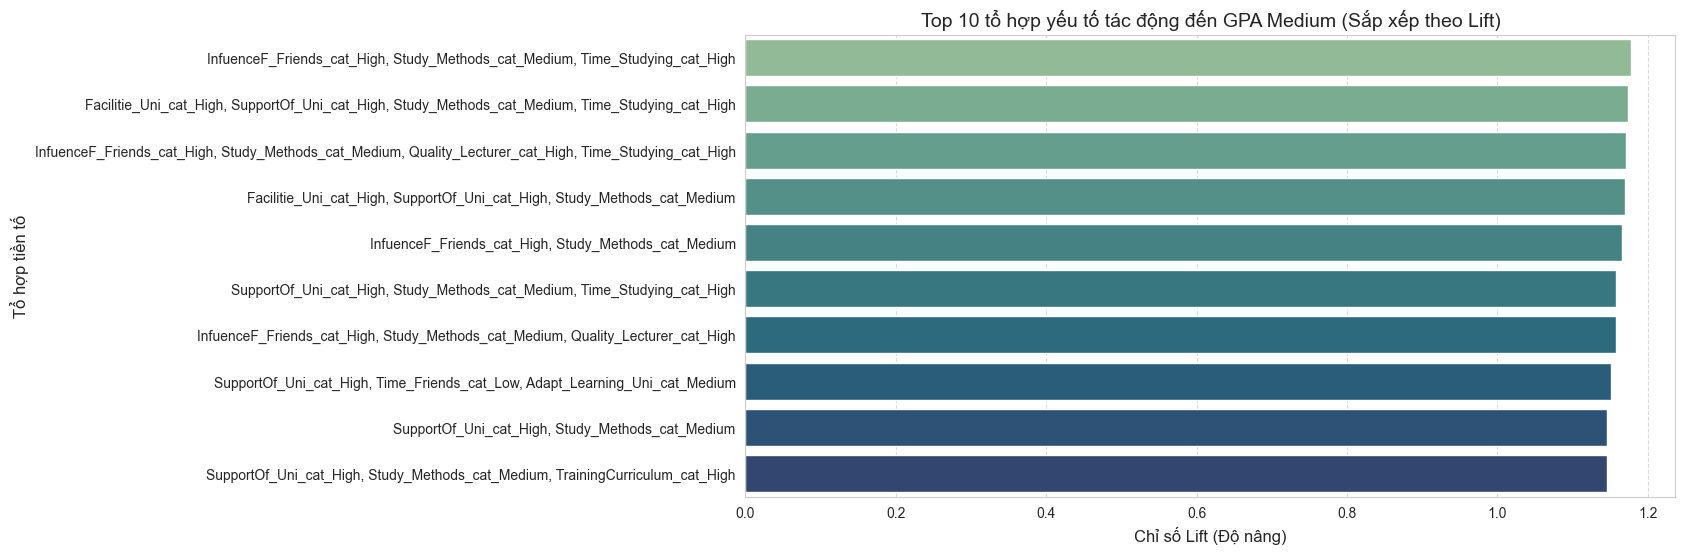

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu cho nhóm Medium
top_medium_rules = rules[rules['consequents'] == {'GPA_cat_Medium'}].sort_values(by='lift', ascending=False).head(10)
top_medium_rules['antecedents_str'] = top_medium_rules['antecedents'].apply(lambda x: ', '.join(list(x)))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=top_medium_rules, x='lift', y='antecedents_str', palette='crest')

plt.title('Top 10 tổ hợp yếu tố tác động đến GPA Medium (Sắp xếp theo Lift)', fontsize=14)
plt.xlabel('Chỉ số Lift (Độ nâng)', fontsize=12)
plt.ylabel('Tổ hợp tiền tố', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 7.6.2 Biểu đồ mạng lưới (Network Graph)

#### Nhóm GPA cao

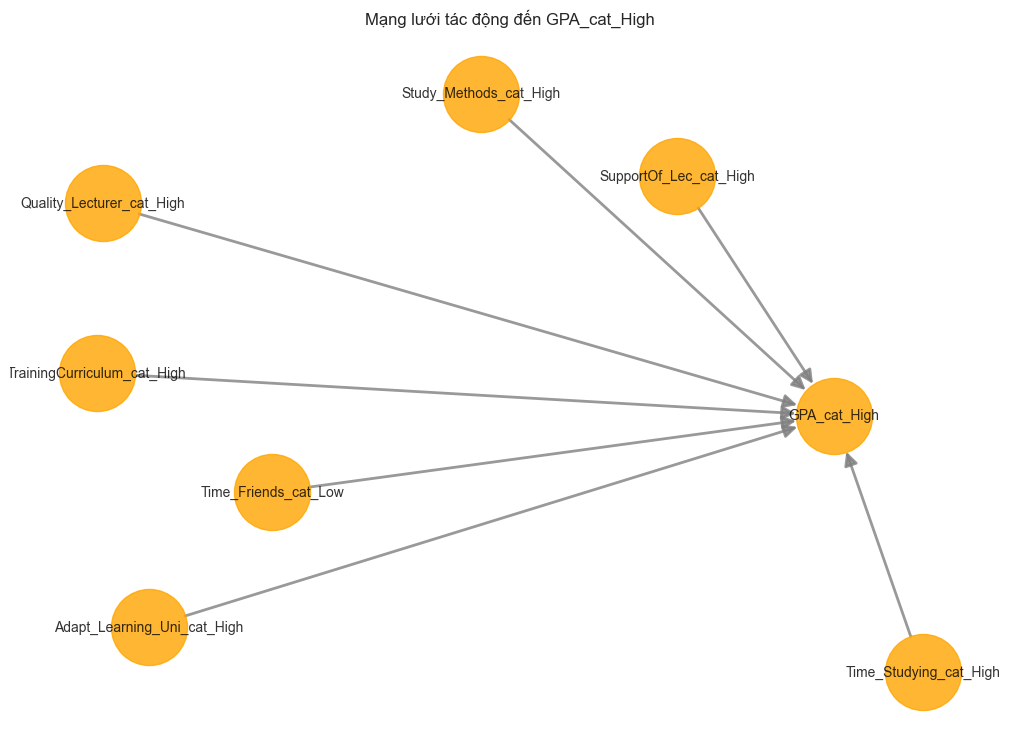

In [ ]:
import networkx as nx

def plot_network_minimal(rules, target_label):
    G = nx.DiGraph()
    # Lấy top 15 luật để tránh rối mắt
    sub_rules = rules.head(15)

    for i, row in sub_rules.iterrows():
        for item in row['antecedents']:
            G.add_edge(item, target_label, weight=row['lift'])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="orange",
            font_size=10, edge_color="gray", width=2, alpha=0.8, arrowsize=20)
    plt.title(f"Mạng lưới tác động đến {target_label}")
    plt.show()

# Gọi hàm cho nhóm High
plot_network_minimal(high_gpa_rules, 'GPA_cat_High')

#### Nhóm GPA Medium

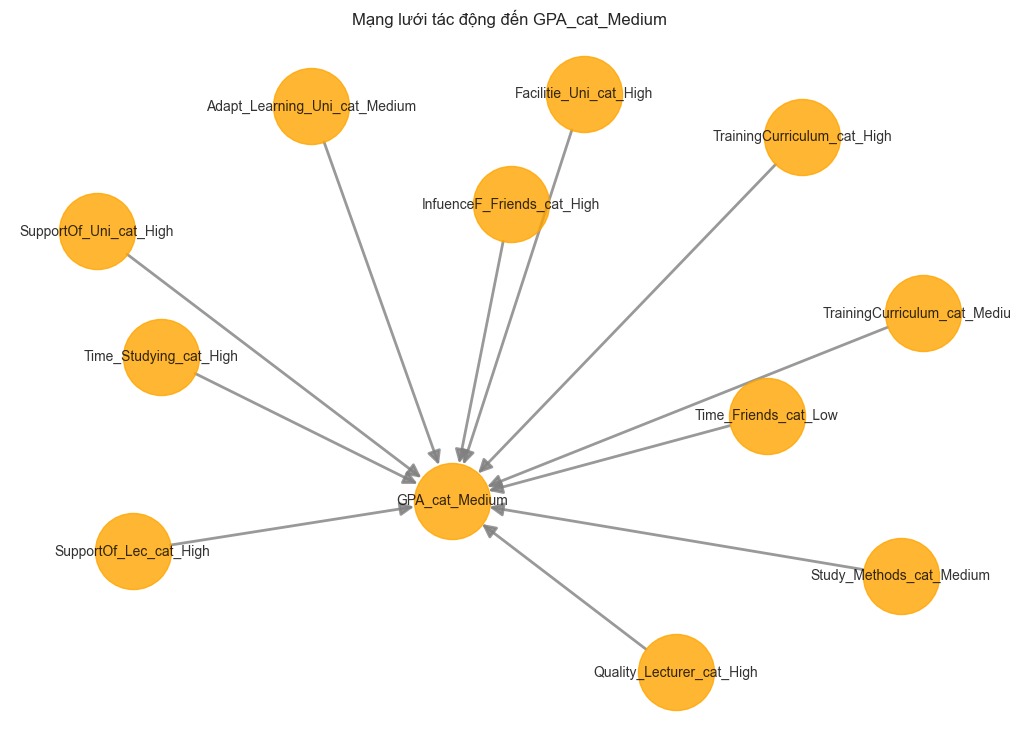

In [ ]:
import networkx as nx

def plot_network_minimal(rules, target_label):
    G = nx.DiGraph()
    # Lấy top 15 luật để tránh rối mắt
    sub_rules = rules.head(15)

    for i, row in sub_rules.iterrows():
        for item in row['antecedents']:
            G.add_edge(item, target_label, weight=row['lift'])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="orange",
            font_size=10, edge_color="gray", width=2, alpha=0.8, arrowsize=20)
    plt.title(f"Mạng lưới tác động đến {target_label}")
    plt.show()

# Gọi hàm cho nhóm Medium
plot_network_minimal(medium_gpa_rules, 'GPA_cat_Medium')

# VIII. PHÂN TÍCH VÀ SO SÁNH NHÓM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default')

from scipy.stats import spearmanr, chi2_contingency, kruskal

## 8.1 Phân tích theo giới tính

In [ ]:
print("\n" + "-"*80)
print("HỒ SƠ NHÓM GIỚI TÍNH")
print("-"*80)

gender_profiles = df.groupby('Gender')[df.columns].mean()
print("\nHồ sơ giới tính (Giá trị trung bình cho tất cả các biến):")
print(gender_profiles.T)




--------------------------------------------------------------------------------
HỒ SƠ NHÓM GIỚI TÍNH
--------------------------------------------------------------------------------

Hồ sơ giới tính (Giá trị trung bình cho tất cả các biến):
Gender                     1         2
Year                4.797235  4.632310
Gender              1.000000  2.000000
Policy_Stu          1.649770  1.632310
Minority_Stu        1.958525  1.931673
Poor_Stu            1.930876  1.960046
Father_Edu          3.774194  3.685582
Mother_Edu          3.741935  3.606254
Father_Occupation   2.557604  2.489867
Mother_Occupation   2.580645  2.507238
Time_Friends        2.211982  2.280834
Time_SocicalMedia   3.009217  2.812970
Time_Studying       4.534562  4.731905
GPA                 3.170507  3.308049
Adapt_Learning_Uni  3.571429  3.447597
Study_Methods       3.631336  3.621309
SupportOf_Uni       4.046083  3.987261
SupportOf_Lec       4.244240  4.171975
Facilitie_Uni       4.064516  4.065431
Quality_Lecturer

1. Tổng quan về mẫu khảo sát

    - Đối tượng: Cả nam (mã 1) và nữ (mã 2) đều có giá trị trung bình về năm học (Year) rất cao (4.63 - 4.80). Điều này cho thấy mẫu khảo sát tập trung chủ yếu vào sinh viên năm cuối hoặc người đã tốt nghiệp.

    - Hoàn cảnh gia đình: Không có sự khác biệt đáng kể về nền tảng gia đình giữa hai giới. Cả hai nhóm phần lớn không thuộc diện chính sách (Policy_Stu), không phải dân tộc thiểu số (Minority_Stu) và không thuộc hộ nghèo (Poor_Stu) (các giá trị đều tiệm cận 2.0).

2. Kết quả học tập và nỗ lực (Điểm nổi bật nhất)

   -  Nữ giới học tập tốt hơn: Điểm trung bình tích lũy (GPA) của nữ (3.31) cao hơn nam (3.17).


    - Nữ giới chăm chỉ hơn: Chỉ số thời gian học tập (Time_Studying) của nữ (4.73) cao hơn nam (4.53). Với mức trung bình gần 5.0, nhóm nữ dành rất nhiều thời gian cho việc học (thường là trên 6-8 tiếng mỗi ngày).

3. Thói quen sinh hoạt và mạng xã hội

    - Nam giới dùng mạng xã hội nhiều hơn: Nam (3.01) có xu hướng dành nhiều thời gian cho mạng xã hội hơn nữ (2.81).


    - Nữ giới dành nhiều thời gian cho bạn bè hơn: Chỉ số Time_Friends của nữ (2.28) cao hơn nam (2.21), mặc dù mức chênh lệch không quá lớn.

4. Sự thích nghi và đánh giá về nhà trường

    - Nam giới thích nghi tốt hơn: Chỉ số Adapt_Learning_Uni của nam (3.57) cao hơn nữ (3.45).


    - Sự hài lòng về giảng viên: Nam giới có xu hướng đánh giá cao hơn nữ giới về chất lượng giảng viên (Quality_Lecturer: 4.44 so với 4.32) và sự hỗ trợ từ giảng viên (SupportOf_Lec: 4.24 so với 4.17).

5. Các yếu tố ảnh hưởng ngoại cảnh
    - Nam giới dễ bị ảnh hưởng bởi môi trường lớp học:

    - Sự cạnh tranh trong lớp (Competitive_Class) ảnh hưởng đến nam (3.99) mạnh hơn nữ (3.93).

    - Sự ảnh hưởng từ bạn bè trong lớp đến kết quả học tập (InfuenceF_Friends) ở nam (4.00) cũng cao hơn hẳn so với nữ (3.81).

In [ ]:
# Tính sự khác biệt
gender_diff = gender_profiles.iloc[0] - gender_profiles.iloc[1]
gender_diff_sorted = gender_diff.abs().sort_values(ascending=False)
print("\nSự khác biệt lớn nhất theo giới tính:")
print(gender_diff_sorted.head(10))


Sự khác biệt lớn nhất theo giới tính:
Gender                1.000000
Time_Studying         0.197343
Time_SocicalMedia     0.196246
InfuenceF_Friends     0.189370
Year                  0.164925
GPA                   0.137542
Mother_Edu            0.135682
Quality_Lecturer      0.126241
Adapt_Learning_Uni    0.123832
Father_Edu            0.088612
dtype: float64


## 8.2 Phân tích hồ sơ Sinh viên thuộc chính sách

In [ ]:
print("\n" + "-"*80)
print("Hồ sơ SINH VIÊN THUỘC CHÍNH SÁCH HỖ TRỢ (Policy_Stu = Yes vs No)")
print("-"*80)

policy_profiles = df.groupby('Policy_Stu')[df.columns].mean()
print("\nHồ sơ sinh viên thuộc chính sách hỗ trợ:")
print(policy_profiles.T)


--------------------------------------------------------------------------------
Hồ sơ SINH VIÊN THUỘC CHÍNH SÁCH HỖ TRỢ (Policy_Stu = Yes vs No)
--------------------------------------------------------------------------------

Hồ sơ sinh viên thuộc chính sách hỗ trợ:
Policy_Stu                 1         2
Year                4.531646  4.719384
Gender              1.893108  1.885645
Policy_Stu          1.000000  2.000000
Minority_Stu        1.821378  2.000000
Poor_Stu            1.881857  2.000000
Father_Edu          3.601969  3.749392
Mother_Edu          3.479606  3.703163
Father_Occupation   2.766526  2.342255
Mother_Occupation   2.683544  2.418491
Time_Friends        2.303797  2.255474
Time_SocicalMedia   2.949367  2.768856
Time_Studying       4.658228  4.739659
GPA                 3.234880  3.326034
Adapt_Learning_Uni  3.390999  3.502028
Study_Methods       3.540084  3.669911
SupportOf_Uni       4.035162  3.969992
SupportOf_Lec       4.160338  4.191403
Facilitie_Uni       4.142053

In [ ]:
policy_diff = (policy_profiles.iloc[1] - policy_profiles.iloc[0]).abs().sort_values(ascending=False)
print("\nSự khác biệt lớn nhất (Chính sách hỗ trợ vs Không chính sách hỗ trợ):")
print(policy_diff.head(10))


Sự khác biệt lớn nhất (Chính sách hỗ trợ vs Không chính sách hỗ trợ):
Policy_Stu           1.000000
Father_Occupation    0.424271
Mother_Occupation    0.265053
Mother_Edu           0.223557
Year                 0.187738
Time_SocicalMedia    0.180511
Minority_Stu         0.178622
Father_Edu           0.147423
Study_Methods        0.129826
Facilitie_Uni        0.120967
dtype: float64


1. Nền tảng Nhân khẩu học và Gia đình
- Sự khác biệt rõ rệt nhất nằm ở nguồn gốc và điều kiện kinh tế của sinh viên:
    - Dân tộc và Hộ nghèo: Nhóm sinh viên diện chính sách (Policy_Stu = 1) có tỷ lệ là sinh viên dân tộc thiểu số (Minority_Stu: 1.82) và sinh viên nghèo (Poor_Stu: 1.88) cao hơn hẳn so với nhóm không thuộc diện chính sách (đều đạt mức 2.0 - tức là "Không").


    - Học vấn của cha mẹ: Đây là một trong những biến có sự khác biệt lớn nhất (0.22 cho Mother_Edu và 0.15 cho Father_Edu). Cha mẹ của sinh viên diện chính sách có trình độ học vấn thấp hơn (dao động ở mức trung học/cao đẳng) so với nhóm còn lại.


2. Sự khác biệt về Nghề nghiệp và Kinh tế (Chỉ số quan trọng nhất)

    - Nghề nghiệp của cha (Father_Occupation): Đây là biến có độ lệch lớn nhất (0.42). Cha của sinh viên diện chính sách (2.77) thường làm các công việc tự do (Freelance) hoặc các công việc không thuộc khu vực công, trong khi cha của nhóm không chính sách (2.34) có xu hướng làm tự doanh (Self-employment) cao hơn.



    - Nghề nghiệp của mẹ (Mother_Occupation): Tương tự, mẹ của sinh viên diện chính sách (2.68) cũng thiên về các công việc tự do nhiều hơn nhóm đối chứng (2.42).

3. Hành vi và Kết quả Học tập

    - Sử dụng Mạng xã hội: Một điểm đáng chú ý là sinh viên diện chính sách dành thời gian cho mạng xã hội (Time_SocicalMedia: 2.95) nhiều hơn so với sinh viên không chính sách (2.77).


    - Thời gian học và GPA: Sinh viên diện chính sách có thời gian tự học thấp hơn một chút (4.66 so với 4.74) và kết quả GPA cũng thấp hơn (3.23 so với 3.33). Điều này cho thấy nhóm này có thể gặp nhiều rào cản hơn trong việc tập trung hoàn toàn cho việc học.


    - Phương pháp học tập: Nhóm chính sách (3.54) đánh giá thấp hơn về phương pháp học tập của bản thân so với nhóm còn lại (3.67).

4. Thích nghi và Đánh giá Môi trường Đại học

    - Khả năng thích nghi: Sinh viên diện chính sách (3.39) cảm thấy khó khăn hơn trong việc thích nghi với môi trường đại học so với sinh viên không chính sách (3.50).


    - Đánh giá tích cực về cơ sở vật chất: Dù gặp khó khăn về học tập, sinh viên diện chính sách lại đánh giá cao hơn về cơ sở vật chất nhà trường (Facilitie_Uni: 4.14 so với 4.02) và chương trình đào tạo (TrainingCurriculum: 4.17 so với 4.09).

## 8.3 Phân tích hồ sơ nhóm thiểu số và kinh tế xã hội

- Sinh viên dân tộc thiểu số

In [ ]:
print("\n" + "-"*80)
print("HỒ SƠ VỀ TÌNH TRẠNG KINH TẾ XÃ HỘI VÀ CÁC NHÓM THIỂU SỐ")
print("-"*80)

# Minority Student Status
minority_profiles = df.groupby('Minority_Stu')[df.columns].mean()
print("\nHồ sơ sinh viên nhóm dân tộc thiểu số:")
print(minority_profiles.T)


--------------------------------------------------------------------------------
HỒ SƠ VỀ TÌNH TRẠNG KINH TẾ XÃ HỘI VÀ CÁC NHÓM THIỂU SỐ
--------------------------------------------------------------------------------

Hồ sơ sinh viên nhóm dân tộc thiểu số:
Minority_Stu               1         2
Year                3.795276  4.710512
Gender              1.929134  1.885526
Policy_Stu          1.000000  1.678591
Minority_Stu        1.000000  2.000000
Poor_Stu            2.000000  1.953770
Father_Edu          3.307087  3.722620
Mother_Edu          3.165354  3.653275
Father_Occupation   2.740157  2.480462
Mother_Occupation   2.803150  2.495322
Time_Friends        2.023622  2.290589
Time_SocicalMedia   2.850394  2.833792
Time_Studying       4.787402  4.704458
GPA                 3.220472  3.297744
Adapt_Learning_Uni  3.338583  3.470006
Study_Methods       3.299213  3.645019
SupportOf_Uni       4.094488  3.986791
SupportOf_Lec       4.188976  4.179417
Facilitie_Uni       4.283465  4.050083


1. Đặc điểm nhân khẩu học và Nền tảng gia đình (Background)
    - Mối tương quan tuyệt đối với diện chính sách: Một điểm cực kỳ quan trọng trong dữ liệu này là Policy_Stu của nhóm dân tộc thiểu số là 1.000000. Điều này có nghĩa là 100% sinh viên dân tộc thiểu số trong mẫu khảo sát này đều thuộc diện chính sách. Đây là một quy luật kết hợp (Association Rule) mạnh mẽ: IF Minority_Stu = Yes THEN Policy_Stu = Yes.

    - Sự chênh lệch về thế hệ (Năm học): Nhóm dân tộc thiểu số có chỉ số Year trung bình là 3.80 (khoảng năm 3-4), thấp hơn nhiều so với nhóm còn lại là 4.71 (năm cuối hoặc đã tốt nghiệp). Điều này cho thấy mẫu dữ liệu về nhóm thiểu số đang "trẻ" hơn.

    - Nền tảng giáo dục gia đình thấp hơn: Có sự chênh lệch rõ rệt về trình độ học vấn của cha mẹ.

    - Cha: 3.31 (Thiểu số) < 3.72 (Kinh).

    - Mẹ: 3.17 (Thiểu số) < 3.65 (Kinh). => Đây là yếu tố ngoại cảnh có thể ảnh hưởng đến sự hỗ trợ học tập từ gia đình.

2. Nghịch lý: "Cần cù nhưng chưa Hiệu quả"

    - Chăm chỉ hơn: Sinh viên dân tộc thiểu số dành thời gian học tập (Time_Studying) cao hơn nhóm còn lại (4.79 so với 4.70).

    - Nhưng kết quả thấp hơn: Mặc dù học nhiều hơn, GPA của họ lại thấp hơn (3.22 so với 3.30).

    - Nguyên nhân tiềm năng: Biến Study_Methods (Phương pháp học tập) của nhóm thiểu số chỉ đạt 3.30, thấp hơn hẳn so với nhóm kia là 3.65. => Kết luận: Vấn đề của nhóm này không nằm ở thái độ hay sự lười biếng, mà nằm ở kỹ năng/phương pháp học tập. Họ đang học rất nhiều nhưng thiếu phương pháp hiệu quả.

3. Sự thích nghi và Đánh giá về nhà trường
    - Khó khăn trong thích nghi: Chỉ số Adapt_Learning_Uni (Thích nghi với môi trường ĐH) của nhóm thiểu số thấp hơn (3.34 so với 3.47). Điều này dễ hiểu do sự khác biệt về văn hóa và nền tảng.

    - Sự trân trọng cơ sở vật chất: Mặc dù khó thích nghi, họ lại đánh giá cao hơn về cơ sở vật chất (Facilitie_Uni: 4.28 > 4.05) và chất lượng giảng viên (Quality_Lecturer: 4.41 > 4.32). => Tâm lý học: Có thể do xuất thân từ điều kiện khó khăn hơn (Policy Student), họ trân trọng các nguồn lực mà nhà trường cung cấp hơn so với sinh viên thành thị/nhóm Kinh.

4. Tương tác xã hội
    - Xu hướng khép kín: Nhóm dân tộc thiểu số dành ít thời gian cho bạn bè hơn (Time_Friends: 2.02 so với 2.29) và cũng ít bị ảnh hưởng bởi bạn bè hơn (InfuenceF_Friends: 3.67 so với 3.84).

    - Mạng xã hội: Thời gian sử dụng mạng xã hội tương đương nhau (2.85 vs 2.83), cho thấy công nghệ đã san phẳng khoảng cách về giải trí số.

- Tình trạng kinh tế của của gia đình

In [ ]:
# Poor Student Status
poor_profiles = df.groupby('Poor_Stu')[df.columns].mean()
print("\nHồ sơ tình trạng kinh tế xã hội (Poor_Stu):")
print(poor_profiles.T)


Hồ sơ tình trạng kinh tế xã hội (Poor_Stu):
Poor_Stu                   1         2
Year                4.595238  4.653226
Gender              1.821429  1.891398
Policy_Stu          1.000000  1.662903
Minority_Stu        2.000000  1.931720
Poor_Stu            1.000000  2.000000
Father_Edu          3.119048  3.721505
Mother_Edu          2.976190  3.650538
Father_Occupation   3.059524  2.472043
Mother_Occupation   2.845238  2.500538
Time_Friends        2.047619  2.283333
Time_SocicalMedia   3.547619  2.802688
Time_Studying       4.738095  4.708602
GPA                 3.190476  3.297312
Adapt_Learning_Uni  3.452381  3.461828
Study_Methods       3.511905  3.627419
SupportOf_Uni       4.178571  3.985484
SupportOf_Lec       4.321429  4.173656
Facilitie_Uni       4.059524  4.065591
Quality_Lecturer    4.595238  4.318280
TrainingCurriculum  4.226190  4.114516
Competitive_Class   4.095238  3.930108
InfuenceF_Friends   4.035714  3.817742


1. Nền tảng gia đình
- Sự khác biệt về xuất phát điểm của sinh viên nghèo rất rõ ràng qua trình độ học vấn của cha mẹ:

    - Học vấn thấp: Cả cha và mẹ của sinh viên nghèo đều có chỉ số học vấn thấp hơn hẳn so với nhóm còn lại.

    - Father_Edu: 3.12 (Hộ nghèo) < 3.72 (Không nghèo).


    - Mother_Edu: 2.98 (Hộ nghèo) < 3.65 (Không nghèo).

- Mối liên hệ chính sách: Chỉ số Policy_Stu của nhóm hộ nghèo là 1.00, nghĩa là 100% sinh viên hộ nghèo đều thuộc diện chính sách. Đây là một luật kết hợp tuyệt đối trong bộ dữ liệu này.

2. Hành vi: "Bẫy" Mạng xã hội
- Đây là phát hiện thú vị và quan trọng nhất để chạy các mô hình phân lớp hoặc tìm nguyên nhân gốc rễ (Root Cause Analysis):

- Nghiện mạng xã hội: Sinh viên nghèo dành thời gian cho mạng xã hội (Time_SocicalMedia) cao đột biến, đạt mức 3.55, cao hơn rất nhiều so với nhóm không nghèo (2.80). Đây là mức chênh lệch lớn nhất về hành vi trong các bảng số liệu bạn đã cung cấp từ đầu đến giờ.


- Vẫn học chăm chỉ: Mặc dù dùng nhiều mạng xã hội, họ vẫn dành thời gian tự học (Time_Studying) rất cao (4.74), thậm chí nhỉnh hơn nhóm không nghèo (4.71).

=> Giả thuyết Data Mining: Việc sử dụng mạng xã hội quá nhiều (có thể là để giải trí, kiếm thêm thu nhập online, hoặc lướt web) đang làm giảm hiệu quả của thời gian tự học, dẫn đến hiện tượng "Học nhiều nhưng điểm chưa cao".

3. Kết quả học tập và Phương pháp

- GPA thấp hơn: Hệ quả của các yếu tố trên là GPA của sinh viên nghèo (3.19) thấp hơn so với nhóm còn lại (3.30).


- Phương pháp học: Chỉ số Study_Methods của nhóm này (3.51) cũng thấp hơn nhóm không nghèo (3.63).

4. Tâm lý và Đánh giá về nhà trường (Sự trân trọng)
- Tương tự nhóm Dân tộc thiểu số và Chính sách, nhóm Sinh viên nghèo có xu hướng đánh giá rất cao chất lượng đào tạo và giảng viên:


    - Chất lượng giảng viên (Quality_Lecturer): Đạt 4.60 (rất cao) so với 4.32 của nhóm kia.


    - Hỗ trợ của giảng viên (SupportOf_Lec): Đạt 4.32 so với 4.17.


    - Hỗ trợ của nhà trường (SupportOf_Uni): Đạt 4.18 so với 3.99.

=> Điều này cho thấy nhóm sinh viên nghèo có niềm tin và sự dựa dẫm rất lớn vào nhà trường và giảng viên như một đòn bẩy để thay đổi cuộc sống.

5. Tác động từ bạn bè

- Nhạy cảm với môi trường: Sinh viên nghèo cảm nhận áp lực cạnh tranh (Competitive_Class) cao hơn (4.10 vs 3.93) và chịu ảnh hưởng từ bạn bè (InfuenceF_Friends) mạnh hơn (4.04 vs 3.82).

## 8.4 Phân tích tiến trình năm học

In [ ]:
year_profiles = df.groupby('Year')[df.columns].mean()
print("\nSự tiến bộ qua các năm:")
print(year_profiles.T)


Sự tiến bộ qua các năm:
Year                       3         4         5
Year                3.000000  4.000000  5.000000
Gender              1.970370  1.911980  1.873571
Policy_Stu          1.311111  1.640587  1.663571
Minority_Stu        1.540741  1.929095  1.974286
Poor_Stu            1.955556  1.946210  1.960000
Father_Edu          3.274074  3.391198  3.825000
Mother_Edu          3.200000  3.305623  3.754286
Father_Occupation   2.540741  2.628362  2.455000
Mother_Occupation   2.525926  2.691932  2.462857
Time_Friends        2.029630  2.454768  2.243571
Time_SocicalMedia   2.866667  2.821516  2.835714
Time_Studying       4.725926  4.603912  4.739286
GPA                 3.251852  3.151589  3.337857
Adapt_Learning_Uni  3.214815  3.266504  3.542143
Study_Methods       3.340741  3.154034  3.786429
SupportOf_Uni       4.259259  3.427873  4.133571
SupportOf_Lec       4.148148  4.141809  4.194286
Facilitie_Uni       4.503704  3.444988  4.204286
Quality_Lecturer    4.481481  4.200489  4.35

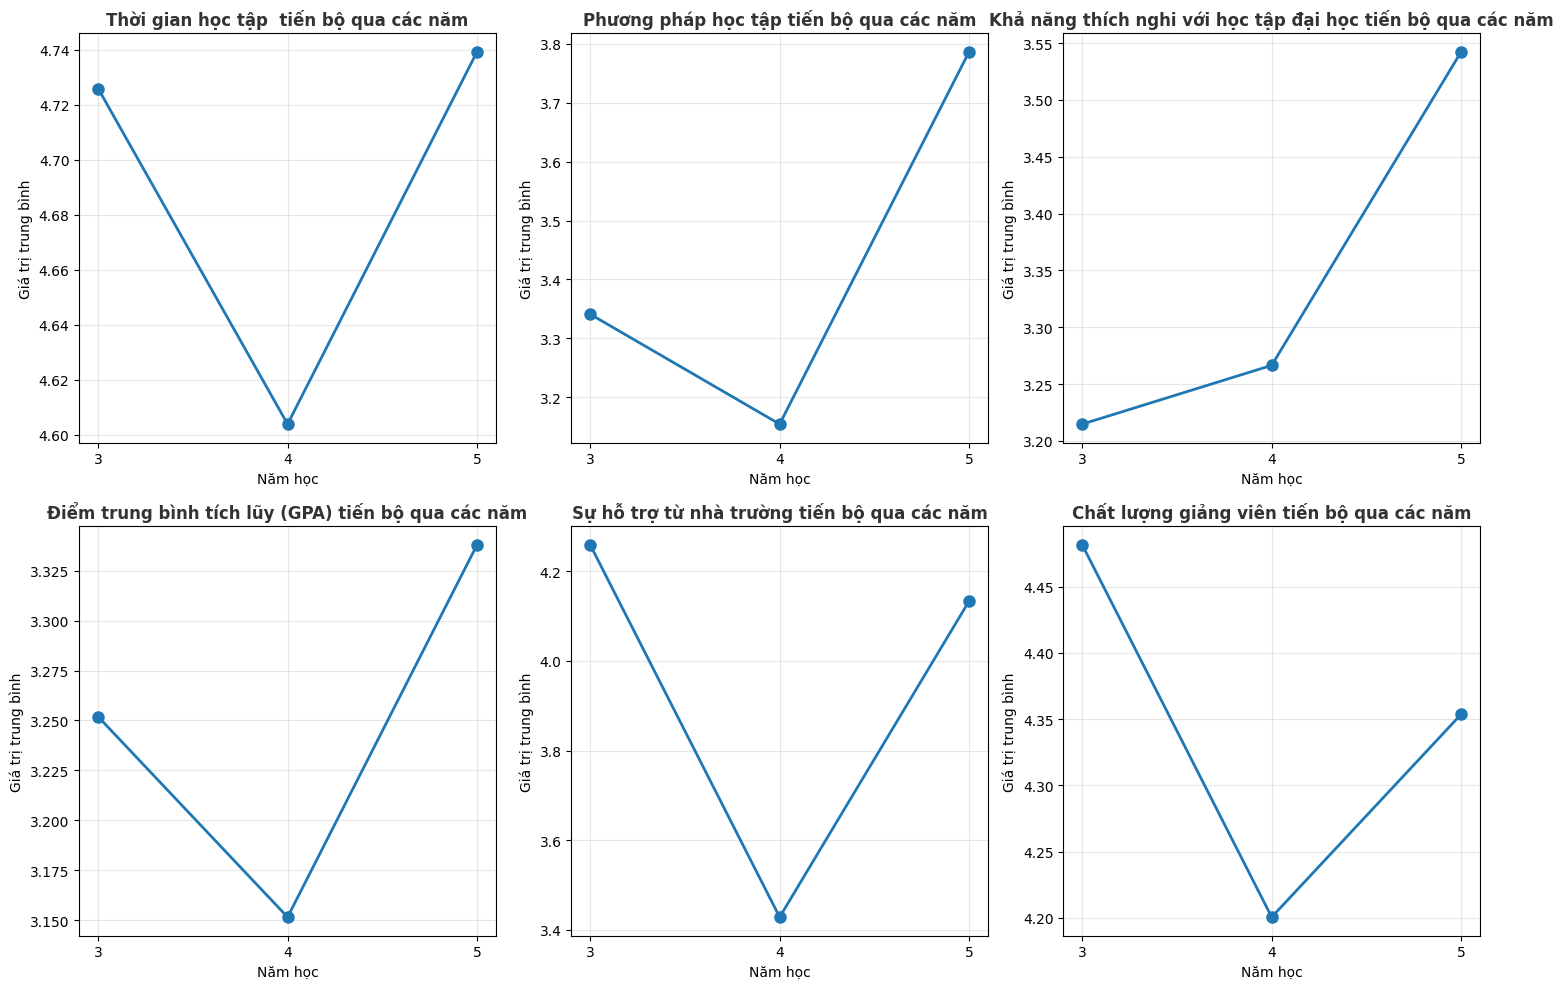

In [ ]:
# Track specific variables across years
progression_vars = ['Time_Studying', 'Study_Methods', 'Adapt_Learning_Uni',
                   'GPA', 'SupportOf_Uni', 'Quality_Lecturer']
codebook = {
    'Time_Studying': 'Thời gian học tập ',
    'Study_Methods': 'Phương pháp học tập',
    'Adapt_Learning_Uni': 'Khả năng thích nghi với học tập đại học',
    'GPA': 'Điểm trung bình tích lũy (GPA)',
    'SupportOf_Uni': 'Sự hỗ trợ từ nhà trường',
    'Quality_Lecturer': 'Chất lượng giảng viên'
}
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(progression_vars):
    year_means = df.groupby('Year')[var].mean()
    axes[idx].plot(year_means.index, year_means.values, marker='o', linewidth=2, markersize=8)

    axes[idx].set_xlabel('Năm học')
    title_text = codebook.get(var, var)
    axes[idx].set_title(f'{title_text} tiến bộ qua các năm', fontsize=12, fontweight='bold', color='#333333')
    axes[idx].set_ylabel('Giá trị trung bình')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xticks(year_means.index)

plt.tight_layout()
plt.show()


1. Hiện tượng "Khủng hoảng năm thứ 4"
    - Năm thứ 4 dường như là giai đoạn khó khăn và "vỡ mộng" nhất đối với sinh viên trong mẫu khảo sát:

    - Sự sụt giảm toàn diện: Hầu hết các chỉ số tích cực đều giảm sâu ở năm 4 so với năm 3 và năm 5.
    GPA: Giảm xuống mức thấp nhất (3.15) so với năm 3 (3.25).


    - Phương pháp học tập (Study_Methods): Rơi xuống đáy (3.15), cho thấy sinh viên năm 4 đang loay hoay hoặc gặp bế tắc trong việc tìm cách học hiệu quả cho các môn chuyên ngành khó.

    - Sự hài lòng sụt giảm nghiêm trọng: Đánh giá về Hỗ trợ của trường (SupportOf_Uni) giảm từ 4.26 (Năm 3) xuống 3.43 (Năm 4). Đánh giá Cơ sở vật chất (Facilitie_Uni) giảm sốc từ 4.50 xuống 3.44.

=> Năm 4 có thể là thời điểm sinh viên chịu áp lực lớn từ các môn chuyên ngành sâu, đồ án hoặc thực tập, dẫn đến sự bất mãn và kết quả giảm sút.

2. Sự "Hồi phục và Trưởng thành" ở nhóm Đã tốt nghiệp
Sau giai đoạn khủng hoảng năm 4, nhóm  đã tốt nghiệp thể hiện sự vượt trội:

    - Hiệu suất cao nhất: GPA đạt đỉnh (3.34).

    - Làm chủ phương pháp: Chỉ số Study_Methods tăng vọt lên 3.79 (cao nhất trong các năm). Điều này chứng tỏ sau khi vượt qua khó khăn, họ đã tìm ra cách học tối ưu.


    -  Thích nghi hoàn toàn: Chỉ số Adapt_Learning_Uni tăng dần đều và đạt đỉnh ở mức 3.54.

3. Sự khác biệt về nền tảng
- Cần lưu ý một điểm "bất thường" trong dữ liệu mẫu có thể ảnh hưởng đến kết quả so sánh:

    - Nhóm Năm 3 có đặc điểm nhân khẩu học khác biệt: Nhóm này có tỷ lệ sinh viên diện chính sách (Policy_Stu = 1.31, gần 1 là Có) và dân tộc thiểu số (Minority_Stu = 1.54) cao hơn hẳn so với nhóm Năm 4 và 5 (các chỉ số này ở năm 4, 5 đều tiệm cận 2 - tức là Không).


    - Nhóm Năm 5 có điều kiện tốt hơn: Cha mẹ của nhóm Năm 5 có trình độ học vấn cao hơn hẳn (Father_Edu: 3.83, Mother_Edu: 3.75) so với nhóm Năm 3
4. Tác động của Môi trường và Bạn bè

    - Áp lực cạnh tranh tăng dần: Cảm nhận về sự cạnh tranh trong lớp tăng mạnh ở năm cuối (4.03).


    - Ảnh hưởng của bạn bè: Càng về cuối khóa, sinh viên càng chịu ảnh hưởng nhiều từ bạn bè (InfuenceF_Friends tăng lên 3.89).

## 8.5 Phân tích tác động của trình độ học vấn của cha mẹ

- Học vấn của cha


Hồ sơ sinh viên theo trình độ cha:
                 GPA  Study_Methods  Adapt_Learning_Uni  SupportOf_Uni
Father_Edu                                                            
1           3.163793       3.275862            3.275862       3.836207
2           3.140152       3.454545            3.284091       3.920455
3           3.296296       3.472222            3.340741       3.868519
4           3.356083       3.578635            3.356083       3.928783
5           3.345455       3.883636            3.734545       4.200000
6           3.313869       3.890511            3.598540       4.094891


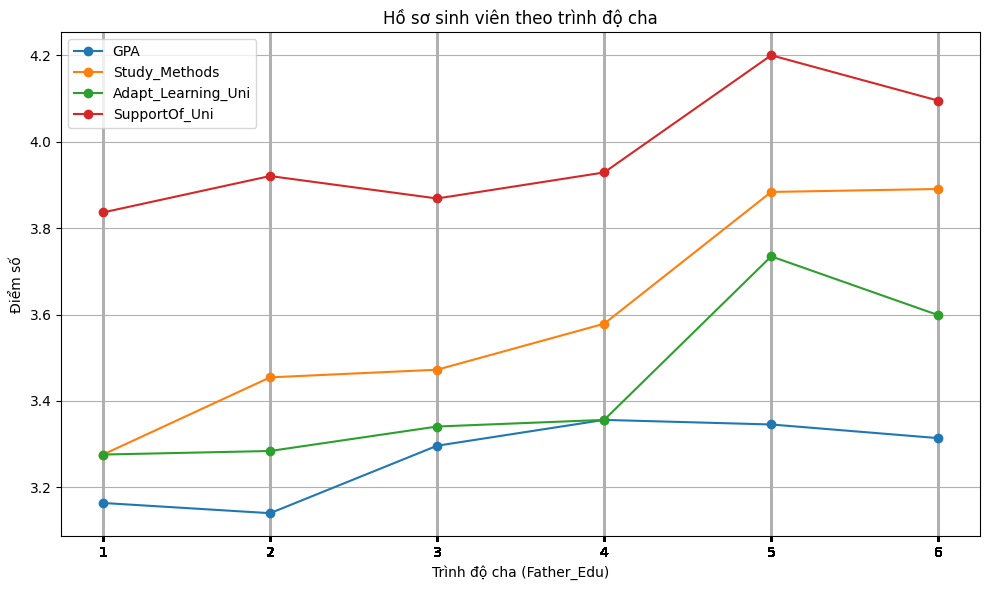

In [ ]:

# Father's Education
father_edu_profiles = df.groupby('Father_Edu')[['GPA', 'Study_Methods',
                                                 'Adapt_Learning_Uni', 'SupportOf_Uni']].mean()
print("\nHồ sơ sinh viên theo trình độ cha:")
print(father_edu_profiles)

plt.figure(figsize=(10, 6))

# Vẽ từng chỉ số (metric)
for column in father_edu_profiles.columns:
    plt.plot(father_edu_profiles.index, father_edu_profiles[column], marker='o', label=column)

plt.title('Hồ sơ sinh viên theo trình độ cha')
plt.xlabel('Trình độ cha (Father_Edu)')
plt.ylabel('Điểm số')
plt.legend()
plt.grid(True)
plt.xticks(df['Father_Edu']) # Đảm bảo trục x hiển thị đúng các mức 1-6
plt.tight_layout()
plt.show()


1. Tương quan thuận giữa Học vấn của Cha và GPA của Con
- Có một xu hướng tăng dần về điểm số khi trình độ học vấn của người cha tăng lên:

- Nhóm thấp (Mức 1, 2 - Tiểu học/THCS): Sinh viên có cha học vấn thấp có GPA thấp nhất (mức 3.14 - 3.16).

- Nhóm cao (Mức 4, 5 - CĐ/ĐH/Sau ĐH): Sinh viên có cha học Cao đẳng/Đại học có GPA cao nhất (đạt đỉnh ở mức 3.36 với Mức 4 và 3.35 với Mức 5).


Nhận xét: Sự chênh lệch GPA tuy không quá lớn về mặt con số tuyệt đối (khoảng 0.2 điểm), nhưng đủ để thấy nền tảng giáo dục gia đình là một bệ phóng nhất định cho kết quả học tập.

2. Sự chuyển giao kỹ năng (Study Methods & Adaptation)
- Đây là điểm sáng giá nhất trong bảng dữ liệu này. Sự khác biệt về kỹ năng (phương pháp học, khả năng thích nghi) rõ rệt hơn nhiều so với sự khác biệt về điểm số:

    - Phương pháp học tập (Study_Methods):

        - Cha học Tiểu học (Mức 1): Chỉ số thấp nhất 3.28.

        - Cha học Đại học/Sau ĐH (Mức 5): Chỉ số vọt lên 3.88.

    => Ý nghĩa: Cha mẹ có trình độ học vấn cao dường như không chỉ hỗ trợ kiến thức mà quan trọng hơn là định hướng được cách học (learning how to learn) cho con cái tốt hơn hẳn so với nhóm cha mẹ có học vấn thấp.

    - Thích nghi môi trường (Adapt_Learning_Uni):

        - Tương tự, nhóm Mức 5 có khả năng thích nghi tốt vượt trội (3.73) so với nhóm Mức 1 và 2 (chỉ dừng ở mức 3.28).

    => Ý nghĩa: Sinh viên có cha học vấn cao có thể đã được làm quen với tư duy học thuật hoặc môi trường giáo dục từ sớm, giúp họ không bị "sốc" khi vào đại học.

3. Nhận thức về sự hỗ trợ của nhà trường
- Nhóm có cha học vấn cao (Mức 5) đánh giá sự hỗ trợ của nhà trường (SupportOf_Uni) cao nhất (4.20) so với nhóm thấp nhất (Mức 1: 3.84).

=> Có thể nhóm sinh viên này chủ động hơn trong việc tìm kiếm và tận dụng các nguồn lực hỗ trợ từ nhà trường (thư viện, phòng lab, cố vấn), do đó họ cảm thấy nhà trường hỗ trợ tốt hơn. Ngược lại, nhóm sinh viên có hoàn cảnh khó khăn hơn (cha học vấn thấp) có thể rụt rè hơn hoặc thiếu thông tin để tiếp cận các hỗ trợ này.

4. Nhóm "Khác" (Mức 6)
- Nhóm Mức 6 (Other - Khác) có các chỉ số về Phương pháp học tập (3.89) và Hỗ trợ (4.09) rất cao, tương đương với nhóm Đại học (Mức 5), dù GPA thấp hơn một chút (3.31).




Hồ sơ học sinh theo trình độ học vấn của mẹ:
                 GPA  Study_Methods  Adapt_Learning_Uni  SupportOf_Uni
Mother_Edu                                                            
1           3.140496       3.371901            3.239669       3.851240
2           3.113475       3.276596            3.163121       3.698582
3           3.279159       3.529637            3.386233       3.965583
4           3.342342       3.632883            3.448198       3.941441
5           3.403226       3.949309            3.804147       4.288018
6           3.335714       3.835714            3.514286       4.071429


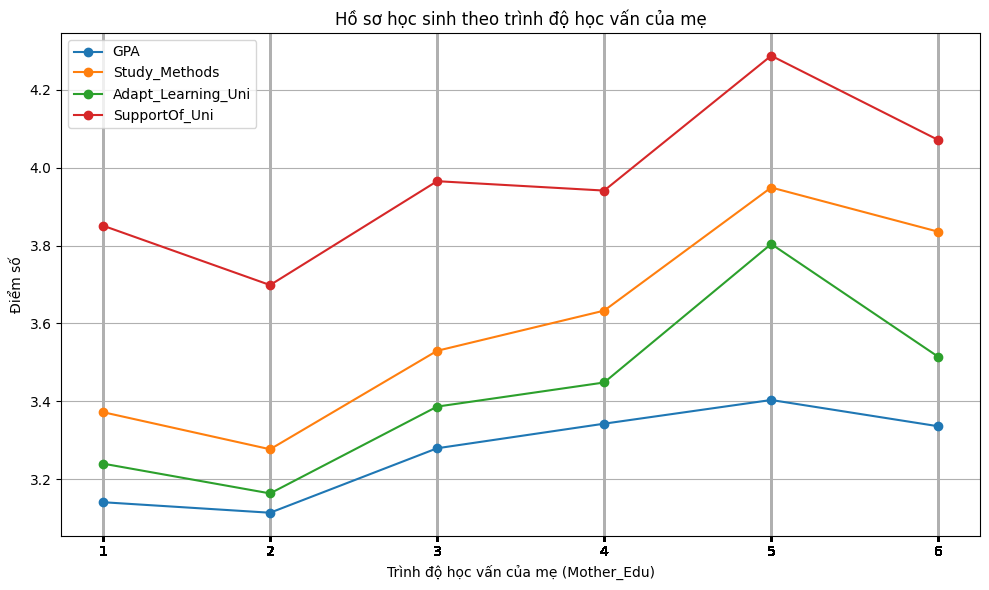

In [ ]:
# Mother's Education
mother_edu_profiles = df.groupby('Mother_Edu')[['GPA', 'Study_Methods',
                                                 'Adapt_Learning_Uni', 'SupportOf_Uni']].mean()
print("\nHồ sơ học sinh theo trình độ học vấn của mẹ:")
print(mother_edu_profiles)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ từng chỉ số (metric)
for column in mother_edu_profiles.columns:
    plt.plot(mother_edu_profiles.index, mother_edu_profiles[column], marker='o', label=column)

plt.title('Hồ sơ học sinh theo trình độ học vấn của mẹ')
plt.xlabel('Trình độ học vấn của mẹ (Mother_Edu)')
plt.ylabel('Điểm số')
plt.legend()
plt.grid(True)
plt.xticks(df['Mother_Edu']) # Đảm bảo trục x hiển thị đúng các mức 1-6
plt.tight_layout()


plt.show()

1. Xu hướng chung
- Không tăng tuyến tính tuyệt đối: Mặc dù về cơ bản, trình độ học vấn của mẹ cao hơn thường đi kèm với kết quả tốt hơn của con, nhưng quy luật này không đúng tuyệt đối theo đường thẳng.

- Mô hình chữ V lệch: Dữ liệu có xu hướng giảm nhẹ từ mức 1 xuống mức 2, sau đó tăng dần đều đến đỉnh điểm ở mức 5, và cuối cùng lại giảm xuống ở mức 6.

2. Phân tích chi tiết từng nhóm
- Nhóm "Vàng" (Mức 5 - Đạt đỉnh cao nhất):
    - Đây là nhóm có chỉ số tốt nhất toàn diện. Sinh viên có mẹ ở trình độ học vấn mức 5 đạt điểm cao nhất ở tất cả 4 hạng mục.

    - Đặc biệt, khả năng thích nghi (Adapt_Learning_Uni: 3.80) và phương pháp học tập (Study_Methods: 3.95) vượt trội hơn hẳn các nhóm khác.

=> Có thể đây là nhóm phụ huynh có trình độ cao nhưng vẫn dành nhiều thời gian và phương pháp đúng đắn để hỗ trợ con cái.

- Nhóm cần lưu ý (Mức 2 - Điểm thấp nhất):

    - Nhóm mức 2 lại có các chỉ số thấp hơn cả nhóm mức 1. Đây là "vùng trũng" của biểu đồ dữ liệu.

    - GPA và khả năng thích nghi (Adapt_Learning_Uni) của nhóm này thấp nhất trong tất cả các nhóm.

- Hiện tượng "bão hòa" ở mức cao nhất (Mức 6):

    - Ở trình độ học vấn cao nhất của mẹ (mức 6), các chỉ số của con không tăng thêm mà lại giảm đi so với mức 5.

    - Tuy nhiên, mức 6 vẫn duy trì được thành tích tốt (đứng thứ 2 chung cuộc), chỉ kém mức 5.

    => Có thể những người mẹ ở trình độ học vấn rất cao (như Tiến sĩ, chuyên gia cấp cao...) thường có công việc rất bận rộn, áp lực cao, dẫn đến thời gian trực tiếp kèm cặp hoặc hỗ trợ tâm lý cho con bị hạn chế hơn so với nhóm 5.

3. Nhận xét về các chỉ số (Metrics)
- Sự hỗ trợ của nhà trường (SupportOf_Uni):

    - Đây là chỉ số luôn có điểm số cao nhất trong 4 cột (dao động từ 3.7 đến 4.3). Điều này cho thấy sinh viên nói chung, bất kể hoàn cảnh gia đình, đều đánh giá khá tích cực về môi trường hỗ trợ của đại học.

- GPA (Kết quả học tập):

    - Biến động của GPA là nhỏ nhất so với các chỉ số khác (Chênh lệch giữa thấp nhất 3.11 và cao nhất 3.40 là không quá lớn). Điều này cho thấy trình độ của mẹ ảnh hưởng đến kỹ năng và nhận thức (Study Methods, Adaptability) nhiều hơn là ảnh hưởng trực tiếp đến điểm số cuối cùng.

## 8.6 Bảng so sánh toàn diện

In [ ]:
profiling_vars = ['GPA', 'Time_Studying', 'Time_Friends', 'Time_SocicalMedia',
                  'Study_Methods', 'Adapt_Learning_Uni', 'SupportOf_Uni',
                  'Quality_Lecturer', 'Father_Edu', 'Mother_Edu']

profile_by_gender = df.groupby('Gender')[profiling_vars].mean()
profile_by_policy = df.groupby('Policy_Stu')[profiling_vars].mean()
profile_by_minority = df.groupby('Minority_Stu')[profiling_vars].mean()
profile_by_poor = df.groupby('Poor_Stu')[profiling_vars].mean()

# Combine all profiles
all_profiles = pd.concat([
    profile_by_gender.add_prefix('Gender_'),
    profile_by_policy.add_prefix('Policy_'),
    profile_by_minority.add_prefix('Minority_'),
    profile_by_poor.add_prefix('Poor_')
], axis=1)

print("\nHồ sơ nhóm toàn diện (đã được chuyển đổi):")
print(all_profiles.T.round(3))



Hồ sơ nhóm toàn diện (đã được chuyển đổi):
                                 1      2
Gender_GPA                   3.171  3.308
Gender_Time_Studying         4.535  4.732
Gender_Time_Friends          2.212  2.281
Gender_Time_SocicalMedia     3.009  2.813
Gender_Study_Methods         3.631  3.621
Gender_Adapt_Learning_Uni    3.571  3.448
Gender_SupportOf_Uni         4.046  3.987
Gender_Quality_Lecturer      4.442  4.316
Gender_Father_Edu            3.774  3.686
Gender_Mother_Edu            3.742  3.606
Policy_GPA                   3.235  3.326
Policy_Time_Studying         4.658  4.740
Policy_Time_Friends          2.304  2.255
Policy_Time_SocicalMedia     2.949  2.769
Policy_Study_Methods         3.540  3.670
Policy_Adapt_Learning_Uni    3.391  3.502
Policy_SupportOf_Uni         4.035  3.970
Policy_Quality_Lecturer      4.349  4.320
Policy_Father_Edu            3.602  3.749
Policy_Mother_Edu            3.480  3.703
Minority_GPA                 3.220  3.298
Minority_Time_Studying       4.7

## 8.7 Kiểm tra sự khác biệt giữa các nhóm thống kê

In [ ]:
print("\n" + "="*80)
print("GROUP COMPARISONS: KRUSKAL-WALLIS TEST")
print("="*80)
ordinal_cols = [
    'GPA', 'Time_Studying', 'Time_Friends', 'Time_SocicalMedia',
    'Study_Methods', 'Adapt_Learning_Uni', 'SupportOf_Uni',
    'Quality_Lecturer', 'Father_Edu', 'Mother_Edu'
]

group_test_results = {}

# Test if ordinal variables differ by Gender
gender_groups = [df[df['Gender'] == g][ordinal_cols] for g in df['Gender'].unique()]
for col in ordinal_cols:
    try:
        stat, pval = kruskal(*[df[df['Gender'] == g][col].dropna()
                              for g in df['Gender'].unique()])
        group_test_results[f"{col}_by_Gender"] = {
            'H_statistic': stat,
            'p_value': pval,
            'significant': 'Yes' if pval < 0.05 else 'No'
        }
    except:
        pass

# Similar for other grouping variables (Policy_Stu, Year, etc.)
for grouping_var in ['Policy_Stu', 'Year']:
    for col in ordinal_cols:
        if col != grouping_var:
            try:
                stat, pval = kruskal(*[df[df[grouping_var] == g][col].dropna()
                                      for g in sorted(df[grouping_var].dropna().unique())])
                group_test_results[f"{col}_by_{grouping_var}"] = {
                    'H_statistic': stat,
                    'p_value': pval,
                    'significant': 'Yes' if pval < 0.05 else 'No'
                }
            except Exception as e:
                print(f"Skip {col} by {grouping_var}: {e}")

group_test_df = pd.DataFrame(group_test_results).T
group_test_df = group_test_df.sort_values('p_value')

print("\nSignificant Group Differences (p < 0.05):")
print(group_test_df[group_test_df['significant'] == 'Yes'].head(20))



GROUP COMPARISONS: KRUSKAL-WALLIS TEST

Significant Group Differences (p < 0.05):
                                 H_statistic   p_value significant
Study_Methods_by_Year             159.394226       0.0         Yes
SupportOf_Uni_by_Year             128.774063       0.0         Yes
Mother_Edu_by_Year                 52.839889       0.0         Yes
Father_Edu_by_Year                 48.758957       0.0         Yes
Adapt_Learning_Uni_by_Year         37.854446       0.0         Yes
GPA_by_Year                        35.148247       0.0         Yes
Time_Friends_by_Year               17.922873  0.000128         Yes
Mother_Edu_by_Policy_Stu           12.890925   0.00033         Yes
GPA_by_Policy_Stu                  12.439794   0.00042         Yes
Time_SocicalMedia_by_Policy_Stu     11.63952  0.000646         Yes
Time_Studying_by_Gender             9.133619   0.00251         Yes
Quality_Lecturer_by_Year           11.686105    0.0029         Yes
Study_Methods_by_Policy_Stu         8.140375  

1. Phân tích theo nhóm "Năm học" (By Year) - Yếu tố tác động mạnh nhất
- Các chỉ số H_statistic ở nhóm này cao vượt trội, cho thấy Năm học (Sinh viên năm 1, 2, 3, 4) là yếu tố gây ra sự thay đổi lớn nhất trong hành vi và kết quả của sinh viên.

- Phương pháp học & Sự hỗ trợ (Top 1 & 2):

- Study_Methods (H=159.39) và SupportOf_Uni (H=128.77) có sự khác biệt cực kỳ lớn giữa các năm.

=> Ý nghĩa: Sinh viên năm nhất và sinh viên năm cuối có cách học và cảm nhận về sự hỗ trợ của nhà trường hoàn toàn khác nhau (thường năm cuối sẽ có kỹ năng tốt hơn nhưng có thể đánh giá khắt khe hơn hoặc ngược lại).

- Kết quả học tập & Thích nghi: Adapt_Learning_Uni (H=37.85) và GPA (H=35.14) cũng khác biệt rõ rệt. Khả năng thích nghi thay đổi theo thời gian là điều dễ hiểu.

- Hiệu ứng thế hệ : Mother_Edu và Father_Edu cũng khác nhau theo năm (H~52 và H~48). Điều này hơi lạ vì trình độ bố mẹ không thay đổi theo năm học của con.

=> Điều này cho thấy đặc điểm nhân khẩu học của các khóa tuyển sinh khác nhau. Ví dụ: Khóa sinh viên năm 4 có nền tảng gia đình khác với khóa sinh viên năm 1 hiện tại.

2. Phân tích theo nhóm "Chính sách" (By Policy_Stu) - Yếu tố Xã hội
- Biến Policy_Stu (Có thuộc diện chính sách hay không) phân tách sinh viên thành các nhóm có đặc điểm kinh tế - xã hội khác nhau rõ rệt.

- Nền tảng gia đình: Mother_Edu (H=12.89) và Father_Edu (H=5.35) có sự khác biệt ý nghĩa. Điều này khớp với biểu đồ Heatmap trước đó: Sinh viên diện chính sách thường có cha mẹ có trình độ học vấn thấp hơn (do điều kiện kinh tế khó khăn hơn).

- Hành vi & Kết quả:
    - GPA (H=12.44) có sự khác biệt: Diện chính sách ảnh hưởng đến điểm số (có thể do áp lực cuộc sống hoặc điều kiện học tập).

    - Time_SocicalMedia (H=11.64): Có sự khác biệt trong thói quen sử dụng mạng xã hội giữa hai nhóm này.

3. Phân tích theo nhóm "Giới tính" (By Gender) - Yếu tố Hành vi
    - Giới tính có tác động nhưng mức độ (H-statistic) thấp hơn so với Năm học.

    - Thời gian học tập: Time_Studying (H=9.13, p=0.0025) cho thấy nam và nữ dành thời gian học khác nhau (thường nữ chăm chỉ hơn, khớp với biểu đồ Radar trước đó).

    - Điểm số: GPA (H=5.41, p=0.019) cũng có sự khác biệt, nhưng không quá lớn như sự khác biệt do Năm học gây ra.

## 8.8 Trực quan hóa hồ sơ (radar, bản đồ nhiệt, biểu đồ song song)

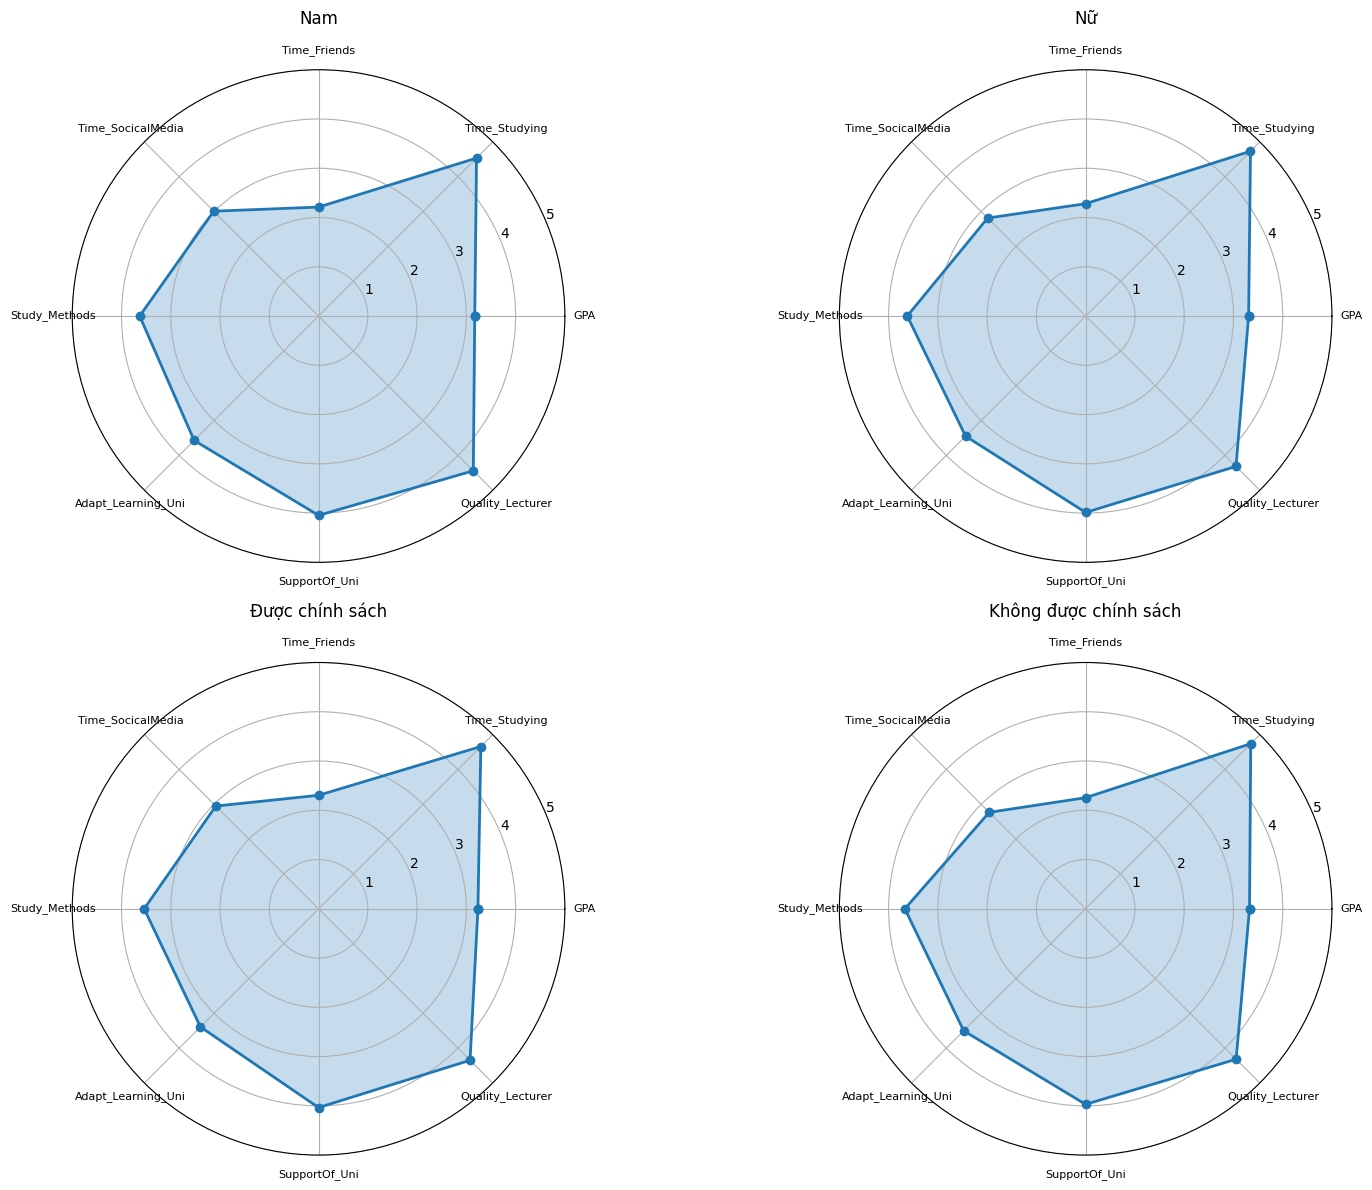

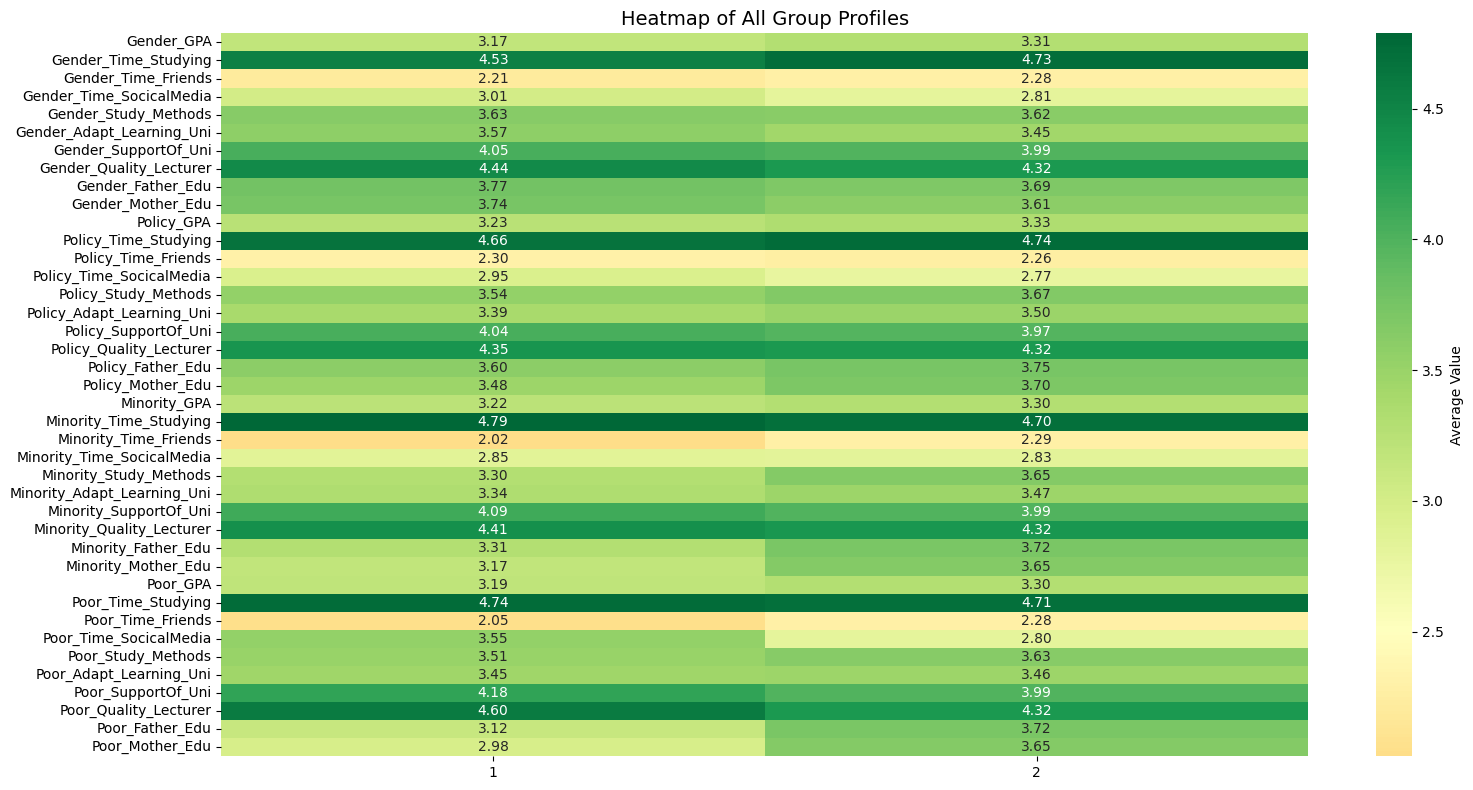

In [ ]:
from math import pi

def create_radar_chart(profile_dict, title):
    """Create radar chart for group profiles"""
    categories = list(profile_dict.keys())
    values = list(profile_dict.values())

    # Number of variables
    N = len(categories)

    # Compute angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]
    angles += angles[:1]

    # Create plot
    ax = plt.subplot(111, projection='polar')
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=8)
    ax.set_ylim(0, 5)
    ax.set_title(title, size=14, pad=20)
    ax.grid(True)

    return ax

# Create radar charts for key groups
fig = plt.figure(figsize=(16, 12))

groups_to_chart = [
    ('Nam', profile_by_gender.loc[1].head(8)),
    ('Nữ', profile_by_gender.loc[2].head(8)),
    ('Được chính sách', profile_by_policy.loc[1].head(8)),
    ('Không được chính sách', profile_by_policy.loc[2].head(8))

]

for idx, (group_name, profile) in enumerate(groups_to_chart, 1):
    plt.subplot(2, 2, idx, projection='polar')
    categories = profile.index.tolist()
    values = profile.values.tolist()

    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]
    angles += angles[:1]

    plt.plot(angles, values, 'o-', linewidth=2, label=group_name)
    plt.fill(angles, values, alpha=0.25)
    plt.xticks(angles[:-1], categories, size=8)
    plt.ylim(0, 5)
    plt.title(group_name, size=12, pad=15)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Heatmap of all profiles
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(all_profiles.T, cmap='RdYlGn', center=2.5, annot=True,
            fmt='.2f', cbar_kws={'label': 'Average Value'}, ax=ax)
ax.set_title('Heatmap of All Group Profiles', fontsize=14)
plt.tight_layout()
plt.show()


1. Tổng quan chung (Nhìn từ cả 2 biểu đồ)
- Mẫu hình chung của sinh viên: Bất kể thuộc nhóm nào (Nam/Nữ, Có/Không chính sách...), sinh viên đều có một mẫu hình sinh hoạt và học tập khá tương đồng:

    - Đầu tư thời gian học rất cao: Chỉ số Time_Studying luôn ở mức rất cao (khoảng 4.5 - 4.8), thể hiện sự chăm chỉ.

    - Đánh giá cao nhà trường: Các chỉ số Quality_Lecturer (Chất lượng giảng viên) và SupportOf_Uni (Hỗ trợ của trường) đều rất tích cực (màu xanh đậm trên heatmap).

    - Đời sống xã hội hạn chế: Chỉ số Time_Friends (Thời gian cho bạn bè) rất thấp ở mọi nhóm (khoảng 2.0 - 2.3), cho thấy sinh viên có vẻ ít dành thời gian giao lưu trực tiếp.

2. Phân tích chi tiết từ Heatmap (Biểu đồ nhiệt)
- Heatmap so sánh giữa Nhóm 1 và Nhóm 2 trong từng hạng mục. Dựa trên dữ liệu, ta có thể phỏng đoán Nhóm 1 thường đại diện cho nhóm yếu thế hơn hoặc nhóm thiểu số (ví dụ: Có chính sách, Dân tộc thiểu số, Hộ nghèo) và Nhóm 2 là nhóm còn lại.

- Về Kinh tế & Dân tộc (Poor & Minority):

    - Chênh lệch trình độ phụ huynh: Đây là sự khác biệt lớn nhất. Tại mục Minority và Poor, trình độ học vấn của bố và mẹ (Father_Edu, Mother_Edu) của Nhóm 1 thấp hơn hẳn so với Nhóm 2 (ví dụ: Mother_Edu của nhóm Poor 1 là 2.98 so với 3.65 của nhóm 2).

    - Nghịch lý Mạng xã hội: Đáng chú ý, nhóm Poor (Nhóm 1) lại dành thời gian cho mạng xã hội (Time_SocialMedia) cao hơn hẳn (3.55) so với nhóm không nghèo (2.80). Điều này có thể gợi ý rằng nhóm sinh viên khó khăn tìm kiếm sự giải trí hoặc kết nối nhiều hơn trên không gian mạng.

    - Kết quả học tập (GPA): Nhóm 2 có GPA nhỉnh hơn một chút ở mọi hạng mục (khoảng 3.3 so với 3.1-3.2 của Nhóm 1).

- Về Giới tính (Gender):

    - Nhóm 2 có xu hướng chăm chỉ hơn (Time_Studying: 4.73 vs 4.53) và GPA cao hơn (3.31 vs 3.17) so với Nhóm 1.

    - Tuy nhiên, Nhóm 1 lại dành nhiều thời gian hơn cho mạng xã hội (3.01 vs 2.81).

3. Phân tích từ Radar Chart (Biểu đồ mạng nhện)
- Biểu đồ này trực quan hóa sự "lệch" trong cân bằng cuộc sống của sinh viên:

    - Hình dáng nhọn về phía phải: Tất cả 4 biểu đồ đều bị kéo dãn mạnh về phía Time_Studying, Quality_Lecturer, SupportOf_Uni.

    - Co cụm về phía trái và trên: Các chỉ số về Time_Friends, Time_SocialMedia nằm sát tâm biểu đồ.

    - Sự tương đồng: Hình dáng biểu đồ giữa nam và nữ, hay có chính sách hỗ trợ gần như chồng khít lên nhau. Điều này khẳng định rằng môi trường đại học có tác động đồng nhất lên hành vi của sinh viên lớn hơn là các yếu tố xuất thân cá nhân.

# IX. KHÁM PHÁ MÔ HÌNH NÂNG CAO

### 9.1.1 Gender × GPA

In [ ]:
crosstab_gender_gpa = pd.crosstab(df['Gender'], df['GPA'], margins=True)
print("\nGender × GPA:")
print(crosstab_gender_gpa)

# Tỷ lệ phần trăm trong mỗi giới tính
crosstab_gender_gpa_pct = pd.crosstab(df['Gender'], df['GPA'], normalize='index') * 100
print("\nGender × GPA (% trong giới tính):")
print(crosstab_gender_gpa_pct.round(2))



Gender × GPA:
GPA      1    2     3    4   5   All
Gender                              
1        9   18   123   61   6   217
2       50   88   956  546  87  1727
All     59  106  1079  607  93  1944

Gender × GPA (% trong giới tính):
GPA        1     2      3      4     5
Gender                                
1       4.15  8.29  56.68  28.11  2.76
2       2.90  5.10  55.36  31.62  5.04


### 9.1.2 Các bảng chéo hai biến khác

In [ ]:
# Tương tự đối với các cặp khóa khác.
key_pairs = [
    ('Policy_Stu', 'GPA'),
    ('Minority_Stu', 'GPA'),
    ('Poor_Stu', 'GPA'),
    ('Year', 'Time_Studying'),
    ('Father_Edu', 'GPA')
]

for var1, var2 in key_pairs:
    print(f"\n{var1} × {var2}:")
    ct = pd.crosstab(df[var1], df[var2], margins=True)
    print(ct)


Policy_Stu × GPA:
GPA          1    2     3    4   5   All
Policy_Stu                              
1           13   46   439  187  26   711
2           46   60   640  420  67  1233
All         59  106  1079  607  93  1944

Minority_Stu × GPA:
GPA            1    2     3    4   5   All
Minority_Stu                              
1              1    1    96   27   2   127
2             58  105   983  580  91  1817
All           59  106  1079  607  93  1944

Poor_Stu × GPA:
GPA        1    2     3    4   5   All
Poor_Stu                              
1          2    2    60   18   2    84
2         57  104  1019  589  91  1860
All       59  106  1079  607  93  1944

Year × Time_Studying:
Time_Studying   1   2   3    4     5   All
Year                                      
3               1   1   1   28   104   135
4               5  21  15   49   319   409
5              11  22  52  151  1164  1400
All            17  44  68  228  1587  1944

Father_Edu × GPA:
GPA          1    2     3   

### 9.1.3 Bảng chéo 3 chiều

In [ ]:
print("\nGender × Policy_Stu × GPA (3-way contingency):")
three_way = pd.crosstab([df['Gender'], df['Policy_Stu']], df['GPA'])
print(three_way)



Gender × Policy_Stu × GPA (3-way contingency):
GPA                 1   2    3    4   5
Gender Policy_Stu                      
1      1            2   7   48   18   1
       2            7  11   75   43   5
2      1           11  39  391  169  25
       2           39  49  565  377  62


## 9.2 Mô hình phân bố theo nhóm nhân khẩu học

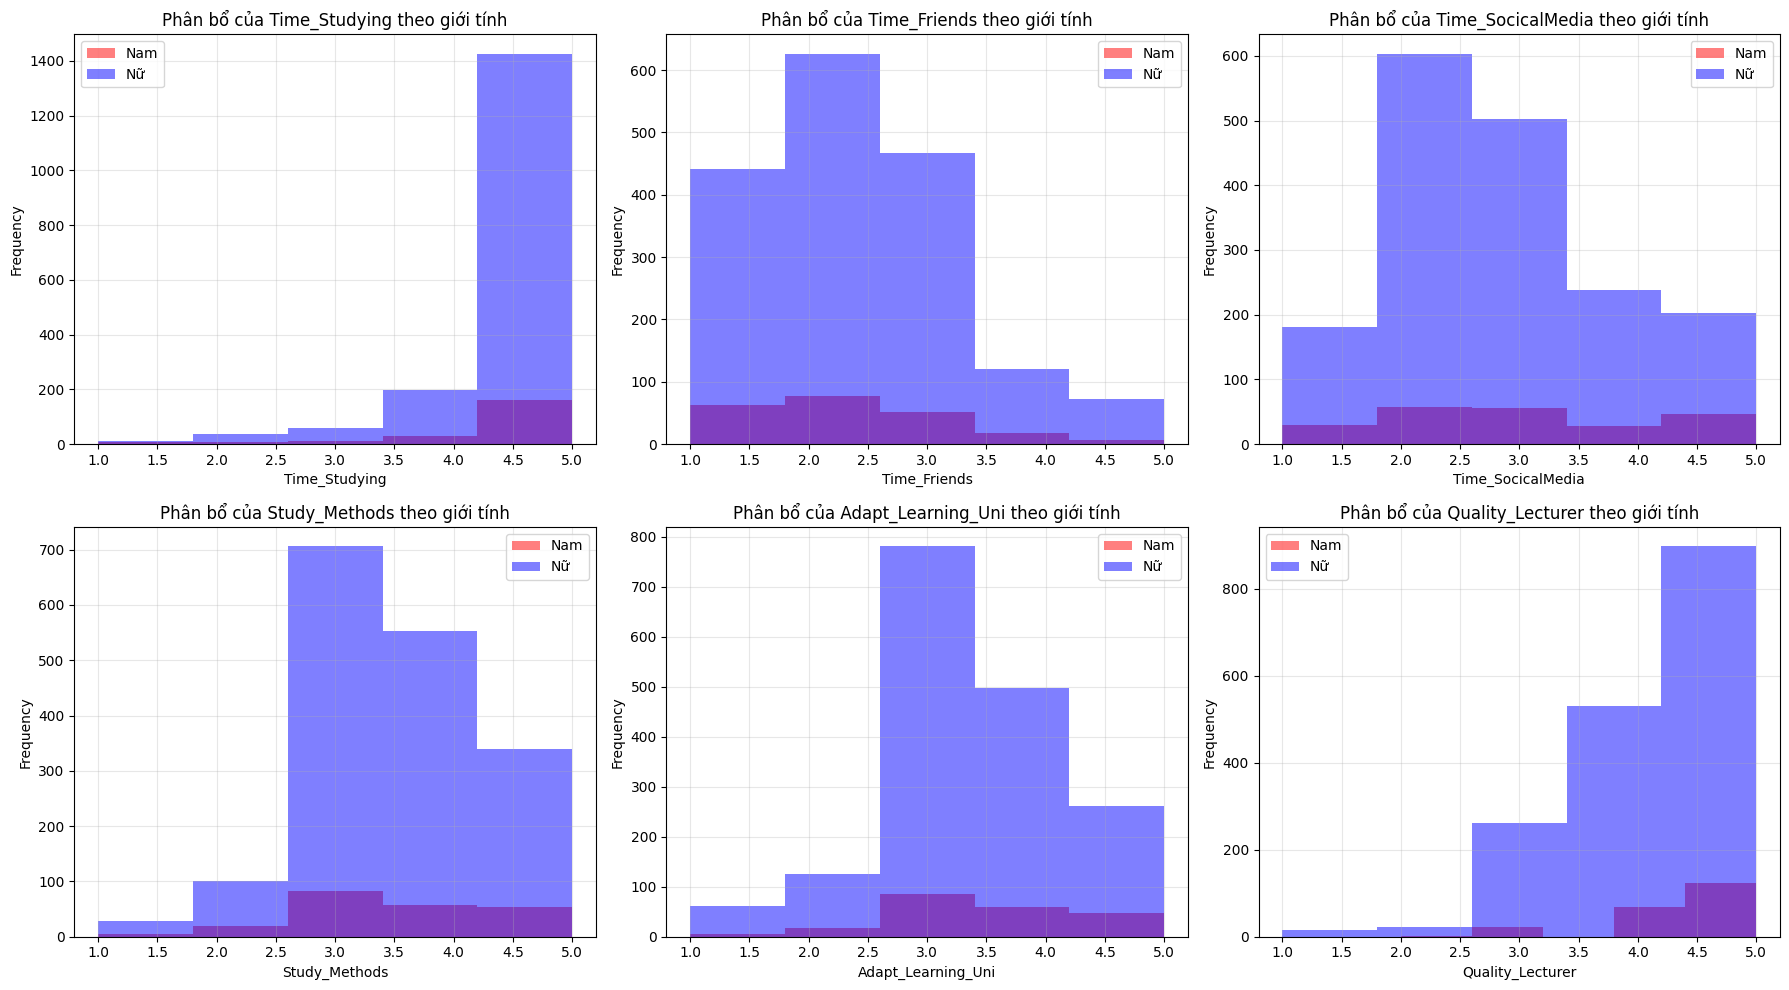

In [ ]:
label_map = {1: 'Nam', 2: 'Nữ'}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

ordinal_sample = [
    'Time_Studying', 'Time_Friends', 'Time_SocicalMedia',
    'Study_Methods', 'Adapt_Learning_Uni', 'Quality_Lecturer'
]

for idx, col in enumerate(ordinal_sample):
    for gender in sorted(df['Gender'].unique()):
        subset = df[df['Gender'] == gender][col]
        axes[idx].hist(
            subset, bins=5, alpha=0.5,
            label=label_map.get(gender, gender),
            color='red' if gender == 1 else 'blue'
        )

    axes[idx].set_title(f'Phân bổ của {col} theo giới tính')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 9.3 Xác định trường hợp bất thường và ngoại lệ

### 9.3.1 sinh viên có điểm trung bình cao nhưng thời gian học tập ít

In [ ]:

anomaly_1 = df[(df['GPA'] >= 4) & (df['Time_Studying'] <= 2)]
print(f"\nGPA cao (4-5) nhưng thời gian học ít (1-2): {len(anomaly_1)} sinh viên")
if len(anomaly_1) > 0:
    print("Hồ sơ của những sinh viên này:")
    print(anomaly_1[['Year', 'Gender', 'Father_Edu', 'Mother_Edu',
                     'Study_Methods', 'Adapt_Learning_Uni', 'GPA']].head(10))





GPA cao (4-5) nhưng thời gian học ít (1-2): 14 sinh viên
Hồ sơ của những sinh viên này:
     Year  Gender  Father_Edu  Mother_Edu  Study_Methods  Adapt_Learning_Uni  GPA
4       5       1           2           3              5                   5    4
5       5       2           5           5              4                   4    4
269     5       2           4           4              4                   3    4
578     5       2           5           5              3                   3    4
596     5       2           6           6              5                   5    4
675     5       1           1           4              2                   1    4
687     5       2           4           4              3                   3    4
732     5       2           4           4              3                   2    4
758     5       2           6           6              4                   3    4
893     4       2           3           1              3                   2    4


1. Đặc điểm nổi bật nhất: Yếu tố "Lão làng" (Sinh viên năm cuối):
- Hầu hết các sinh viên trong danh sách này đều là Year 5 (Sinh viên năm thứ 5/năm cuối).
- Đến năm cuối, sinh viên đã quá quen thuộc với cách thi cử và học tập ở đại học ("Adapt_Learning_Uni" của họ khá cao, đa số từ 3-5).
- Họ biết cách học trọng tâm ("Học thông minh thay vì học chăm"), nên dù thời gian bỏ ra ít (mức 1-2) nhưng vẫn đạt kết quả cao.Có thể năm cuối họ tập trung vào Đồ án/Thực tập, tính chất "thời gian học" được định nghĩa khác với việc ngồi cày bài trên lớp.

2. "Con nhà nòi" (Gia đình tri thức) ở ID 596 và 758.

- Cả bố và mẹ đều có trình độ học vấn mức 6 (Cao nhất - Sau đại học/Tiến sĩ).

- Kết quả: GPA 4, Adapt_Learning_Uni 5, Study_Methods 5 (hoặc 4).

=> Những sinh viên này có nền tảng tư duy tốt, phương pháp học tập khoa học được định hướng từ gia đình, cộng với IQ có thể cao, nên họ tiếp thu kiến thức rất nhanh mà không cần "cày cuốc" nhiều thời gian.

3. Nghịch lý thú vị: Trường hợp "May mắn" hay "Dữ liệu lỗi"? Trường hợp cá biệt: ID 675

- Thông số: Father_Edu 1 (rất thấp), Study_Methods 2 (kém), Adapt_Learning_Uni 1 (rất kém), Thời gian học ít (như tiêu chí lọc).

- Kết quả: Vẫn đạt GPA 4.

=> Làm thế nào một sinh viên có phương pháp học tệ, khả năng thích nghi kém nhất trường, bố học vấn thấp, lại lười học (ít thời gian)... mà vẫn đạt điểm Giỏi?

=> Giả thuyết: Đây có thể là nhiễu dữ liệu , khai báo sai, hoặc sinh viên này thi các môn năng khiếu/đặc thù không cần lý thuyết nhiều, hoặc đơn giản là... quay cóp/may mắn. Đây là trường hợp nên loại bỏ hoặc kiểm tra kỹ nếu chạy mô hình dự đoán (Outlier).

4. Giới tính (Gender)
- Phần lớn danh sách này là Gender 2 (được giả định là Nữ ở các bước trước).

- Điều này một lần nữa khẳng định: Nhóm nữ có phong độ học tập rất ổn định và khả năng tối ưu hóa điểm số tốt hơn nam.

5. Phương pháp học tập bù đắp cho Thời gian (Study Methods vs Time)
- Nhiều sinh viên trong nhóm này (ID 4, ID 596) có Study_Methods đạt mức 5 (Tuyệt đối).

- Kết luận: Chất lượng hơn số lượng. Khi phương pháp học đã tối ưu (đạt điểm 5), sinh viên không cần tốn nhiều thời gian (chỉ cần mức 1-2) để đạt GPA 4-5.

### 9.3.2 Những sinh viên có điểm trung bình thấp nhưng thời gian học tập cao.

In [ ]:

anomaly_2 = df[(df['GPA'] <= 2) & (df['Time_Studying'] >= 4)]
print(f"\n GPA thấp (1-2) nhưng thời gian học cao (4-5): {len(anomaly_2)} sinh viên")
if len(anomaly_2) > 0:
    print("Hồ sơ của những sinh viên này:")
    print(anomaly_2[['Year', 'Gender', 'Father_Edu', 'Mother_Edu',
                     'Study_Methods', 'Adapt_Learning_Uni', 'GPA']].head(10))


 GPA thấp (1-2) nhưng thời gian học cao (4-5): 138 sinh viên
Hồ sơ của những sinh viên này:
    Year  Gender  Father_Edu  Mother_Edu  Study_Methods  Adapt_Learning_Uni  GPA
63     5       2           5           5              3                   5    2
78     5       2           5           6              3                   4    1
80     5       2           4           4              5                   3    1
81     5       2           5           5              5                   4    1
85     5       2           5           5              5                   3    1
88     5       2           5           5              5                   4    1
89     5       2           4           3              4                   3    1
90     5       2           4           5              3                   3    1
92     5       2           5           4              3                   4    1
93     5       2           4           4              3                   3    1



1. Sự ngộ nhận về "Phương pháp học tập" (Điểm mấu chốt)
- Dữ liệu: Rất nhiều sinh viên trong danh sách này (như ID 80, 81, 85, 88) tự đánh giá Study_Methods của mình là 5 (Mức tối đa).

- Nghịch lý: Họ tự tin rằng mình có phương pháp học tuyệt vời, họ cũng bỏ ra rất nhiều thời gian, nhưng kết quả thực tế là GPA 1 (Kém nhất).

- Đây là biểu hiện rõ ràng của việc "thiếu nhận thức năng lực"  hoặc "ảo tưởng năng lực". Sinh viên có thể đang nhầm lẫn giữa việc "ngồi lâu bên bàn học"  với "học hiệu quả". Họ có thể đang học vẹt, học không trọng tâm, hoặc phương pháp họ cho là "tốt" thực chất đã lỗi thời/không phù hợp với bậc đại học (đặc biệt là năm cuối).

2. Áp lực từ "Gia đình trí thức"
- Dữ liệu: Hầu hết sinh viên trong mẫu này có cha mẹ trình độ học vấn rất cao (Father_Edu và Mother_Edu toàn mức 4, 5, 6). Ví dụ ID 78 có mẹ học vấn mức 6 (Cao nhất).

- Thông thường, cha mẹ học vấn cao là yếu tố thuận lợi. Nhưng trong trường hợp nhóm GPA thấp này, nó có thể trở thành áp lực vô hình.

- Sinh viên cố gắng "cày cuốc" (Time = 4, 5) để đáp ứng kỳ vọng của gia đình tri thức, nhưng năng lực thực sự hoặc sự yêu thích ngành học không tương xứng, dẫn đến tình trạng "học nhiều nhưng không vào".

3. Vấn đề của Sinh viên năm cuối (Year= 5)

- Đây toàn bộ mẫu đều là sinh viên đã tốt nghiệp. Áp lực thời gian khiến họ dành toàn bộ thì giờ để học, nhưng nền tảng kiến thức bị hổng từ các năm trước (GPA tích lũy thấp) khiến nỗ lực hiện tại không vực dậy nổi điểm số.

- Gặp khó khăn với Đồ án tốt nghiệp/Thực tập – những môn đòi hỏi tư duy tổng hợp và kỹ năng thực tế, thứ mà việc chỉ "chăm chỉ học thuộc lòng" không giải quyết được.

4. Giới tính (Gender 2)
- Tiếp tục là nhóm Gender 2 (Nữ). Điều này cho thấy trong khi nhóm Nữ nói chung có thành tích tốt (như phân tích trước), thì cũng tồn tại một phân nhóm nhỏ những bạn nữ rất chăm chỉ nhưng hoàn toàn bế tắc trong phương pháp, dẫn đến kết quả kém.

### 9.3.3 Những sinh viên dành nhiều thời gian cho mạng xã hội và xem ảnh hưởng đến điểm trung bình.

In [ ]:
anomaly_3 = df[df['Time_SocicalMedia'] >= 4]
print(f"\nThời gian mạng xã hội cao (4-5): {len(anomaly_3)} sinh viên")
print(f"Điểm trung bình của nhóm này: {anomaly_3['GPA'].mean():.2f}")
print(f"Điểm trung bình của nhóm còn lại: {df[df['Time_SocicalMedia'] < 4]['GPA'].mean():.2f}")


Thời gian mạng xã hội cao (4-5): 514 sinh viên
Điểm trung bình của nhóm này: 3.18
Điểm trung bình của nhóm còn lại: 3.33


**Nhận xét**
- Thời gian là hữu hạn: Nếu một sinh viên dành mức thời gian 4-5 cho mạng xã hội, quỹ thời gian cho việc tự học, nghỉ ngơi (ngủ đủ giấc) hoặc tham gia hoạt động ngoại khóa thực tế chắc chắn bị co hẹp lại.

- Sự phân tán (Distraction): Vấn đề không chỉ là thời gian, mà là sự tập trung. Việc lướt mạng xã hội liên tục tạo ra thói quen "tư duy phân mảnh" (fragmented thinking), làm giảm khả năng tập trung sâu (deep work) cần thiết cho việc học đại học.



## 9.4 Mô hình tương tác phức tạp

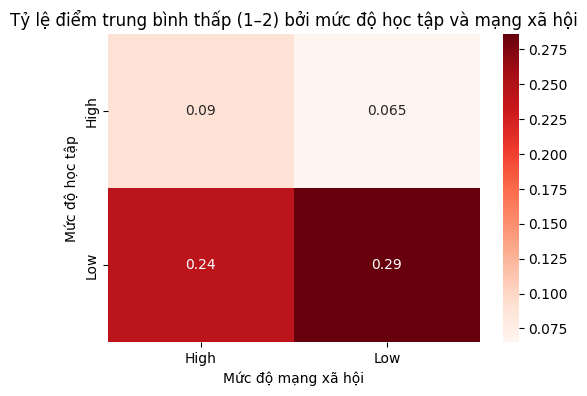

In [ ]:
# Helper function
def binarize(series, threshold=3):
    return series.apply(lambda x: 'High' if x >= threshold else 'Low')

df['Study_Level'] = binarize(df['Time_Studying'])
df['Social_Level'] = binarize(df['Time_SocicalMedia'])
df['Support_Level'] = binarize(df['SupportOf_Uni'])

interaction_2d = pd.crosstab(
    [df['Study_Level'], df['Social_Level']],
    df['GPA'],
    normalize='index'
)

heatmap_data = interaction_2d[[1, 2]].sum(axis=1).unstack()

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap='Reds')
plt.title('Tỷ lệ điểm trung bình thấp (1–2) bởi mức độ học tập và mạng xã hội')
plt.ylabel('Mức độ học tập')
plt.xlabel('Mức độ mạng xã hội')
plt.show()


## 9.5 Phân tích mô hình nhóm thiểu số

In [ ]:
minority_df = df[df['Minority_Stu'] == 1]
non_minority_df = df[df['Minority_Stu'] == 2]
minority_gpa_dist = pd.crosstab(
    minority_df['GPA'],
    columns='Minority',
    normalize=True
)

non_minority_gpa_dist = pd.crosstab(
    non_minority_df['GPA'],
    columns='Non-Minority',
    normalize=True
)

pd.concat([minority_gpa_dist, non_minority_gpa_dist], axis=1).round(3)
key_vars = [
    'Time_Studying',
    'Time_SocicalMedia',
    'Study_Methods',
    'Adapt_Learning_Uni',
    'SupportOf_Uni'
]

minority_profile = minority_df[key_vars].mean()
non_minority_profile = non_minority_df[key_vars].mean()

profile_compare = pd.DataFrame({
    'Minority': minority_profile,
    'Non_Minority': non_minority_profile
})

profile_compare.round(3)
minority_low_gpa = minority_df[minority_df['GPA'] <= 2]
minority_low_pattern = minority_low_gpa[key_vars].mean()
minority_low_pattern.round(3)



Time_Studying         5.0
Time_SocicalMedia     3.5
Study_Methods         3.0
Adapt_Learning_Uni    4.0
SupportOf_Uni         4.0
dtype: float64


- Nhóm này dành rất nhiều thời gian cho học tập và nhận được mức độ hỗ trợ tương đối cao từ nhà trường, đồng thời thể hiện khả năng thích nghi khá tốt với môi trường đại học.
- Tuy nhiên, phương pháp học tập của nhóm chỉ ở mức trung bình và mức độ sử dụng mạng xã hội vẫn tương đối cao.

- Kết quả này cho thấy các trường hợp GPA thấp trong nhóm thiểu số không xuất phát từ việc thiếu nỗ lực học tập hay thiếu hỗ trợ, mà phản ánh nhu cầu tư vấn mang tính cá nhân hóa hơn, tập trung vào cải thiện phương pháp học tập và quản lý thời gian hiệu quả.